In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import pickle

In [3]:
df = pd.read_csv("Amazon Sale Report.csv",low_memory=False)

In [4]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

# Removing index and order id

In [6]:
df.drop("index",axis=1,inplace=True)

In [7]:
df.drop("Order ID",axis=1,inplace=True)

In [8]:
df["Date"].unique()

array(['04-30-22', '04-29-22', '04-28-22', '04-27-22', '04-26-22',
       '04-25-22', '04-24-22', '04-23-22', '04-22-22', '04-21-22',
       '04-20-22', '04-19-22', '04-18-22', '04-17-22', '04-16-22',
       '04-15-22', '04-14-22', '04-13-22', '04-12-22', '04-11-22',
       '04-10-22', '04-09-22', '04-08-22', '04-07-22', '04-06-22',
       '04-05-22', '04-04-22', '04-03-22', '04-02-22', '04-01-22',
       '03-31-22', '05-31-22', '05-30-22', '05-29-22', '05-28-22',
       '05-27-22', '05-26-22', '05-25-22', '05-24-22', '05-23-22',
       '05-22-22', '05-21-22', '05-20-22', '05-19-22', '05-18-22',
       '05-17-22', '05-16-22', '05-15-22', '05-14-22', '05-13-22',
       '05-12-22', '05-11-22', '05-10-22', '05-09-22', '05-08-22',
       '05-07-22', '05-06-22', '05-05-22', '05-04-22', '05-03-22',
       '05-02-22', '05-01-22', '06-29-22', '06-28-22', '06-27-22',
       '06-26-22', '06-25-22', '06-24-22', '06-23-22', '06-22-22',
       '06-21-22', '06-20-22', '06-19-22', '06-18-22', '06-17-

In [9]:
df["Status"].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [10]:
df["Status"].nunique()

13

In [11]:
def col_val_replace(df,col):
    """The function takes two parameters, a DataFrame "df" and a column name "col". 
    This suggests that the function is intended to be used to replace values in a specific column of a DataFrame."""
    
    #dictionary "repl_dict" to store the replacement values entered by the user for each unique value in the column
    repl_dict={}
    
    # converts all string values in the column to uppercase using a lambda function
    df[col]=df[col].map(lambda x: x.upper() if type(x)==str else x)
    
    for i in df[col].unique():
        #function then prompts the user to enter replacement values for each unique value in the column
        print("Enter replacement for ", i)
        ip = input()
        if len(ip)==0:
            #The function checks if the user input is empty and assigns the existing value if no replacement value is entered
            repl_dict[i]=i
        else:
            repl_dict[i]=ip
            
    #function uses a lambda function to map each value in the column to its corresponding replacement value in the "repl_dict"
    df[col] = df[col].map(lambda x: repl_dict[x])

In [12]:
col_val_replace(df,"Status")

Enter replacement for  CANCELLED

Enter replacement for  SHIPPED - DELIVERED TO BUYER
SHIPPED
Enter replacement for  SHIPPED

Enter replacement for  SHIPPED - RETURNED TO SELLER
SHIPPED
Enter replacement for  SHIPPED - REJECTED BY BUYER
SHIPPED
Enter replacement for  SHIPPED - LOST IN TRANSIT
SHIPPED
Enter replacement for  SHIPPED - OUT FOR DELIVERY
SHIPPED
Enter replacement for  SHIPPED - RETURNING TO SELLER
SHIPPED
Enter replacement for  SHIPPED - PICKED UP
SHIPPED
Enter replacement for  PENDING
SHIPPED
Enter replacement for  PENDING - WAITING FOR PICK UP
SHIPPED
Enter replacement for  SHIPPED - DAMAGED
SHIPPED
Enter replacement for  SHIPPING
SHIPPED


In [13]:
df["Status"].nunique()

2

In [14]:
df["Fulfilment"].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [16]:
df.rename(columns={"Sales Channel ":"Sales Channel"},inplace = True)

In [17]:
df["Sales Channel"].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [18]:
df["ship-service-level"].unique()

array(['Standard', 'Expedited'], dtype=object)

In [19]:
df["Style"].nunique()

1377

In [20]:
df["SKU"].nunique()

7195

In [21]:
df["Category"].nunique()

9

In [22]:
df["Size"].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', '5XL',
       'Free'], dtype=object)

In [23]:
df["ASIN"].nunique()

7190

In [24]:
df["Courier Status"].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [25]:
df.drop("Courier Status",axis=1,inplace=True)

In [26]:
df["Qty"].unique()

array([ 0,  1,  2, 15,  3,  9, 13,  5,  4,  8], dtype=int64)

# Dropping currency column as having only one unique value 

In [27]:
df["currency"].unique()

array(['INR', nan], dtype=object)

In [28]:
df.drop("currency",axis=1,inplace=True)

In [30]:
df["ship-city"].nunique()

8955

In [31]:
df["ship-city"] = df["ship-city"].map(lambda x: x.upper() if type(x)==str else x)

In [32]:
df["ship-city"].nunique()

7297

In [33]:
df["ship-state"].unique() 

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [34]:
df["ship-state"].nunique()

69

In [35]:
col_val_replace(df,"ship-state")

Enter replacement for  MAHARASHTRA

Enter replacement for  KARNATAKA

Enter replacement for  PUDUCHERRY

Enter replacement for  TAMIL NADU

Enter replacement for  UTTAR PRADESH

Enter replacement for  CHANDIGARH

Enter replacement for  TELANGANA

Enter replacement for  ANDHRA PRADESH

Enter replacement for  RAJASTHAN

Enter replacement for  DELHI

Enter replacement for  HARYANA

Enter replacement for  ASSAM

Enter replacement for  JHARKHAND

Enter replacement for  CHHATTISGARH

Enter replacement for  ODISHA

Enter replacement for  KERALA

Enter replacement for  MADHYA PRADESH

Enter replacement for  WEST BENGAL

Enter replacement for  NAGALAND

Enter replacement for  GUJARAT

Enter replacement for  UTTARAKHAND

Enter replacement for  BIHAR

Enter replacement for  JAMMU & KASHMIR

Enter replacement for  PUNJAB

Enter replacement for  HIMACHAL PRADESH

Enter replacement for  ARUNACHAL PRADESH

Enter replacement for  MANIPUR

Enter replacement for  GOA

Enter replacement for  MEGHALAYA

E

In [36]:
df["ship-state"].nunique()

37

In [37]:
df["ship-state"].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'GOA', 'MEGHALAYA', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR ',
       'MIZORAM', 'LAKSHADWEEP', 'APO'], dtype=object)

In [38]:
df.to_csv("Amazon processed.csv",index=False)

In [39]:
df["ship-postal-code"].nunique()

9459

In [40]:
df["ship-city"].nunique()

7297

In [41]:
df.loc[:,["ship-city","ship-postal-code"]].value_counts()

ship-city                ship-postal-code
NOIDA                    201301.0            972
GURUGRAM                 122001.0            572
BENGALURU                560068.0            570
                         560037.0            556
                         560076.0            512
                                            ... 
KOCH BIHAR               736171.0              1
KIZHUVALAM KOONTHALLOOR  695304.0              1
KIZHUPARAMBA             673645.0              1
KISHANGARH RENWAL        303603.0              1
KOTANANDURU              533407.0              1
Length: 14406, dtype: int64

In [42]:
df.drop("ship-city",axis=1,inplace=True)

In [43]:
df["ship-country"].unique()

array(['IN', nan], dtype=object)

In [44]:
df.drop("ship-country",axis=1,inplace=True)

In [45]:
df["promotion-ids"].nunique()

5787

In [46]:
df["B2B"].nunique()

2

In [47]:
df["fulfilled-by"].nunique()

1

In [48]:
df.drop("fulfilled-by",axis=1,inplace=True)

In [49]:
df["Unnamed: 22"].nunique()

1

In [50]:
df.drop("Unnamed: 22",axis=1,inplace=True)

In [51]:
df.isna().sum()

Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Qty                       0
Amount                 7795
ship-state               33
ship-postal-code         33
promotion-ids         49153
B2B                       0
dtype: int64

In [52]:
df.isna().sum()/df.shape[0]*100

Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ship-service-level     0.000000
Style                  0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
ASIN                   0.000000
Qty                    0.000000
Amount                 6.043807
ship-state             0.025586
ship-postal-code       0.025586
promotion-ids         38.110487
B2B                    0.000000
dtype: float64

In [53]:
df["Status"].value_counts()

SHIPPED      110643
CANCELLED     18332
Name: Status, dtype: int64

In [54]:
df["ship-state"].isnull().sum()

33

In [55]:
df.shape

(128975, 16)

In [56]:
df = df.loc[df["ship-state"].isnull()==False]

In [57]:
df.shape

(128942, 16)

In [58]:
df.isna().sum()/df.shape[0]*100

Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ship-service-level     0.000000
Style                  0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
ASIN                   0.000000
Qty                    0.000000
Amount                 6.043803
ship-state             0.000000
ship-postal-code       0.000000
promotion-ids         38.114036
B2B                    0.000000
dtype: float64

In [59]:
df["promotion-ids"] = df["promotion-ids"].map(lambda x: x.split(" ") if type(x) == str else x )\
                                         .map(lambda x: x[:3] if type(x) == list else x)\
                                         .map(lambda x: " ".join(x) if type(x) == list else x)

C:\Users\PARESH~1\AppData\Local\Temp/ipykernel_23164/3415882297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["promotion-ids"] = df["promotion-ids"].map(lambda x: x.split(" ") if type(x) == str else x )\


In [60]:
df["promotion-ids"].nunique()

14

In [61]:
df["promotion-ids"].isna().sum()

49145

In [62]:
df["promotion-ids"].fillna("no promo",inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [64]:
df.isna().sum()

Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Qty                      0
Amount                7793
ship-state               0
ship-postal-code         0
promotion-ids            0
B2B                      0
dtype: int64

In [65]:
df["Amount"].mean()

648.5733047734615

In [66]:
df["Amount"].median()

605.0

(array([2.3430e+03, 0.0000e+00, 0.0000e+00, 4.0000e+00, 4.1000e+02,
        6.3930e+03, 9.1560e+03, 1.1814e+04, 1.3558e+04, 8.2960e+03,
        9.6120e+03, 9.7140e+03, 7.4000e+03, 1.1177e+04, 7.1110e+03,
        4.5070e+03, 2.5500e+03, 3.7840e+03, 8.1000e+02, 3.3580e+03,
        2.8830e+03, 1.7080e+03, 8.4200e+02, 1.1540e+03, 5.4200e+02,
        9.9700e+02, 2.8500e+02, 4.2200e+02, 8.9000e+01, 6.1000e+01,
        8.3000e+01, 8.0000e+00, 6.0000e+00, 1.0000e+00, 4.0000e+00,
        1.3000e+01, 5.0000e+00, 1.0000e+00, 4.0000e+00, 7.0000e+00,
        3.0000e+00, 7.0000e+00, 7.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 6.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

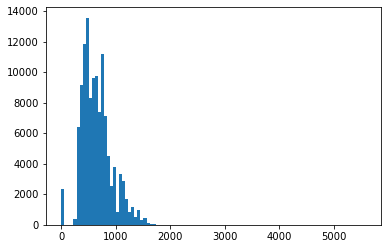

In [67]:
plt.hist(df["Amount"],bins=100)

In [68]:
df["Amount"].fillna(df["Amount"].median(),inplace=True)

In [69]:
df.isna().sum()

Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
Amount                0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
dtype: int64

In [70]:
df.to_csv("Amazon processed2.csv",index=False)

In [71]:
df.shape

(128942, 16)

In [72]:
df = df.loc[df["ship-state"] != "APO",]

In [73]:
df.shape

(128941, 16)

In [74]:
df["SKU"].unique()

array(['SET389-KR-NP-S', 'JNE3781-KR-XXXL', 'JNE3371-KR-XL', ...,
       'JNE3370-KR-S', 'JNE3678-TU-XXL', 'SET045-KR-NP-M'], dtype=object)

In [75]:
df["SKU"].nunique()

7195

In [76]:
df["SKU"] = df["SKU"].map(lambda x: x.split("-") if type(x) == str else x )\
                     .map(lambda x: x[:2] if type(x) == list else x)\
                     .map(lambda x: "-".join(x) if type(x) == list else x)

In [77]:
df["SKU"].nunique()

1453

In [78]:
df["Style"].unique()

array(['SET389', 'JNE3781', 'JNE3371', ..., 'SET066', 'J0286', 'SET045'],
      dtype=object)

In [79]:
df["Style"].nunique()

1377

In [80]:
df[["Style","SKU"]].value_counts()

Style    SKU       
JNE3797  JNE3797-KR    4223
JNE3405  JNE3405-KR    2261
J0230    J0230-SKD     1867
SET268   SET268-KR     1860
J0341    J0341-DR      1630
                       ... 
JNE2321  JNE2321-KR       1
JNE2309  JNE2309-KR       1
JNE2302  JNE2302-KR       1
JNE2300  JNE2300-KR       1
SET462   SET462-KR        1
Length: 1453, dtype: int64

In [81]:
df.drop("SKU",axis=1,inplace=True)

In [82]:
df.to_csv("Amazon processed3.csv",index=False)

In [83]:
df.drop("Date",axis=1,inplace=True)

In [84]:
df3 = pd.get_dummies(df,drop_first=True)

In [85]:
sel = SelectFromModel(DecisionTreeClassifier(random_state=7 ),
                      threshold = "mean")

In [86]:
X = df3.drop("Status_SHIPPED", axis=1)
y = df3["Status_SHIPPED"]

In [87]:
sel.fit(X,y)

SelectFromModel(estimator=DecisionTreeClassifier(random_state=7),
                threshold='mean')

In [88]:
sel.estimator_.feature_importances_

array([0.66451145, 0.03135102, 0.09456412, ..., 0.        , 0.        ,
       0.03775115])

In [89]:
X_DT = sel.transform(X)

In [90]:
X_DT.shape

(128941, 283)

In [91]:
X.loc[:,sel.estimator_.feature_importances_>sel.estimator_.feature_importances_.mean()].columns

Index(['Qty', 'Amount', 'ship-postal-code', 'B2B',
       'ship-service-level_Standard', 'Style_J0003', 'Style_J0008',
       'Style_J0095', 'Style_J0119', 'Style_J0157',
       ...
       'ship-state_ODISHA', 'ship-state_PUNJAB', 'ship-state_RAJASTHAN',
       'ship-state_TAMIL NADU', 'ship-state_TELANGANA',
       'ship-state_UTTAR PRADESH', 'ship-state_UTTARAKHAND',
       'ship-state_WEST BENGAL', 'promotion-ids_IN Core Free',
       'promotion-ids_no promo'],
      dtype='object', length=283)

In [92]:
cbc = CatBoostClassifier(random_state=7)

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X_DT,y,test_size=0.3,
                                                 random_state=7,
                                                 stratify=y)

In [94]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((90258, 283), (38683, 283), (90258,), (38683,))

In [95]:
cbc.fit(X_train,y_train)

Learning rate set to 0.070457
0:	learn: 0.5190416	total: 174ms	remaining: 2m 53s
1:	learn: 0.4535659	total: 193ms	remaining: 1m 36s
2:	learn: 0.3483570	total: 215ms	remaining: 1m 11s
3:	learn: 0.3136372	total: 255ms	remaining: 1m 3s
4:	learn: 0.2578232	total: 277ms	remaining: 55.2s
5:	learn: 0.2181429	total: 298ms	remaining: 49.4s
6:	learn: 0.1931372	total: 316ms	remaining: 44.8s
7:	learn: 0.1745084	total: 333ms	remaining: 41.3s
8:	learn: 0.1622991	total: 350ms	remaining: 38.5s
9:	learn: 0.1529958	total: 373ms	remaining: 36.9s
10:	learn: 0.1465089	total: 402ms	remaining: 36.2s
11:	learn: 0.1416394	total: 419ms	remaining: 34.5s
12:	learn: 0.1376538	total: 437ms	remaining: 33.2s
13:	learn: 0.1347715	total: 453ms	remaining: 31.9s
14:	learn: 0.1324333	total: 469ms	remaining: 30.8s
15:	learn: 0.1303870	total: 500ms	remaining: 30.8s
16:	learn: 0.1288903	total: 515ms	remaining: 29.8s
17:	learn: 0.1276044	total: 532ms	remaining: 29s
18:	learn: 0.1266430	total: 549ms	remaining: 28.4s
19:	learn:

167:	learn: 0.1145173	total: 3.69s	remaining: 18.3s
168:	learn: 0.1144992	total: 3.72s	remaining: 18.3s
169:	learn: 0.1144802	total: 3.74s	remaining: 18.3s
170:	learn: 0.1144588	total: 3.79s	remaining: 18.4s
171:	learn: 0.1144201	total: 3.81s	remaining: 18.3s
172:	learn: 0.1143819	total: 3.83s	remaining: 18.3s
173:	learn: 0.1143660	total: 3.85s	remaining: 18.3s
174:	learn: 0.1143451	total: 3.87s	remaining: 18.2s
175:	learn: 0.1143298	total: 3.89s	remaining: 18.2s
176:	learn: 0.1142981	total: 3.91s	remaining: 18.2s
177:	learn: 0.1142868	total: 3.93s	remaining: 18.1s
178:	learn: 0.1142722	total: 3.94s	remaining: 18.1s
179:	learn: 0.1142336	total: 3.96s	remaining: 18.1s
180:	learn: 0.1141713	total: 3.99s	remaining: 18s
181:	learn: 0.1141272	total: 4.04s	remaining: 18.1s
182:	learn: 0.1141272	total: 4.06s	remaining: 18.1s
183:	learn: 0.1141007	total: 4.08s	remaining: 18.1s
184:	learn: 0.1140824	total: 4.1s	remaining: 18.1s
185:	learn: 0.1140824	total: 4.12s	remaining: 18s
186:	learn: 0.114

331:	learn: 0.1109415	total: 7.2s	remaining: 14.5s
332:	learn: 0.1109272	total: 7.22s	remaining: 14.5s
333:	learn: 0.1109148	total: 7.24s	remaining: 14.4s
334:	learn: 0.1108943	total: 7.27s	remaining: 14.4s
335:	learn: 0.1108692	total: 7.3s	remaining: 14.4s
336:	learn: 0.1108428	total: 7.33s	remaining: 14.4s
337:	learn: 0.1108380	total: 7.34s	remaining: 14.4s
338:	learn: 0.1108216	total: 7.37s	remaining: 14.4s
339:	learn: 0.1107951	total: 7.39s	remaining: 14.3s
340:	learn: 0.1107752	total: 7.42s	remaining: 14.3s
341:	learn: 0.1107688	total: 7.46s	remaining: 14.4s
342:	learn: 0.1107485	total: 7.48s	remaining: 14.3s
343:	learn: 0.1107348	total: 7.5s	remaining: 14.3s
344:	learn: 0.1107222	total: 7.54s	remaining: 14.3s
345:	learn: 0.1106975	total: 7.57s	remaining: 14.3s
346:	learn: 0.1106770	total: 7.59s	remaining: 14.3s
347:	learn: 0.1106649	total: 7.61s	remaining: 14.3s
348:	learn: 0.1106383	total: 7.63s	remaining: 14.2s
349:	learn: 0.1106006	total: 7.64s	remaining: 14.2s
350:	learn: 0.1

494:	learn: 0.1084235	total: 10.6s	remaining: 10.8s
495:	learn: 0.1084014	total: 10.6s	remaining: 10.7s
496:	learn: 0.1083953	total: 10.6s	remaining: 10.7s
497:	learn: 0.1083703	total: 10.6s	remaining: 10.7s
498:	learn: 0.1083632	total: 10.6s	remaining: 10.7s
499:	learn: 0.1083585	total: 10.6s	remaining: 10.6s
500:	learn: 0.1083487	total: 10.7s	remaining: 10.6s
501:	learn: 0.1083269	total: 10.7s	remaining: 10.6s
502:	learn: 0.1083135	total: 10.7s	remaining: 10.6s
503:	learn: 0.1082886	total: 10.7s	remaining: 10.5s
504:	learn: 0.1082709	total: 10.7s	remaining: 10.5s
505:	learn: 0.1082601	total: 10.7s	remaining: 10.5s
506:	learn: 0.1082546	total: 10.8s	remaining: 10.5s
507:	learn: 0.1082459	total: 10.8s	remaining: 10.5s
508:	learn: 0.1082306	total: 10.8s	remaining: 10.4s
509:	learn: 0.1082157	total: 10.8s	remaining: 10.4s
510:	learn: 0.1082089	total: 10.8s	remaining: 10.4s
511:	learn: 0.1081865	total: 10.9s	remaining: 10.3s
512:	learn: 0.1081740	total: 10.9s	remaining: 10.3s
513:	learn: 

653:	learn: 0.1065840	total: 13.9s	remaining: 7.33s
654:	learn: 0.1065695	total: 13.9s	remaining: 7.31s
655:	learn: 0.1065592	total: 13.9s	remaining: 7.29s
656:	learn: 0.1065443	total: 13.9s	remaining: 7.27s
657:	learn: 0.1065315	total: 13.9s	remaining: 7.25s
658:	learn: 0.1065144	total: 14s	remaining: 7.22s
659:	learn: 0.1065085	total: 14s	remaining: 7.2s
660:	learn: 0.1064933	total: 14s	remaining: 7.18s
661:	learn: 0.1064932	total: 14s	remaining: 7.15s
662:	learn: 0.1064787	total: 14s	remaining: 7.14s
663:	learn: 0.1064727	total: 14.1s	remaining: 7.12s
664:	learn: 0.1064589	total: 14.1s	remaining: 7.1s
665:	learn: 0.1064506	total: 14.1s	remaining: 7.08s
666:	learn: 0.1064436	total: 14.1s	remaining: 7.06s
667:	learn: 0.1064400	total: 14.2s	remaining: 7.04s
668:	learn: 0.1064284	total: 14.2s	remaining: 7.02s
669:	learn: 0.1064245	total: 14.2s	remaining: 6.99s
670:	learn: 0.1064245	total: 14.2s	remaining: 6.97s
671:	learn: 0.1064134	total: 14.2s	remaining: 6.95s
672:	learn: 0.1063879	to

823:	learn: 0.1047201	total: 17.3s	remaining: 3.69s
824:	learn: 0.1047062	total: 17.3s	remaining: 3.67s
825:	learn: 0.1047062	total: 17.3s	remaining: 3.65s
826:	learn: 0.1046904	total: 17.4s	remaining: 3.63s
827:	learn: 0.1046854	total: 17.4s	remaining: 3.61s
828:	learn: 0.1046796	total: 17.4s	remaining: 3.59s
829:	learn: 0.1046728	total: 17.4s	remaining: 3.57s
830:	learn: 0.1046687	total: 17.5s	remaining: 3.55s
831:	learn: 0.1046687	total: 17.5s	remaining: 3.53s
832:	learn: 0.1046659	total: 17.5s	remaining: 3.51s
833:	learn: 0.1046586	total: 17.5s	remaining: 3.48s
834:	learn: 0.1046517	total: 17.5s	remaining: 3.46s
835:	learn: 0.1046517	total: 17.6s	remaining: 3.45s
836:	learn: 0.1046367	total: 17.6s	remaining: 3.43s
837:	learn: 0.1046288	total: 17.6s	remaining: 3.41s
838:	learn: 0.1046122	total: 17.6s	remaining: 3.39s
839:	learn: 0.1046029	total: 17.7s	remaining: 3.36s
840:	learn: 0.1045927	total: 17.7s	remaining: 3.34s
841:	learn: 0.1045810	total: 17.7s	remaining: 3.32s
842:	learn: 

989:	learn: 0.1031915	total: 20.6s	remaining: 208ms
990:	learn: 0.1031784	total: 20.6s	remaining: 187ms
991:	learn: 0.1031729	total: 20.6s	remaining: 166ms
992:	learn: 0.1031729	total: 20.6s	remaining: 146ms
993:	learn: 0.1031679	total: 20.7s	remaining: 125ms
994:	learn: 0.1031638	total: 20.7s	remaining: 104ms
995:	learn: 0.1031605	total: 20.7s	remaining: 83.1ms
996:	learn: 0.1031604	total: 20.7s	remaining: 62.3ms
997:	learn: 0.1031493	total: 20.7s	remaining: 41.5ms
998:	learn: 0.1031382	total: 20.7s	remaining: 20.8ms
999:	learn: 0.1031205	total: 20.8s	remaining: 0us


In [96]:
y_pred = cbc.predict(X_test)

In [97]:
f1_score(y_test,y_pred, average="micro")

0.9569578367758447

In [98]:
precision_score(y_test,y_pred)

0.955045474231269

In [99]:
recall_score(y_test,y_pred)

0.996745615621045

In [106]:
X = df3.drop("Status_SHIPPED", axis=1)
y = df3["Status_SHIPPED"]

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=7,
                                                 stratify=y)

In [108]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((90258, 8639), (38683, 8639), (90258,), (38683,))

In [109]:
sel = SelectFromModel(CatBoostClassifier(random_seed=7),
                      threshold = "mean")

In [110]:
sel.fit(X_train,y_train)

Learning rate set to 0.070457
0:	learn: 0.5140753	total: 52.6ms	remaining: 52.6s
1:	learn: 0.3919015	total: 100ms	remaining: 50.1s
2:	learn: 0.3123137	total: 146ms	remaining: 48.6s
3:	learn: 0.2597778	total: 187ms	remaining: 46.5s
4:	learn: 0.2240146	total: 234ms	remaining: 46.6s
5:	learn: 0.1998046	total: 305ms	remaining: 50.6s
6:	learn: 0.1819058	total: 359ms	remaining: 50.9s
7:	learn: 0.1681519	total: 401ms	remaining: 49.7s
8:	learn: 0.1586650	total: 454ms	remaining: 49.9s
9:	learn: 0.1519739	total: 501ms	remaining: 49.6s
10:	learn: 0.1462985	total: 555ms	remaining: 49.9s
11:	learn: 0.1421929	total: 599ms	remaining: 49.3s
12:	learn: 0.1385223	total: 645ms	remaining: 48.9s
13:	learn: 0.1355221	total: 691ms	remaining: 48.6s
14:	learn: 0.1335199	total: 722ms	remaining: 47.4s
15:	learn: 0.1314499	total: 768ms	remaining: 47.2s
16:	learn: 0.1299357	total: 815ms	remaining: 47.1s
17:	learn: 0.1286449	total: 860ms	remaining: 46.9s
18:	learn: 0.1276341	total: 907ms	remaining: 46.8s
19:	learn:

162:	learn: 0.1169280	total: 7.22s	remaining: 37.1s
163:	learn: 0.1169207	total: 7.27s	remaining: 37.1s
164:	learn: 0.1169129	total: 7.31s	remaining: 37s
165:	learn: 0.1169010	total: 7.35s	remaining: 36.9s
166:	learn: 0.1168929	total: 7.39s	remaining: 36.9s
167:	learn: 0.1168859	total: 7.44s	remaining: 36.8s
168:	learn: 0.1168570	total: 7.48s	remaining: 36.8s
169:	learn: 0.1168330	total: 7.52s	remaining: 36.7s
170:	learn: 0.1168261	total: 7.56s	remaining: 36.7s
171:	learn: 0.1168166	total: 7.61s	remaining: 36.6s
172:	learn: 0.1168080	total: 7.65s	remaining: 36.6s
173:	learn: 0.1167994	total: 7.69s	remaining: 36.5s
174:	learn: 0.1167897	total: 7.73s	remaining: 36.5s
175:	learn: 0.1167669	total: 7.78s	remaining: 36.4s
176:	learn: 0.1167343	total: 7.82s	remaining: 36.3s
177:	learn: 0.1167270	total: 7.86s	remaining: 36.3s
178:	learn: 0.1167182	total: 7.9s	remaining: 36.3s
179:	learn: 0.1167089	total: 7.94s	remaining: 36.2s
180:	learn: 0.1167007	total: 7.98s	remaining: 36.1s
181:	learn: 0.1

321:	learn: 0.1147055	total: 15.5s	remaining: 32.6s
322:	learn: 0.1146266	total: 15.5s	remaining: 32.6s
323:	learn: 0.1146191	total: 15.6s	remaining: 32.5s
324:	learn: 0.1145909	total: 15.6s	remaining: 32.5s
325:	learn: 0.1145813	total: 15.7s	remaining: 32.5s
326:	learn: 0.1145688	total: 15.7s	remaining: 32.4s
327:	learn: 0.1145638	total: 15.8s	remaining: 32.4s
328:	learn: 0.1145587	total: 15.8s	remaining: 32.3s
329:	learn: 0.1145294	total: 15.9s	remaining: 32.2s
330:	learn: 0.1145235	total: 15.9s	remaining: 32.2s
331:	learn: 0.1145184	total: 16s	remaining: 32.2s
332:	learn: 0.1145124	total: 16s	remaining: 32.1s
333:	learn: 0.1145075	total: 16.1s	remaining: 32.1s
334:	learn: 0.1145020	total: 16.1s	remaining: 32s
335:	learn: 0.1144964	total: 16.2s	remaining: 32s
336:	learn: 0.1144910	total: 16.3s	remaining: 32s
337:	learn: 0.1144854	total: 16.3s	remaining: 31.9s
338:	learn: 0.1144542	total: 16.3s	remaining: 31.9s
339:	learn: 0.1144388	total: 16.4s	remaining: 31.8s
340:	learn: 0.1144326	

484:	learn: 0.1124728	total: 24.1s	remaining: 25.6s
485:	learn: 0.1123922	total: 24.1s	remaining: 25.5s
486:	learn: 0.1123882	total: 24.2s	remaining: 25.5s
487:	learn: 0.1123846	total: 24.2s	remaining: 25.4s
488:	learn: 0.1123642	total: 24.3s	remaining: 25.4s
489:	learn: 0.1123604	total: 24.3s	remaining: 25.3s
490:	learn: 0.1123525	total: 24.4s	remaining: 25.3s
491:	learn: 0.1123485	total: 24.4s	remaining: 25.2s
492:	learn: 0.1123368	total: 24.5s	remaining: 25.2s
493:	learn: 0.1123331	total: 24.5s	remaining: 25.1s
494:	learn: 0.1123292	total: 24.6s	remaining: 25.1s
495:	learn: 0.1123250	total: 24.6s	remaining: 25s
496:	learn: 0.1122973	total: 24.7s	remaining: 25s
497:	learn: 0.1122833	total: 24.7s	remaining: 24.9s
498:	learn: 0.1122795	total: 24.7s	remaining: 24.8s
499:	learn: 0.1122744	total: 24.8s	remaining: 24.8s
500:	learn: 0.1122692	total: 24.8s	remaining: 24.7s
501:	learn: 0.1122653	total: 24.9s	remaining: 24.7s
502:	learn: 0.1122615	total: 24.9s	remaining: 24.6s
503:	learn: 0.11

643:	learn: 0.1104526	total: 31.9s	remaining: 17.6s
644:	learn: 0.1104130	total: 31.9s	remaining: 17.6s
645:	learn: 0.1104096	total: 32s	remaining: 17.5s
646:	learn: 0.1103658	total: 32s	remaining: 17.5s
647:	learn: 0.1103624	total: 32.1s	remaining: 17.4s
648:	learn: 0.1103592	total: 32.1s	remaining: 17.4s
649:	learn: 0.1103557	total: 32.2s	remaining: 17.3s
650:	learn: 0.1103381	total: 32.2s	remaining: 17.3s
651:	learn: 0.1103283	total: 32.3s	remaining: 17.2s
652:	learn: 0.1103191	total: 32.3s	remaining: 17.2s
653:	learn: 0.1103159	total: 32.3s	remaining: 17.1s
654:	learn: 0.1103127	total: 32.4s	remaining: 17.1s
655:	learn: 0.1102899	total: 32.4s	remaining: 17s
656:	learn: 0.1102869	total: 32.5s	remaining: 16.9s
657:	learn: 0.1102330	total: 32.5s	remaining: 16.9s
658:	learn: 0.1102263	total: 32.6s	remaining: 16.8s
659:	learn: 0.1102233	total: 32.6s	remaining: 16.8s
660:	learn: 0.1102170	total: 32.6s	remaining: 16.7s
661:	learn: 0.1102069	total: 32.7s	remaining: 16.7s
662:	learn: 0.1101

806:	learn: 0.1084720	total: 38.9s	remaining: 9.29s
807:	learn: 0.1084583	total: 38.9s	remaining: 9.24s
808:	learn: 0.1084398	total: 39s	remaining: 9.2s
809:	learn: 0.1084329	total: 39s	remaining: 9.15s
810:	learn: 0.1084013	total: 39s	remaining: 9.1s
811:	learn: 0.1083901	total: 39.1s	remaining: 9.05s
812:	learn: 0.1083609	total: 39.1s	remaining: 9s
813:	learn: 0.1083574	total: 39.2s	remaining: 8.95s
814:	learn: 0.1083320	total: 39.2s	remaining: 8.9s
815:	learn: 0.1083286	total: 39.3s	remaining: 8.85s
816:	learn: 0.1083236	total: 39.3s	remaining: 8.81s
817:	learn: 0.1082969	total: 39.4s	remaining: 8.76s
818:	learn: 0.1082908	total: 39.4s	remaining: 8.71s
819:	learn: 0.1082837	total: 39.5s	remaining: 8.66s
820:	learn: 0.1082803	total: 39.5s	remaining: 8.61s
821:	learn: 0.1082803	total: 39.5s	remaining: 8.56s
822:	learn: 0.1082727	total: 39.6s	remaining: 8.51s
823:	learn: 0.1082635	total: 39.6s	remaining: 8.46s
824:	learn: 0.1082582	total: 39.7s	remaining: 8.41s
825:	learn: 0.1082556	to

965:	learn: 0.1067509	total: 45.8s	remaining: 1.61s
966:	learn: 0.1067438	total: 45.9s	remaining: 1.56s
967:	learn: 0.1067371	total: 45.9s	remaining: 1.52s
968:	learn: 0.1067309	total: 46s	remaining: 1.47s
969:	learn: 0.1067168	total: 46s	remaining: 1.42s
970:	learn: 0.1067110	total: 46.1s	remaining: 1.38s
971:	learn: 0.1067061	total: 46.1s	remaining: 1.33s
972:	learn: 0.1066970	total: 46.1s	remaining: 1.28s
973:	learn: 0.1066902	total: 46.2s	remaining: 1.23s
974:	learn: 0.1066833	total: 46.2s	remaining: 1.19s
975:	learn: 0.1066701	total: 46.3s	remaining: 1.14s
976:	learn: 0.1066677	total: 46.3s	remaining: 1.09s
977:	learn: 0.1066620	total: 46.4s	remaining: 1.04s
978:	learn: 0.1066588	total: 46.4s	remaining: 995ms
979:	learn: 0.1066493	total: 46.4s	remaining: 948ms
980:	learn: 0.1066396	total: 46.5s	remaining: 900ms
981:	learn: 0.1066347	total: 46.5s	remaining: 853ms
982:	learn: 0.1066323	total: 46.6s	remaining: 805ms
983:	learn: 0.1066266	total: 46.6s	remaining: 758ms
984:	learn: 0.10

SelectFromModel(estimator=<catboost.core.CatBoostClassifier object at 0x000001E78FE33250>,
                threshold='mean')

In [112]:
X.loc[:,sel.estimator_.feature_importances_>sel.estimator_.feature_importances_.mean()].columns

Index(['Qty', 'Amount', 'ship-postal-code', 'Fulfilment_Merchant',
       'Sales Channel_Non-Amazon', 'ship-service-level_Standard',
       'Style_J0341', 'Style_JNE3568', 'Style_JNE3797', 'Style_SET110',
       'Style_SET291', 'Style_SET392', 'Category_Set', 'Category_Top',
       'Category_kurta', 'Size_M', 'Size_S', 'Size_XS', 'ASIN_B08XQBC8FV',
       'ship-state_ANDHRA PRADESH', 'ship-state_CHHATTISGARH',
       'ship-state_GOA', 'ship-state_GUJARAT', 'ship-state_HIMACHAL PRADESH',
       'ship-state_KARNATAKA', 'ship-state_KERALA',
       'ship-state_MADHYA PRADESH', 'ship-state_MAHARASHTRA',
       'ship-state_TAMIL NADU', 'ship-state_TELANGANA',
       'ship-state_UTTAR PRADESH', 'ship-state_UTTARAKHAND',
       'ship-state_WEST BENGAL', 'promotion-ids_IN Core Free',
       'promotion-ids_no promo'],
      dtype='object')

In [113]:
X_train_cbc = sel.transform(X_train)
X_test_cbc = sel.transform(X_test)

In [114]:
X_train_cbc.shape, X_test_cbc.shape

((90258, 35), (38683, 35))

In [115]:
cbc = CatBoostClassifier(random_state=7)

In [116]:
cbc.fit(X_train_cbc,y_train)

Learning rate set to 0.070457
0:	learn: 0.5136980	total: 27.6ms	remaining: 27.6s
1:	learn: 0.3927648	total: 42.7ms	remaining: 21.3s
2:	learn: 0.3146656	total: 58ms	remaining: 19.3s
3:	learn: 0.2852375	total: 68.2ms	remaining: 17s
4:	learn: 0.2389051	total: 85.2ms	remaining: 16.9s
5:	learn: 0.2073818	total: 103ms	remaining: 17.1s
6:	learn: 0.1860832	total: 122ms	remaining: 17.3s
7:	learn: 0.1716550	total: 138ms	remaining: 17.1s
8:	learn: 0.1605940	total: 163ms	remaining: 18s
9:	learn: 0.1526727	total: 208ms	remaining: 20.6s
10:	learn: 0.1464092	total: 243ms	remaining: 21.8s
11:	learn: 0.1415662	total: 264ms	remaining: 21.7s
12:	learn: 0.1380191	total: 284ms	remaining: 21.6s
13:	learn: 0.1346703	total: 309ms	remaining: 21.8s
14:	learn: 0.1325531	total: 326ms	remaining: 21.4s
15:	learn: 0.1307580	total: 341ms	remaining: 21s
16:	learn: 0.1291730	total: 358ms	remaining: 20.7s
17:	learn: 0.1279164	total: 368ms	remaining: 20.1s
18:	learn: 0.1268108	total: 386ms	remaining: 19.9s
19:	learn: 0.1

175:	learn: 0.1136255	total: 2.19s	remaining: 10.3s
176:	learn: 0.1135958	total: 2.2s	remaining: 10.2s
177:	learn: 0.1135664	total: 2.21s	remaining: 10.2s
178:	learn: 0.1135414	total: 2.22s	remaining: 10.2s
179:	learn: 0.1134974	total: 2.23s	remaining: 10.2s
180:	learn: 0.1134520	total: 2.24s	remaining: 10.2s
181:	learn: 0.1134369	total: 2.25s	remaining: 10.1s
182:	learn: 0.1134063	total: 2.27s	remaining: 10.1s
183:	learn: 0.1133766	total: 2.27s	remaining: 10.1s
184:	learn: 0.1133339	total: 2.28s	remaining: 10.1s
185:	learn: 0.1133082	total: 2.29s	remaining: 10s
186:	learn: 0.1132774	total: 2.3s	remaining: 10s
187:	learn: 0.1132441	total: 2.31s	remaining: 9.99s
188:	learn: 0.1132098	total: 2.32s	remaining: 9.97s
189:	learn: 0.1131903	total: 2.33s	remaining: 9.94s
190:	learn: 0.1131625	total: 2.34s	remaining: 9.91s
191:	learn: 0.1131354	total: 2.35s	remaining: 9.89s
192:	learn: 0.1131225	total: 2.36s	remaining: 9.87s
193:	learn: 0.1131022	total: 2.37s	remaining: 9.84s
194:	learn: 0.1130

344:	learn: 0.1100861	total: 3.98s	remaining: 7.57s
345:	learn: 0.1100728	total: 4s	remaining: 7.55s
346:	learn: 0.1100470	total: 4s	remaining: 7.54s
347:	learn: 0.1100307	total: 4.01s	remaining: 7.52s
348:	learn: 0.1100163	total: 4.02s	remaining: 7.51s
349:	learn: 0.1100047	total: 4.03s	remaining: 7.49s
350:	learn: 0.1099931	total: 4.04s	remaining: 7.47s
351:	learn: 0.1099762	total: 4.05s	remaining: 7.46s
352:	learn: 0.1099451	total: 4.06s	remaining: 7.44s
353:	learn: 0.1099327	total: 4.07s	remaining: 7.43s
354:	learn: 0.1099222	total: 4.08s	remaining: 7.41s
355:	learn: 0.1098943	total: 4.09s	remaining: 7.4s
356:	learn: 0.1098802	total: 4.1s	remaining: 7.39s
357:	learn: 0.1098427	total: 4.12s	remaining: 7.38s
358:	learn: 0.1098297	total: 4.13s	remaining: 7.37s
359:	learn: 0.1098126	total: 4.14s	remaining: 7.36s
360:	learn: 0.1097997	total: 4.15s	remaining: 7.34s
361:	learn: 0.1097722	total: 4.16s	remaining: 7.33s
362:	learn: 0.1097722	total: 4.17s	remaining: 7.32s
363:	learn: 0.109763

503:	learn: 0.1078251	total: 5.53s	remaining: 5.45s
504:	learn: 0.1078079	total: 5.54s	remaining: 5.44s
505:	learn: 0.1077929	total: 5.56s	remaining: 5.43s
506:	learn: 0.1077736	total: 5.58s	remaining: 5.42s
507:	learn: 0.1077646	total: 5.59s	remaining: 5.41s
508:	learn: 0.1077426	total: 5.6s	remaining: 5.4s
509:	learn: 0.1077353	total: 5.61s	remaining: 5.39s
510:	learn: 0.1077209	total: 5.62s	remaining: 5.38s
511:	learn: 0.1077104	total: 5.63s	remaining: 5.37s
512:	learn: 0.1077019	total: 5.65s	remaining: 5.36s
513:	learn: 0.1076826	total: 5.66s	remaining: 5.35s
514:	learn: 0.1076666	total: 5.67s	remaining: 5.34s
515:	learn: 0.1076341	total: 5.68s	remaining: 5.33s
516:	learn: 0.1076249	total: 5.69s	remaining: 5.32s
517:	learn: 0.1076136	total: 5.7s	remaining: 5.31s
518:	learn: 0.1075910	total: 5.72s	remaining: 5.3s
519:	learn: 0.1075782	total: 5.73s	remaining: 5.29s
520:	learn: 0.1075556	total: 5.75s	remaining: 5.29s
521:	learn: 0.1075426	total: 5.76s	remaining: 5.28s
522:	learn: 0.10

674:	learn: 0.1054736	total: 7.34s	remaining: 3.54s
675:	learn: 0.1054659	total: 7.36s	remaining: 3.52s
676:	learn: 0.1054654	total: 7.36s	remaining: 3.51s
677:	learn: 0.1054488	total: 7.38s	remaining: 3.5s
678:	learn: 0.1054410	total: 7.39s	remaining: 3.49s
679:	learn: 0.1054325	total: 7.4s	remaining: 3.48s
680:	learn: 0.1054243	total: 7.41s	remaining: 3.47s
681:	learn: 0.1054126	total: 7.42s	remaining: 3.46s
682:	learn: 0.1054066	total: 7.44s	remaining: 3.45s
683:	learn: 0.1053984	total: 7.45s	remaining: 3.44s
684:	learn: 0.1053900	total: 7.47s	remaining: 3.43s
685:	learn: 0.1053816	total: 7.48s	remaining: 3.42s
686:	learn: 0.1053816	total: 7.51s	remaining: 3.42s
687:	learn: 0.1053816	total: 7.52s	remaining: 3.41s
688:	learn: 0.1053815	total: 7.53s	remaining: 3.4s
689:	learn: 0.1053756	total: 7.55s	remaining: 3.39s
690:	learn: 0.1053755	total: 7.56s	remaining: 3.38s
691:	learn: 0.1053666	total: 7.57s	remaining: 3.37s
692:	learn: 0.1053555	total: 7.59s	remaining: 3.36s
693:	learn: 0.1

849:	learn: 0.1036366	total: 9.3s	remaining: 1.64s
850:	learn: 0.1036253	total: 9.31s	remaining: 1.63s
851:	learn: 0.1036104	total: 9.32s	remaining: 1.62s
852:	learn: 0.1036104	total: 9.33s	remaining: 1.61s
853:	learn: 0.1035958	total: 9.35s	remaining: 1.6s
854:	learn: 0.1035850	total: 9.36s	remaining: 1.59s
855:	learn: 0.1035698	total: 9.37s	remaining: 1.58s
856:	learn: 0.1035620	total: 9.38s	remaining: 1.56s
857:	learn: 0.1035495	total: 9.39s	remaining: 1.55s
858:	learn: 0.1035446	total: 9.4s	remaining: 1.54s
859:	learn: 0.1035343	total: 9.41s	remaining: 1.53s
860:	learn: 0.1035343	total: 9.42s	remaining: 1.52s
861:	learn: 0.1035342	total: 9.43s	remaining: 1.51s
862:	learn: 0.1035342	total: 9.44s	remaining: 1.5s
863:	learn: 0.1035342	total: 9.45s	remaining: 1.49s
864:	learn: 0.1035342	total: 9.46s	remaining: 1.48s
865:	learn: 0.1035342	total: 9.47s	remaining: 1.47s
866:	learn: 0.1035342	total: 9.48s	remaining: 1.45s
867:	learn: 0.1035342	total: 9.49s	remaining: 1.44s
868:	learn: 0.10

In [117]:
y_pred = cbc.predict(X_test_cbc)

In [118]:
precision_score(y_test,y_pred), recall_score(y_test,y_pred), f1_score(y_test,y_pred, average="micro")

(0.9547357177910568, 0.9965949496775749, 0.9565442183905074)

In [119]:
df1 = df.drop("Qty",axis=1)

In [120]:
df1_ohe = pd.get_dummies(df1,drop_first=True)

In [121]:
X1 = df1_ohe.drop("Status_SHIPPED",axis=1)
y1 = df1_ohe["Status_SHIPPED"]

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,
                                                 random_state=7,
                                                 stratify=y)

In [123]:
sel = SelectFromModel(CatBoostClassifier(random_seed=7,iterations=500),
                      threshold = "mean")

In [124]:
sel.fit(X_train,y_train)

Learning rate set to 0.133037
0:	learn: 0.4048563	total: 35ms	remaining: 17.5s
1:	learn: 0.2725850	total: 71.9ms	remaining: 17.9s
2:	learn: 0.2126751	total: 108ms	remaining: 17.8s
3:	learn: 0.1779633	total: 144ms	remaining: 17.8s
4:	learn: 0.1593440	total: 181ms	remaining: 18s
5:	learn: 0.1487101	total: 216ms	remaining: 17.8s
6:	learn: 0.1424282	total: 254ms	remaining: 17.9s
7:	learn: 0.1378659	total: 289ms	remaining: 17.8s
8:	learn: 0.1349571	total: 324ms	remaining: 17.7s
9:	learn: 0.1331039	total: 356ms	remaining: 17.4s
10:	learn: 0.1313652	total: 391ms	remaining: 17.4s
11:	learn: 0.1302950	total: 424ms	remaining: 17.2s
12:	learn: 0.1294880	total: 455ms	remaining: 17s
13:	learn: 0.1286327	total: 489ms	remaining: 17s
14:	learn: 0.1276428	total: 521ms	remaining: 16.9s
15:	learn: 0.1271502	total: 560ms	remaining: 16.9s
16:	learn: 0.1266810	total: 597ms	remaining: 17s
17:	learn: 0.1252658	total: 642ms	remaining: 17.2s
18:	learn: 0.1250919	total: 676ms	remaining: 17.1s
19:	learn: 0.124868

163:	learn: 0.1177102	total: 5.55s	remaining: 11.4s
164:	learn: 0.1177000	total: 5.58s	remaining: 11.3s
165:	learn: 0.1176461	total: 5.61s	remaining: 11.3s
166:	learn: 0.1176360	total: 5.64s	remaining: 11.3s
167:	learn: 0.1175003	total: 5.68s	remaining: 11.2s
168:	learn: 0.1174608	total: 5.71s	remaining: 11.2s
169:	learn: 0.1174263	total: 5.74s	remaining: 11.2s
170:	learn: 0.1174166	total: 5.78s	remaining: 11.1s
171:	learn: 0.1173805	total: 5.81s	remaining: 11.1s
172:	learn: 0.1173692	total: 5.85s	remaining: 11.1s
173:	learn: 0.1173488	total: 5.88s	remaining: 11s
174:	learn: 0.1173369	total: 5.92s	remaining: 11s
175:	learn: 0.1173278	total: 5.95s	remaining: 10.9s
176:	learn: 0.1173179	total: 5.98s	remaining: 10.9s
177:	learn: 0.1173079	total: 6.02s	remaining: 10.9s
178:	learn: 0.1172970	total: 6.07s	remaining: 10.9s
179:	learn: 0.1172883	total: 6.1s	remaining: 10.8s
180:	learn: 0.1172415	total: 6.13s	remaining: 10.8s
181:	learn: 0.1172307	total: 6.17s	remaining: 10.8s
182:	learn: 0.117

323:	learn: 0.1129459	total: 10.8s	remaining: 5.84s
324:	learn: 0.1129397	total: 10.8s	remaining: 5.81s
325:	learn: 0.1129396	total: 10.8s	remaining: 5.78s
326:	learn: 0.1129040	total: 10.9s	remaining: 5.75s
327:	learn: 0.1128852	total: 10.9s	remaining: 5.71s
328:	learn: 0.1128650	total: 10.9s	remaining: 5.68s
329:	learn: 0.1128247	total: 11s	remaining: 5.64s
330:	learn: 0.1128103	total: 11s	remaining: 5.61s
331:	learn: 0.1127904	total: 11s	remaining: 5.58s
332:	learn: 0.1127335	total: 11.1s	remaining: 5.54s
333:	learn: 0.1126818	total: 11.1s	remaining: 5.51s
334:	learn: 0.1126682	total: 11.1s	remaining: 5.47s
335:	learn: 0.1126613	total: 11.1s	remaining: 5.44s
336:	learn: 0.1126554	total: 11.2s	remaining: 5.4s
337:	learn: 0.1126492	total: 11.2s	remaining: 5.37s
338:	learn: 0.1126289	total: 11.2s	remaining: 5.34s
339:	learn: 0.1124235	total: 11.3s	remaining: 5.31s
340:	learn: 0.1124170	total: 11.3s	remaining: 5.27s
341:	learn: 0.1124077	total: 11.3s	remaining: 5.24s
342:	learn: 0.11233

485:	learn: 0.1096155	total: 16.1s	remaining: 465ms
486:	learn: 0.1096036	total: 16.2s	remaining: 432ms
487:	learn: 0.1095673	total: 16.2s	remaining: 399ms
488:	learn: 0.1095423	total: 16.3s	remaining: 366ms
489:	learn: 0.1095236	total: 16.3s	remaining: 333ms
490:	learn: 0.1095179	total: 16.3s	remaining: 299ms
491:	learn: 0.1095038	total: 16.4s	remaining: 266ms
492:	learn: 0.1094931	total: 16.4s	remaining: 233ms
493:	learn: 0.1094300	total: 16.4s	remaining: 200ms
494:	learn: 0.1094178	total: 16.5s	remaining: 167ms
495:	learn: 0.1094056	total: 16.5s	remaining: 133ms
496:	learn: 0.1093882	total: 16.6s	remaining: 100ms
497:	learn: 0.1093707	total: 16.6s	remaining: 66.6ms
498:	learn: 0.1093050	total: 16.6s	remaining: 33.3ms
499:	learn: 0.1092924	total: 16.7s	remaining: 0us


SelectFromModel(estimator=<catboost.core.CatBoostClassifier object at 0x000001E78FD1E5E0>,
                threshold='mean')

In [125]:
X1.loc[:,sel.estimator_.feature_importances_>sel.estimator_.feature_importances_.mean()].columns

Index(['Amount', 'ship-postal-code', 'Fulfilment_Merchant',
       'Sales Channel_Non-Amazon', 'ship-service-level_Standard',
       'Style_J0341', 'Style_JNE3568', 'Style_JNE3797', 'Style_SET110',
       'Style_SET291', 'Style_SET392', 'Category_Set', 'Category_Top',
       'Category_kurta', 'Size_M', 'Size_S', 'Size_XS',
       'ship-state_ANDHRA PRADESH', 'ship-state_CHHATTISGARH',
       'ship-state_GOA', 'ship-state_KARNATAKA', 'ship-state_KERALA',
       'ship-state_MADHYA PRADESH', 'ship-state_MAHARASHTRA',
       'ship-state_TAMIL NADU', 'ship-state_TELANGANA',
       'ship-state_UTTAR PRADESH', 'ship-state_WEST BENGAL',
       'promotion-ids_IN Core Free', 'promotion-ids_no promo'],
      dtype='object')

In [126]:
X_train_cbc = sel.transform(X_train)
X_test_cbc = sel.transform(X_test)

In [127]:
X_train_cbc.shape, X_test_cbc.shape

((90258, 30), (38683, 30))

In [128]:
cbc = CatBoostClassifier(random_state=7,iterations=500)

In [129]:
cbc.fit(X_train_cbc,y_train)

Learning rate set to 0.133037
0:	learn: 0.4067892	total: 20.5ms	remaining: 10.2s
1:	learn: 0.2765947	total: 33.5ms	remaining: 8.34s
2:	learn: 0.2123718	total: 44.1ms	remaining: 7.3s
3:	learn: 0.1774279	total: 55.2ms	remaining: 6.84s
4:	learn: 0.1598254	total: 66.1ms	remaining: 6.54s
5:	learn: 0.1496166	total: 78ms	remaining: 6.42s
6:	learn: 0.1428136	total: 89.5ms	remaining: 6.3s
7:	learn: 0.1381747	total: 100ms	remaining: 6.16s
8:	learn: 0.1353577	total: 110ms	remaining: 6.01s
9:	learn: 0.1325329	total: 120ms	remaining: 5.9s
10:	learn: 0.1301639	total: 132ms	remaining: 5.85s
11:	learn: 0.1285904	total: 142ms	remaining: 5.78s
12:	learn: 0.1277700	total: 153ms	remaining: 5.75s
13:	learn: 0.1270478	total: 164ms	remaining: 5.68s
14:	learn: 0.1265152	total: 174ms	remaining: 5.63s
15:	learn: 0.1254250	total: 186ms	remaining: 5.63s
16:	learn: 0.1245316	total: 199ms	remaining: 5.65s
17:	learn: 0.1241723	total: 211ms	remaining: 5.64s
18:	learn: 0.1238606	total: 223ms	remaining: 5.64s
19:	learn

170:	learn: 0.1118355	total: 2.45s	remaining: 4.71s
171:	learn: 0.1118128	total: 2.47s	remaining: 4.71s
172:	learn: 0.1117631	total: 2.48s	remaining: 4.69s
173:	learn: 0.1117274	total: 2.49s	remaining: 4.67s
174:	learn: 0.1116954	total: 2.51s	remaining: 4.66s
175:	learn: 0.1116372	total: 2.52s	remaining: 4.64s
176:	learn: 0.1116036	total: 2.53s	remaining: 4.62s
177:	learn: 0.1115751	total: 2.54s	remaining: 4.6s
178:	learn: 0.1115407	total: 2.56s	remaining: 4.58s
179:	learn: 0.1114910	total: 2.57s	remaining: 4.57s
180:	learn: 0.1114517	total: 2.58s	remaining: 4.55s
181:	learn: 0.1114252	total: 2.59s	remaining: 4.53s
182:	learn: 0.1113914	total: 2.61s	remaining: 4.52s
183:	learn: 0.1113447	total: 2.62s	remaining: 4.5s
184:	learn: 0.1113167	total: 2.64s	remaining: 4.49s
185:	learn: 0.1112556	total: 2.66s	remaining: 4.48s
186:	learn: 0.1112302	total: 2.67s	remaining: 4.47s
187:	learn: 0.1111684	total: 2.68s	remaining: 4.45s
188:	learn: 0.1111416	total: 2.69s	remaining: 4.43s
189:	learn: 0.

342:	learn: 0.1064418	total: 4.49s	remaining: 2.06s
343:	learn: 0.1064412	total: 4.5s	remaining: 2.04s
344:	learn: 0.1064201	total: 4.51s	remaining: 2.03s
345:	learn: 0.1064038	total: 4.53s	remaining: 2.01s
346:	learn: 0.1063807	total: 4.54s	remaining: 2s
347:	learn: 0.1063445	total: 4.55s	remaining: 1.99s
348:	learn: 0.1062814	total: 4.56s	remaining: 1.97s
349:	learn: 0.1062542	total: 4.57s	remaining: 1.96s
350:	learn: 0.1062290	total: 4.58s	remaining: 1.94s
351:	learn: 0.1062103	total: 4.59s	remaining: 1.93s
352:	learn: 0.1061974	total: 4.61s	remaining: 1.92s
353:	learn: 0.1061655	total: 4.62s	remaining: 1.91s
354:	learn: 0.1061656	total: 4.63s	remaining: 1.89s
355:	learn: 0.1061474	total: 4.64s	remaining: 1.88s
356:	learn: 0.1061338	total: 4.66s	remaining: 1.87s
357:	learn: 0.1061131	total: 4.67s	remaining: 1.85s
358:	learn: 0.1060897	total: 4.69s	remaining: 1.84s
359:	learn: 0.1060707	total: 4.71s	remaining: 1.83s
360:	learn: 0.1060447	total: 4.73s	remaining: 1.82s
361:	learn: 0.10

In [130]:
y_pred = cbc.predict(X_test_cbc)

In [131]:
precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred, average="micro")

(0.9551811824539097, 0.9960525522810824, 0.9565183672414239)

In [132]:
df_asin_drop = df1.drop("ASIN",axis=1)

In [133]:
df_asin_drop["ship-postal-code"] = df_asin_drop["ship-postal-code"].astype("object")

In [134]:
df_posco_ohe = pd.get_dummies(df_asin_drop,drop_first=True)

In [135]:
X_pc = df_posco_ohe.drop("Status_SHIPPED",axis=1)
y_pc = df_posco_ohe["Status_SHIPPED"]

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X_pc,y_pc,test_size=0.3,
                                                 random_state=7,
                                                 stratify=y)

In [137]:
sel = SelectFromModel(CatBoostClassifier(random_seed=7,iterations=500),
                      threshold = "mean")

In [138]:
sel.fit(X_train,y_train)

Learning rate set to 0.133037
0:	learn: 0.4058311	total: 38.7ms	remaining: 19.3s
1:	learn: 0.2749984	total: 72.8ms	remaining: 18.1s
2:	learn: 0.2118899	total: 106ms	remaining: 17.6s
3:	learn: 0.1787617	total: 141ms	remaining: 17.5s
4:	learn: 0.1606792	total: 178ms	remaining: 17.7s
5:	learn: 0.1492490	total: 215ms	remaining: 17.7s
6:	learn: 0.1430910	total: 262ms	remaining: 18.5s
7:	learn: 0.1381790	total: 301ms	remaining: 18.5s
8:	learn: 0.1348045	total: 335ms	remaining: 18.3s
9:	learn: 0.1322890	total: 369ms	remaining: 18.1s
10:	learn: 0.1300141	total: 404ms	remaining: 17.9s
11:	learn: 0.1288724	total: 437ms	remaining: 17.8s
12:	learn: 0.1282552	total: 472ms	remaining: 17.7s
13:	learn: 0.1274932	total: 512ms	remaining: 17.8s
14:	learn: 0.1269118	total: 544ms	remaining: 17.6s
15:	learn: 0.1263012	total: 583ms	remaining: 17.6s
16:	learn: 0.1258722	total: 619ms	remaining: 17.6s
17:	learn: 0.1254993	total: 676ms	remaining: 18.1s
18:	learn: 0.1251920	total: 720ms	remaining: 18.2s
19:	learn

162:	learn: 0.1179381	total: 5.66s	remaining: 11.7s
163:	learn: 0.1179246	total: 5.69s	remaining: 11.7s
164:	learn: 0.1179112	total: 5.72s	remaining: 11.6s
165:	learn: 0.1178809	total: 5.75s	remaining: 11.6s
166:	learn: 0.1178366	total: 5.79s	remaining: 11.5s
167:	learn: 0.1178210	total: 5.82s	remaining: 11.5s
168:	learn: 0.1178056	total: 5.85s	remaining: 11.5s
169:	learn: 0.1177637	total: 5.89s	remaining: 11.4s
170:	learn: 0.1177502	total: 5.92s	remaining: 11.4s
171:	learn: 0.1177157	total: 5.95s	remaining: 11.4s
172:	learn: 0.1177025	total: 6s	remaining: 11.3s
173:	learn: 0.1176897	total: 6.03s	remaining: 11.3s
174:	learn: 0.1176767	total: 6.07s	remaining: 11.3s
175:	learn: 0.1175555	total: 6.1s	remaining: 11.2s
176:	learn: 0.1175095	total: 6.14s	remaining: 11.2s
177:	learn: 0.1174780	total: 6.2s	remaining: 11.2s
178:	learn: 0.1174651	total: 6.23s	remaining: 11.2s
179:	learn: 0.1174520	total: 6.27s	remaining: 11.1s
180:	learn: 0.1174390	total: 6.3s	remaining: 11.1s
181:	learn: 0.1174

323:	learn: 0.1139578	total: 11.6s	remaining: 6.29s
324:	learn: 0.1139252	total: 11.6s	remaining: 6.26s
325:	learn: 0.1139141	total: 11.7s	remaining: 6.22s
326:	learn: 0.1139042	total: 11.7s	remaining: 6.19s
327:	learn: 0.1138934	total: 11.7s	remaining: 6.16s
328:	learn: 0.1138841	total: 11.8s	remaining: 6.13s
329:	learn: 0.1138748	total: 11.8s	remaining: 6.09s
330:	learn: 0.1138655	total: 11.9s	remaining: 6.06s
331:	learn: 0.1138561	total: 11.9s	remaining: 6.02s
332:	learn: 0.1138447	total: 11.9s	remaining: 5.98s
333:	learn: 0.1138266	total: 12s	remaining: 5.95s
334:	learn: 0.1138059	total: 12s	remaining: 5.91s
335:	learn: 0.1137968	total: 12s	remaining: 5.88s
336:	learn: 0.1137869	total: 12.1s	remaining: 5.85s
337:	learn: 0.1137757	total: 12.1s	remaining: 5.82s
338:	learn: 0.1137614	total: 12.2s	remaining: 5.78s
339:	learn: 0.1137273	total: 12.2s	remaining: 5.75s
340:	learn: 0.1136774	total: 12.3s	remaining: 5.72s
341:	learn: 0.1136446	total: 12.3s	remaining: 5.68s
342:	learn: 0.1136

487:	learn: 0.1106723	total: 18.3s	remaining: 449ms
488:	learn: 0.1106166	total: 18.3s	remaining: 412ms
489:	learn: 0.1106034	total: 18.3s	remaining: 374ms
490:	learn: 0.1105907	total: 18.4s	remaining: 337ms
491:	learn: 0.1105737	total: 18.4s	remaining: 299ms
492:	learn: 0.1105599	total: 18.4s	remaining: 262ms
493:	learn: 0.1105416	total: 18.5s	remaining: 224ms
494:	learn: 0.1105337	total: 18.5s	remaining: 187ms
495:	learn: 0.1105259	total: 18.6s	remaining: 150ms
496:	learn: 0.1105119	total: 18.6s	remaining: 112ms
497:	learn: 0.1105046	total: 18.6s	remaining: 74.8ms
498:	learn: 0.1104689	total: 18.7s	remaining: 37.4ms
499:	learn: 0.1104415	total: 18.7s	remaining: 0us


SelectFromModel(estimator=<catboost.core.CatBoostClassifier object at 0x000001E78C9C1160>,
                threshold='mean')

In [139]:
X_pc.loc[:,sel.estimator_.feature_importances_>sel.estimator_.feature_importances_.mean()].columns

Index(['Amount', 'Fulfilment_Merchant', 'Sales Channel_Non-Amazon',
       'ship-service-level_Standard', 'Style_J0341', 'Style_JNE3634',
       'Style_JNE3797', 'Style_SET291', 'Category_Set',
       'Category_Western Dress', 'Category_kurta', 'Size_L', 'Size_M',
       'Size_S', 'Size_XL', 'Size_XS', 'Size_XXL', 'ship-state_ANDHRA PRADESH',
       'ship-state_ASSAM', 'ship-state_BIHAR', 'ship-state_CHHATTISGARH',
       'ship-state_KARNATAKA', 'ship-state_KERALA',
       'ship-state_MADHYA PRADESH', 'ship-state_MAHARASHTRA',
       'ship-state_ODISHA', 'ship-state_TAMIL NADU', 'ship-state_TELANGANA',
       'ship-state_UTTAR PRADESH', 'ship-state_UTTARAKHAND',
       'ship-postal-code_122001.0', 'ship-postal-code_394210.0',
       'ship-postal-code_600001.0', 'promotion-ids_IN Core Free',
       'promotion-ids_no promo'],
      dtype='object')

In [140]:
X_train_cbc = sel.transform(X_train)
X_test_cbc = sel.transform(X_test)

In [141]:
X_train_cbc.shape, X_test_cbc.shape

((90258, 35), (38683, 35))

In [142]:
cbc = CatBoostClassifier(random_state=7,iterations=500)

In [143]:
cbc.fit(X_train_cbc,y_train)

Learning rate set to 0.133037
0:	learn: 0.4071259	total: 26.4ms	remaining: 13.2s
1:	learn: 0.2729856	total: 49.5ms	remaining: 12.3s
2:	learn: 0.2102068	total: 67.9ms	remaining: 11.2s
3:	learn: 0.1796406	total: 89.2ms	remaining: 11.1s
4:	learn: 0.1623261	total: 105ms	remaining: 10.4s
5:	learn: 0.1510001	total: 121ms	remaining: 9.99s
6:	learn: 0.1422357	total: 135ms	remaining: 9.53s
7:	learn: 0.1384722	total: 148ms	remaining: 9.07s
8:	learn: 0.1344026	total: 160ms	remaining: 8.71s
9:	learn: 0.1322350	total: 181ms	remaining: 8.88s
10:	learn: 0.1307089	total: 196ms	remaining: 8.73s
11:	learn: 0.1297910	total: 210ms	remaining: 8.54s
12:	learn: 0.1288445	total: 227ms	remaining: 8.52s
13:	learn: 0.1275427	total: 244ms	remaining: 8.47s
14:	learn: 0.1270999	total: 271ms	remaining: 8.78s
15:	learn: 0.1267091	total: 286ms	remaining: 8.65s
16:	learn: 0.1263884	total: 300ms	remaining: 8.52s
17:	learn: 0.1254536	total: 319ms	remaining: 8.54s
18:	learn: 0.1252357	total: 336ms	remaining: 8.5s
19:	lear

167:	learn: 0.1146336	total: 2.71s	remaining: 5.35s
168:	learn: 0.1146007	total: 2.72s	remaining: 5.33s
169:	learn: 0.1145521	total: 2.73s	remaining: 5.3s
170:	learn: 0.1145229	total: 2.76s	remaining: 5.3s
171:	learn: 0.1144984	total: 2.77s	remaining: 5.28s
172:	learn: 0.1144701	total: 2.79s	remaining: 5.27s
173:	learn: 0.1144465	total: 2.8s	remaining: 5.25s
174:	learn: 0.1144226	total: 2.82s	remaining: 5.23s
175:	learn: 0.1143890	total: 2.83s	remaining: 5.21s
176:	learn: 0.1143401	total: 2.85s	remaining: 5.2s
177:	learn: 0.1143401	total: 2.86s	remaining: 5.18s
178:	learn: 0.1143189	total: 2.87s	remaining: 5.15s
179:	learn: 0.1143189	total: 2.89s	remaining: 5.14s
180:	learn: 0.1143188	total: 2.9s	remaining: 5.11s
181:	learn: 0.1143087	total: 2.93s	remaining: 5.11s
182:	learn: 0.1142495	total: 2.94s	remaining: 5.1s
183:	learn: 0.1142085	total: 2.96s	remaining: 5.08s
184:	learn: 0.1141817	total: 2.97s	remaining: 5.06s
185:	learn: 0.1141453	total: 2.99s	remaining: 5.05s
186:	learn: 0.1141

326:	learn: 0.1117366	total: 5.19s	remaining: 2.75s
327:	learn: 0.1117188	total: 5.21s	remaining: 2.73s
328:	learn: 0.1116929	total: 5.23s	remaining: 2.72s
329:	learn: 0.1116622	total: 5.24s	remaining: 2.7s
330:	learn: 0.1116622	total: 5.26s	remaining: 2.68s
331:	learn: 0.1116446	total: 5.27s	remaining: 2.67s
332:	learn: 0.1116159	total: 5.29s	remaining: 2.65s
333:	learn: 0.1115809	total: 5.31s	remaining: 2.64s
334:	learn: 0.1115537	total: 5.32s	remaining: 2.62s
335:	learn: 0.1115258	total: 5.34s	remaining: 2.6s
336:	learn: 0.1115142	total: 5.35s	remaining: 2.59s
337:	learn: 0.1114890	total: 5.37s	remaining: 2.57s
338:	learn: 0.1114760	total: 5.38s	remaining: 2.56s
339:	learn: 0.1114664	total: 5.4s	remaining: 2.54s
340:	learn: 0.1114397	total: 5.42s	remaining: 2.52s
341:	learn: 0.1114159	total: 5.42s	remaining: 2.51s
342:	learn: 0.1114011	total: 5.45s	remaining: 2.49s
343:	learn: 0.1113863	total: 5.46s	remaining: 2.48s
344:	learn: 0.1113861	total: 5.48s	remaining: 2.46s
345:	learn: 0.1

485:	learn: 0.1099721	total: 7.64s	remaining: 220ms
486:	learn: 0.1099721	total: 7.66s	remaining: 204ms
487:	learn: 0.1099721	total: 7.67s	remaining: 188ms
488:	learn: 0.1099721	total: 7.67s	remaining: 173ms
489:	learn: 0.1099721	total: 7.69s	remaining: 157ms
490:	learn: 0.1099721	total: 7.7s	remaining: 141ms
491:	learn: 0.1099721	total: 7.72s	remaining: 126ms
492:	learn: 0.1099721	total: 7.73s	remaining: 110ms
493:	learn: 0.1099721	total: 7.75s	remaining: 94.1ms
494:	learn: 0.1099721	total: 7.77s	remaining: 78.4ms
495:	learn: 0.1099721	total: 7.78s	remaining: 62.8ms
496:	learn: 0.1099721	total: 7.8s	remaining: 47.1ms
497:	learn: 0.1099721	total: 7.81s	remaining: 31.4ms
498:	learn: 0.1099721	total: 7.83s	remaining: 15.7ms
499:	learn: 0.1099721	total: 7.84s	remaining: 0us


In [144]:
y_pred = cbc.predict(X_test_cbc)

In [145]:
precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred, average="micro")

(0.952856813731137, 0.9970168143192912, 0.9551224051909107)

In [146]:
param_grid = {"n_estimators":[100,350],
             "min_samples_split":[0.01,0.05],
             "max_depth":[20,30]}

In [147]:
gcv = GridSearchCV(estimator = RandomForestClassifier(bootstrap=True,oob_score=True,random_state = 7),param_grid=param_grid)

In [148]:
gcv.fit(X_train_cbc,y_train)

GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=7),
             param_grid={'max_depth': [20, 30],
                         'min_samples_split': [0.01, 0.05],
                         'n_estimators': [100, 350]})

In [149]:
gcv.best_score_

0.9543641281872619

In [150]:
gcv.best_params_

{'max_depth': 20, 'min_samples_split': 0.01, 'n_estimators': 350}

In [151]:
param_grid2 = {"n_estimators":[350,500],
             "min_samples_split":[0.01,0.005],
             "max_depth":[20,10]}

In [152]:
gcv2 = GridSearchCV(estimator = RandomForestClassifier(bootstrap=True,oob_score=True,random_state = 7),param_grid=param_grid2,verbose=2)

In [153]:
gcv2.fit(X_train_cbc,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=20, min_samples_split=0.01, n_estimators=350; total time=  12.4s
[CV] END max_depth=20, min_samples_split=0.01, n_estimators=350; total time=  12.4s
[CV] END max_depth=20, min_samples_split=0.01, n_estimators=350; total time=  12.7s
[CV] END max_depth=20, min_samples_split=0.01, n_estimators=350; total time=  12.4s
[CV] END max_depth=20, min_samples_split=0.01, n_estimators=350; total time=  12.4s
[CV] END max_depth=20, min_samples_split=0.01, n_estimators=500; total time=  17.7s
[CV] END max_depth=20, min_samples_split=0.01, n_estimators=500; total time=  17.8s
[CV] END max_depth=20, min_samples_split=0.01, n_estimators=500; total time=  17.8s
[CV] END max_depth=20, min_samples_split=0.01, n_estimators=500; total time=  17.6s
[CV] END max_depth=20, min_samples_split=0.01, n_estimators=500; total time=  17.5s
[CV] END max_depth=20, min_samples_split=0.005, n_estimators=350; total time=  13.0s
[CV] END max_de

GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=7),
             param_grid={'max_depth': [20, 10],
                         'min_samples_split': [0.01, 0.005],
                         'n_estimators': [350, 500]},
             verbose=2)

In [154]:
gcv2.best_score_

0.9546189561905889

In [155]:
gcv2.best_params_

{'max_depth': 20, 'min_samples_split': 0.005, 'n_estimators': 500}

In [156]:
rf = RandomForestClassifier(bootstrap=True,oob_score=True,random_state = 7,max_depth=20,min_samples_split=0.005,n_estimators=500)

In [157]:
rf.fit(X_train_cbc,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=0.005, n_estimators=500,
                       oob_score=True, random_state=7)

In [158]:
y_pred_rf = rf.predict(X_test_cbc)

In [159]:
precision_score(y_test,y_pred_rf),recall_score(y_test,y_pred_rf),f1_score(y_test,y_pred_rf, average="micro")

(0.948696672293914, 0.9990960043391792, 0.9528733552206395)

In [178]:
param_grid_cbc = {"learning_rate":[0.01,0.1,0.2],
                 "depth":[6,10,20],
                 "l2_leaf_reg":[0.1,1,10]}

In [179]:
gcv_cbc = GridSearchCV(estimator = CatBoostClassifier(random_seed=7,iterations=500)\
                       ,param_grid=param_grid_cbc,cv=2,verbose=2)

In [180]:
gcv_cbc.fit(X_train_cbc,y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
0:	learn: 0.6653555	total: 12.8ms	remaining: 6.37s
1:	learn: 0.6380527	total: 27.7ms	remaining: 6.89s
2:	learn: 0.6117664	total: 34.6ms	remaining: 5.74s
3:	learn: 0.5870843	total: 57.9ms	remaining: 7.18s
4:	learn: 0.5644985	total: 73.1ms	remaining: 7.23s
5:	learn: 0.5445167	total: 87.4ms	remaining: 7.2s
6:	learn: 0.5226664	total: 94ms	remaining: 6.62s
7:	learn: 0.5018338	total: 105ms	remaining: 6.44s
8:	learn: 0.4823416	total: 120ms	remaining: 6.53s
9:	learn: 0.4657720	total: 135ms	remaining: 6.61s
10:	learn: 0.4498829	total: 150ms	remaining: 6.67s
11:	learn: 0.4349440	total: 166ms	remaining: 6.74s
12:	learn: 0.4207387	total: 172ms	remaining: 6.46s
13:	learn: 0.4059417	total: 179ms	remaining: 6.22s
14:	learn: 0.3921710	total: 186ms	remaining: 6.02s
15:	learn: 0.3789874	total: 193ms	remaining: 5.85s
16:	learn: 0.3668207	total: 208ms	remaining: 5.89s
17:	learn: 0.3550441	total: 228ms	remaining: 6.11s
18:	learn: 0.3437573	total:

167:	learn: 0.1308075	total: 1.94s	remaining: 3.82s
168:	learn: 0.1307127	total: 1.96s	remaining: 3.85s
169:	learn: 0.1306565	total: 1.98s	remaining: 3.84s
170:	learn: 0.1305360	total: 1.99s	remaining: 3.82s
171:	learn: 0.1303735	total: 1.99s	remaining: 3.8s
172:	learn: 0.1303126	total: 2s	remaining: 3.78s
173:	learn: 0.1302456	total: 2.01s	remaining: 3.76s
174:	learn: 0.1301818	total: 2.03s	remaining: 3.77s
175:	learn: 0.1300923	total: 2.04s	remaining: 3.76s
176:	learn: 0.1300303	total: 2.05s	remaining: 3.74s
177:	learn: 0.1299255	total: 2.06s	remaining: 3.72s
178:	learn: 0.1298781	total: 2.06s	remaining: 3.7s
179:	learn: 0.1298233	total: 2.07s	remaining: 3.69s
180:	learn: 0.1297612	total: 2.09s	remaining: 3.68s
181:	learn: 0.1296775	total: 2.1s	remaining: 3.68s
182:	learn: 0.1296242	total: 2.11s	remaining: 3.66s
183:	learn: 0.1295287	total: 2.12s	remaining: 3.64s
184:	learn: 0.1294256	total: 2.14s	remaining: 3.64s
185:	learn: 0.1293917	total: 2.15s	remaining: 3.62s
186:	learn: 0.1293

341:	learn: 0.1242417	total: 3.91s	remaining: 1.81s
342:	learn: 0.1242263	total: 3.92s	remaining: 1.79s
343:	learn: 0.1242106	total: 3.93s	remaining: 1.78s
344:	learn: 0.1241944	total: 3.94s	remaining: 1.77s
345:	learn: 0.1241800	total: 3.94s	remaining: 1.75s
346:	learn: 0.1241586	total: 3.96s	remaining: 1.75s
347:	learn: 0.1241562	total: 3.98s	remaining: 1.74s
348:	learn: 0.1241425	total: 3.98s	remaining: 1.72s
349:	learn: 0.1241291	total: 3.99s	remaining: 1.71s
350:	learn: 0.1241185	total: 4.01s	remaining: 1.7s
351:	learn: 0.1241075	total: 4.02s	remaining: 1.69s
352:	learn: 0.1240922	total: 4.04s	remaining: 1.68s
353:	learn: 0.1240808	total: 4.05s	remaining: 1.67s
354:	learn: 0.1240694	total: 4.05s	remaining: 1.66s
355:	learn: 0.1240510	total: 4.07s	remaining: 1.64s
356:	learn: 0.1240183	total: 4.07s	remaining: 1.63s
357:	learn: 0.1240097	total: 4.09s	remaining: 1.62s
358:	learn: 0.1239923	total: 4.09s	remaining: 1.61s
359:	learn: 0.1239790	total: 4.11s	remaining: 1.6s
360:	learn: 0.

[CV] END .......depth=6, l2_leaf_reg=0.1, learning_rate=0.01; total time=   6.3s
0:	learn: 0.6640734	total: 15.4ms	remaining: 7.71s
1:	learn: 0.6362371	total: 21.7ms	remaining: 5.39s
2:	learn: 0.6093654	total: 31.9ms	remaining: 5.29s
3:	learn: 0.5850687	total: 46.8ms	remaining: 5.8s
4:	learn: 0.5611904	total: 63ms	remaining: 6.23s
5:	learn: 0.5395442	total: 69.3ms	remaining: 5.7s
6:	learn: 0.5181666	total: 75.9ms	remaining: 5.35s
7:	learn: 0.4984696	total: 82.2ms	remaining: 5.06s
8:	learn: 0.4786765	total: 88.5ms	remaining: 4.83s
9:	learn: 0.4597416	total: 96.6ms	remaining: 4.73s
10:	learn: 0.4416270	total: 112ms	remaining: 4.99s
11:	learn: 0.4254540	total: 118ms	remaining: 4.8s
12:	learn: 0.4098713	total: 125ms	remaining: 4.7s
13:	learn: 0.3950871	total: 143ms	remaining: 4.98s
14:	learn: 0.3813065	total: 159ms	remaining: 5.13s
15:	learn: 0.3687589	total: 174ms	remaining: 5.25s
16:	learn: 0.3560622	total: 189ms	remaining: 5.38s
17:	learn: 0.3455673	total: 195ms	remaining: 5.22s
18:	lea

169:	learn: 0.1279660	total: 1.99s	remaining: 3.87s
170:	learn: 0.1278417	total: 2.01s	remaining: 3.86s
171:	learn: 0.1277044	total: 2.02s	remaining: 3.86s
172:	learn: 0.1276130	total: 2.03s	remaining: 3.84s
173:	learn: 0.1274989	total: 2.04s	remaining: 3.82s
174:	learn: 0.1273584	total: 2.06s	remaining: 3.82s
175:	learn: 0.1272779	total: 2.06s	remaining: 3.79s
176:	learn: 0.1271960	total: 2.07s	remaining: 3.77s
177:	learn: 0.1271278	total: 2.09s	remaining: 3.77s
178:	learn: 0.1270281	total: 2.1s	remaining: 3.77s
179:	learn: 0.1269571	total: 2.12s	remaining: 3.76s
180:	learn: 0.1268989	total: 2.12s	remaining: 3.74s
181:	learn: 0.1268475	total: 2.13s	remaining: 3.73s
182:	learn: 0.1268013	total: 2.15s	remaining: 3.72s
183:	learn: 0.1267478	total: 2.16s	remaining: 3.72s
184:	learn: 0.1266965	total: 2.17s	remaining: 3.69s
185:	learn: 0.1266158	total: 2.18s	remaining: 3.68s
186:	learn: 0.1265565	total: 2.19s	remaining: 3.67s
187:	learn: 0.1265370	total: 2.21s	remaining: 3.66s
188:	learn: 0

337:	learn: 0.1215383	total: 3.99s	remaining: 1.91s
338:	learn: 0.1215247	total: 4.01s	remaining: 1.9s
339:	learn: 0.1215068	total: 4.02s	remaining: 1.89s
340:	learn: 0.1214891	total: 4.03s	remaining: 1.88s
341:	learn: 0.1214721	total: 4.04s	remaining: 1.87s
342:	learn: 0.1214568	total: 4.06s	remaining: 1.86s
343:	learn: 0.1214191	total: 4.07s	remaining: 1.84s
344:	learn: 0.1214013	total: 4.07s	remaining: 1.83s
345:	learn: 0.1213793	total: 4.08s	remaining: 1.82s
346:	learn: 0.1213611	total: 4.1s	remaining: 1.81s
347:	learn: 0.1213431	total: 4.11s	remaining: 1.79s
348:	learn: 0.1213276	total: 4.11s	remaining: 1.78s
349:	learn: 0.1213161	total: 4.12s	remaining: 1.76s
350:	learn: 0.1213015	total: 4.13s	remaining: 1.75s
351:	learn: 0.1212928	total: 4.15s	remaining: 1.74s
352:	learn: 0.1212495	total: 4.15s	remaining: 1.73s
353:	learn: 0.1212368	total: 4.16s	remaining: 1.72s
354:	learn: 0.1212204	total: 4.17s	remaining: 1.71s
355:	learn: 0.1212041	total: 4.19s	remaining: 1.69s
356:	learn: 0.

[CV] END .......depth=6, l2_leaf_reg=0.1, learning_rate=0.01; total time=   6.4s
0:	learn: 0.4638753	total: 11.5ms	remaining: 5.72s
1:	learn: 0.3254355	total: 26.5ms	remaining: 6.6s
2:	learn: 0.2539489	total: 33.3ms	remaining: 5.51s
3:	learn: 0.2132459	total: 41.6ms	remaining: 5.16s
4:	learn: 0.1878683	total: 47.9ms	remaining: 4.74s
5:	learn: 0.1711708	total: 55.5ms	remaining: 4.57s
6:	learn: 0.1596793	total: 72.2ms	remaining: 5.08s
7:	learn: 0.1514885	total: 78.8ms	remaining: 4.84s
8:	learn: 0.1456745	total: 86.8ms	remaining: 4.74s
9:	learn: 0.1414842	total: 94ms	remaining: 4.61s
10:	learn: 0.1381930	total: 101ms	remaining: 4.49s
11:	learn: 0.1355232	total: 108ms	remaining: 4.4s
12:	learn: 0.1339758	total: 115ms	remaining: 4.3s
13:	learn: 0.1321847	total: 133ms	remaining: 4.61s
14:	learn: 0.1310457	total: 148ms	remaining: 4.78s
15:	learn: 0.1302333	total: 163ms	remaining: 4.94s
16:	learn: 0.1297243	total: 169ms	remaining: 4.81s
17:	learn: 0.1290065	total: 175ms	remaining: 4.7s
18:	lea

164:	learn: 0.1137000	total: 1.83s	remaining: 3.71s
165:	learn: 0.1136473	total: 1.83s	remaining: 3.69s
166:	learn: 0.1136121	total: 1.86s	remaining: 3.71s
167:	learn: 0.1135664	total: 1.86s	remaining: 3.69s
168:	learn: 0.1135219	total: 1.87s	remaining: 3.66s
169:	learn: 0.1134783	total: 1.89s	remaining: 3.67s
170:	learn: 0.1134422	total: 1.92s	remaining: 3.69s
171:	learn: 0.1134211	total: 1.92s	remaining: 3.67s
172:	learn: 0.1133828	total: 1.93s	remaining: 3.65s
173:	learn: 0.1133328	total: 1.94s	remaining: 3.63s
174:	learn: 0.1132583	total: 1.95s	remaining: 3.62s
175:	learn: 0.1132270	total: 1.96s	remaining: 3.61s
176:	learn: 0.1131943	total: 1.97s	remaining: 3.59s
177:	learn: 0.1131684	total: 1.98s	remaining: 3.58s
178:	learn: 0.1131223	total: 1.99s	remaining: 3.58s
179:	learn: 0.1131010	total: 2.01s	remaining: 3.57s
180:	learn: 0.1130120	total: 2.02s	remaining: 3.57s
181:	learn: 0.1129894	total: 2.04s	remaining: 3.56s
182:	learn: 0.1129534	total: 2.06s	remaining: 3.56s
183:	learn: 

327:	learn: 0.1068202	total: 3.78s	remaining: 1.98s
328:	learn: 0.1067790	total: 3.79s	remaining: 1.97s
329:	learn: 0.1067550	total: 3.79s	remaining: 1.95s
330:	learn: 0.1067092	total: 3.81s	remaining: 1.95s
331:	learn: 0.1066671	total: 3.83s	remaining: 1.94s
332:	learn: 0.1066397	total: 3.83s	remaining: 1.92s
333:	learn: 0.1066087	total: 3.84s	remaining: 1.91s
334:	learn: 0.1065860	total: 3.86s	remaining: 1.9s
335:	learn: 0.1065677	total: 3.88s	remaining: 1.89s
336:	learn: 0.1065499	total: 3.89s	remaining: 1.88s
337:	learn: 0.1065051	total: 3.9s	remaining: 1.87s
338:	learn: 0.1064845	total: 3.9s	remaining: 1.85s
339:	learn: 0.1064637	total: 3.92s	remaining: 1.84s
340:	learn: 0.1064424	total: 3.94s	remaining: 1.83s
341:	learn: 0.1063987	total: 3.94s	remaining: 1.82s
342:	learn: 0.1063729	total: 3.95s	remaining: 1.81s
343:	learn: 0.1063327	total: 3.97s	remaining: 1.8s
344:	learn: 0.1063071	total: 3.98s	remaining: 1.79s
345:	learn: 0.1062767	total: 4s	remaining: 1.78s
346:	learn: 0.10624

490:	learn: 0.1017716	total: 5.74s	remaining: 105ms
491:	learn: 0.1017401	total: 5.75s	remaining: 93.5ms
492:	learn: 0.1017056	total: 5.76s	remaining: 81.8ms
493:	learn: 0.1016599	total: 5.77s	remaining: 70.1ms
494:	learn: 0.1016373	total: 5.79s	remaining: 58.5ms
495:	learn: 0.1016152	total: 5.83s	remaining: 47ms
496:	learn: 0.1015865	total: 5.84s	remaining: 35.3ms
497:	learn: 0.1015651	total: 5.86s	remaining: 23.5ms
498:	learn: 0.1015353	total: 5.87s	remaining: 11.8ms
499:	learn: 0.1015074	total: 5.88s	remaining: 0us
[CV] END ........depth=6, l2_leaf_reg=0.1, learning_rate=0.1; total time=   6.4s
0:	learn: 0.4538800	total: 32.5ms	remaining: 16.2s
1:	learn: 0.3172491	total: 39.6ms	remaining: 9.86s
2:	learn: 0.2469720	total: 45.8ms	remaining: 7.58s
3:	learn: 0.2061775	total: 52.6ms	remaining: 6.52s
4:	learn: 0.1837323	total: 59.9ms	remaining: 5.93s
5:	learn: 0.1670084	total: 78.5ms	remaining: 6.46s
6:	learn: 0.1554376	total: 84.8ms	remaining: 5.97s
7:	learn: 0.1490696	total: 93.8ms	rema

153:	learn: 0.1116816	total: 1.87s	remaining: 4.2s
154:	learn: 0.1116209	total: 1.89s	remaining: 4.2s
155:	learn: 0.1115646	total: 1.9s	remaining: 4.18s
156:	learn: 0.1114641	total: 1.9s	remaining: 4.16s
157:	learn: 0.1113840	total: 1.91s	remaining: 4.13s
158:	learn: 0.1113320	total: 1.92s	remaining: 4.11s
159:	learn: 0.1112844	total: 1.92s	remaining: 4.08s
160:	learn: 0.1112362	total: 1.94s	remaining: 4.09s
161:	learn: 0.1111582	total: 1.97s	remaining: 4.11s
162:	learn: 0.1111009	total: 1.98s	remaining: 4.09s
163:	learn: 0.1110458	total: 2s	remaining: 4.09s
164:	learn: 0.1110105	total: 2.02s	remaining: 4.1s
165:	learn: 0.1109757	total: 2.02s	remaining: 4.07s
166:	learn: 0.1109025	total: 2.03s	remaining: 4.05s
167:	learn: 0.1108539	total: 2.05s	remaining: 4.05s
168:	learn: 0.1107759	total: 2.06s	remaining: 4.04s
169:	learn: 0.1107321	total: 2.08s	remaining: 4.03s
170:	learn: 0.1106692	total: 2.09s	remaining: 4.03s
171:	learn: 0.1106117	total: 2.11s	remaining: 4.02s
172:	learn: 0.110553

315:	learn: 0.1044695	total: 3.88s	remaining: 2.26s
316:	learn: 0.1044324	total: 3.89s	remaining: 2.24s
317:	learn: 0.1043896	total: 3.9s	remaining: 2.23s
318:	learn: 0.1043497	total: 3.9s	remaining: 2.21s
319:	learn: 0.1043105	total: 3.93s	remaining: 2.21s
320:	learn: 0.1042623	total: 3.93s	remaining: 2.19s
321:	learn: 0.1042096	total: 3.94s	remaining: 2.18s
322:	learn: 0.1041776	total: 3.96s	remaining: 2.17s
323:	learn: 0.1041343	total: 3.96s	remaining: 2.15s
324:	learn: 0.1040992	total: 3.97s	remaining: 2.14s
325:	learn: 0.1039865	total: 3.99s	remaining: 2.13s
326:	learn: 0.1039416	total: 4s	remaining: 2.12s
327:	learn: 0.1039111	total: 4.01s	remaining: 2.1s
328:	learn: 0.1038680	total: 4.02s	remaining: 2.09s
329:	learn: 0.1038195	total: 4.04s	remaining: 2.08s
330:	learn: 0.1037506	total: 4.05s	remaining: 2.07s
331:	learn: 0.1036789	total: 4.07s	remaining: 2.06s
332:	learn: 0.1036440	total: 4.07s	remaining: 2.04s
333:	learn: 0.1036078	total: 4.08s	remaining: 2.03s
334:	learn: 0.1035

474:	learn: 0.0988926	total: 5.69s	remaining: 300ms
475:	learn: 0.0988731	total: 5.71s	remaining: 288ms
476:	learn: 0.0988492	total: 5.71s	remaining: 275ms
477:	learn: 0.0988225	total: 5.72s	remaining: 263ms
478:	learn: 0.0987962	total: 5.72s	remaining: 251ms
479:	learn: 0.0987727	total: 5.74s	remaining: 239ms
480:	learn: 0.0987505	total: 5.75s	remaining: 227ms
481:	learn: 0.0987041	total: 5.76s	remaining: 215ms
482:	learn: 0.0986848	total: 5.77s	remaining: 203ms
483:	learn: 0.0986513	total: 5.79s	remaining: 191ms
484:	learn: 0.0986375	total: 5.79s	remaining: 179ms
485:	learn: 0.0986236	total: 5.8s	remaining: 167ms
486:	learn: 0.0985891	total: 5.82s	remaining: 155ms
487:	learn: 0.0985483	total: 5.82s	remaining: 143ms
488:	learn: 0.0985290	total: 5.83s	remaining: 131ms
489:	learn: 0.0985118	total: 5.85s	remaining: 119ms
490:	learn: 0.0984877	total: 5.86s	remaining: 107ms
491:	learn: 0.0984641	total: 5.87s	remaining: 95.4ms
492:	learn: 0.0984265	total: 5.88s	remaining: 83.4ms
493:	learn:

145:	learn: 0.1336173	total: 1.63s	remaining: 3.94s
146:	learn: 0.1335220	total: 1.64s	remaining: 3.95s
147:	learn: 0.1333983	total: 1.65s	remaining: 3.92s
148:	learn: 0.1332447	total: 1.65s	remaining: 3.9s
149:	learn: 0.1331346	total: 1.68s	remaining: 3.91s
150:	learn: 0.1329715	total: 1.68s	remaining: 3.88s
151:	learn: 0.1328397	total: 1.69s	remaining: 3.87s
152:	learn: 0.1327476	total: 1.71s	remaining: 3.87s
153:	learn: 0.1326341	total: 1.72s	remaining: 3.87s
154:	learn: 0.1325338	total: 1.73s	remaining: 3.84s
155:	learn: 0.1323956	total: 1.73s	remaining: 3.82s
156:	learn: 0.1323279	total: 1.74s	remaining: 3.79s
157:	learn: 0.1321907	total: 1.75s	remaining: 3.79s
158:	learn: 0.1321233	total: 1.76s	remaining: 3.77s
159:	learn: 0.1320209	total: 1.77s	remaining: 3.75s
160:	learn: 0.1319420	total: 1.77s	remaining: 3.73s
161:	learn: 0.1318706	total: 1.78s	remaining: 3.72s
162:	learn: 0.1317448	total: 1.79s	remaining: 3.69s
163:	learn: 0.1316512	total: 1.8s	remaining: 3.68s
164:	learn: 0.

311:	learn: 0.1253353	total: 3.61s	remaining: 2.18s
312:	learn: 0.1253153	total: 3.62s	remaining: 2.16s
313:	learn: 0.1252924	total: 3.63s	remaining: 2.15s
314:	learn: 0.1252772	total: 3.64s	remaining: 2.14s
315:	learn: 0.1252567	total: 3.66s	remaining: 2.13s
316:	learn: 0.1252396	total: 3.68s	remaining: 2.12s
317:	learn: 0.1252258	total: 3.69s	remaining: 2.11s
318:	learn: 0.1252023	total: 3.71s	remaining: 2.1s
319:	learn: 0.1251876	total: 3.71s	remaining: 2.09s
320:	learn: 0.1251575	total: 3.72s	remaining: 2.08s
321:	learn: 0.1251412	total: 3.74s	remaining: 2.07s
322:	learn: 0.1251272	total: 3.75s	remaining: 2.06s
323:	learn: 0.1251142	total: 3.77s	remaining: 2.05s
324:	learn: 0.1251002	total: 3.79s	remaining: 2.04s
325:	learn: 0.1250853	total: 3.8s	remaining: 2.03s
326:	learn: 0.1250639	total: 3.82s	remaining: 2.02s
327:	learn: 0.1250483	total: 3.82s	remaining: 2s
328:	learn: 0.1250382	total: 3.83s	remaining: 1.99s
329:	learn: 0.1250250	total: 3.84s	remaining: 1.98s
330:	learn: 0.125

479:	learn: 0.1226880	total: 5.59s	remaining: 233ms
480:	learn: 0.1226787	total: 5.6s	remaining: 221ms
481:	learn: 0.1226428	total: 5.62s	remaining: 210ms
482:	learn: 0.1226347	total: 5.63s	remaining: 198ms
483:	learn: 0.1226286	total: 5.65s	remaining: 187ms
484:	learn: 0.1226216	total: 5.66s	remaining: 175ms
485:	learn: 0.1226104	total: 5.67s	remaining: 163ms
486:	learn: 0.1225959	total: 5.68s	remaining: 152ms
487:	learn: 0.1225901	total: 5.7s	remaining: 140ms
488:	learn: 0.1225441	total: 5.7s	remaining: 128ms
489:	learn: 0.1225339	total: 5.71s	remaining: 117ms
490:	learn: 0.1225292	total: 5.73s	remaining: 105ms
491:	learn: 0.1225198	total: 5.73s	remaining: 93.2ms
492:	learn: 0.1224872	total: 5.74s	remaining: 81.5ms
493:	learn: 0.1224803	total: 5.76s	remaining: 69.9ms
494:	learn: 0.1224727	total: 5.77s	remaining: 58.3ms
495:	learn: 0.1224631	total: 5.78s	remaining: 46.6ms
496:	learn: 0.1224536	total: 5.79s	remaining: 35ms
497:	learn: 0.1224463	total: 5.8s	remaining: 23.3ms
498:	learn:

152:	learn: 0.1302292	total: 1.59s	remaining: 3.61s
153:	learn: 0.1301351	total: 1.61s	remaining: 3.61s
154:	learn: 0.1300367	total: 1.61s	remaining: 3.59s
155:	learn: 0.1299484	total: 1.62s	remaining: 3.57s
156:	learn: 0.1298580	total: 1.62s	remaining: 3.55s
157:	learn: 0.1296767	total: 1.63s	remaining: 3.53s
158:	learn: 0.1295946	total: 1.64s	remaining: 3.52s
159:	learn: 0.1294722	total: 1.65s	remaining: 3.5s
160:	learn: 0.1293620	total: 1.65s	remaining: 3.48s
161:	learn: 0.1292340	total: 1.67s	remaining: 3.48s
162:	learn: 0.1291485	total: 1.68s	remaining: 3.46s
163:	learn: 0.1290481	total: 1.69s	remaining: 3.45s
164:	learn: 0.1289591	total: 1.69s	remaining: 3.44s
165:	learn: 0.1289152	total: 1.7s	remaining: 3.41s
166:	learn: 0.1288588	total: 1.7s	remaining: 3.39s
167:	learn: 0.1288122	total: 1.71s	remaining: 3.37s
168:	learn: 0.1286260	total: 1.71s	remaining: 3.36s
169:	learn: 0.1285076	total: 1.73s	remaining: 3.36s
170:	learn: 0.1284349	total: 1.74s	remaining: 3.34s
171:	learn: 0.1

315:	learn: 0.1225120	total: 3.41s	remaining: 1.99s
316:	learn: 0.1224983	total: 3.42s	remaining: 1.97s
317:	learn: 0.1224772	total: 3.43s	remaining: 1.96s
318:	learn: 0.1224601	total: 3.44s	remaining: 1.95s
319:	learn: 0.1224002	total: 3.47s	remaining: 1.95s
320:	learn: 0.1223845	total: 3.49s	remaining: 1.94s
321:	learn: 0.1223674	total: 3.49s	remaining: 1.93s
322:	learn: 0.1223228	total: 3.5s	remaining: 1.92s
323:	learn: 0.1222996	total: 3.51s	remaining: 1.9s
324:	learn: 0.1222865	total: 3.51s	remaining: 1.89s
325:	learn: 0.1222452	total: 3.52s	remaining: 1.88s
326:	learn: 0.1222290	total: 3.53s	remaining: 1.87s
327:	learn: 0.1222154	total: 3.54s	remaining: 1.86s
328:	learn: 0.1221946	total: 3.55s	remaining: 1.84s
329:	learn: 0.1221751	total: 3.56s	remaining: 1.83s
330:	learn: 0.1221590	total: 3.56s	remaining: 1.82s
331:	learn: 0.1221479	total: 3.57s	remaining: 1.81s
332:	learn: 0.1220853	total: 3.58s	remaining: 1.79s
333:	learn: 0.1220508	total: 3.59s	remaining: 1.78s
334:	learn: 0.

490:	learn: 0.1197926	total: 5.45s	remaining: 99.9ms
491:	learn: 0.1197628	total: 5.47s	remaining: 88.9ms
492:	learn: 0.1197420	total: 5.48s	remaining: 77.8ms
493:	learn: 0.1197363	total: 5.48s	remaining: 66.6ms
494:	learn: 0.1197276	total: 5.5s	remaining: 55.6ms
495:	learn: 0.1197224	total: 5.52s	remaining: 44.5ms
496:	learn: 0.1197194	total: 5.52s	remaining: 33.3ms
497:	learn: 0.1197088	total: 5.53s	remaining: 22.2ms
498:	learn: 0.1197022	total: 5.54s	remaining: 11.1ms
499:	learn: 0.1196925	total: 5.54s	remaining: 0us
[CV] END .........depth=6, l2_leaf_reg=1, learning_rate=0.01; total time=   6.1s
0:	learn: 0.4671476	total: 7.44ms	remaining: 3.71s
1:	learn: 0.3322093	total: 20.7ms	remaining: 5.15s
2:	learn: 0.2560593	total: 51.8ms	remaining: 8.58s
3:	learn: 0.2108048	total: 67.1ms	remaining: 8.31s
4:	learn: 0.1858037	total: 73.9ms	remaining: 7.32s
5:	learn: 0.1701537	total: 98.9ms	remaining: 8.14s
6:	learn: 0.1602773	total: 129ms	remaining: 9.1s
7:	learn: 0.1527813	total: 135ms	remai

159:	learn: 0.1150092	total: 1.99s	remaining: 4.23s
160:	learn: 0.1149615	total: 2s	remaining: 4.21s
161:	learn: 0.1149284	total: 2.01s	remaining: 4.19s
162:	learn: 0.1148717	total: 2.02s	remaining: 4.18s
163:	learn: 0.1148255	total: 2.04s	remaining: 4.18s
164:	learn: 0.1147911	total: 2.06s	remaining: 4.17s
165:	learn: 0.1147411	total: 2.06s	remaining: 4.15s
166:	learn: 0.1147065	total: 2.07s	remaining: 4.13s
167:	learn: 0.1146789	total: 2.08s	remaining: 4.1s
168:	learn: 0.1146198	total: 2.08s	remaining: 4.08s
169:	learn: 0.1145813	total: 2.09s	remaining: 4.06s
170:	learn: 0.1145297	total: 2.1s	remaining: 4.03s
171:	learn: 0.1144721	total: 2.12s	remaining: 4.04s
172:	learn: 0.1144227	total: 2.13s	remaining: 4.03s
173:	learn: 0.1143830	total: 2.14s	remaining: 4s
174:	learn: 0.1143061	total: 2.15s	remaining: 3.99s
175:	learn: 0.1142643	total: 2.16s	remaining: 3.98s
176:	learn: 0.1142347	total: 2.17s	remaining: 3.96s
177:	learn: 0.1141920	total: 2.18s	remaining: 3.94s
178:	learn: 0.114135

328:	learn: 0.1087267	total: 3.98s	remaining: 2.07s
329:	learn: 0.1086999	total: 3.99s	remaining: 2.06s
330:	learn: 0.1086721	total: 4.01s	remaining: 2.05s
331:	learn: 0.1086310	total: 4.03s	remaining: 2.04s
332:	learn: 0.1085940	total: 4.04s	remaining: 2.02s
333:	learn: 0.1085468	total: 4.04s	remaining: 2.01s
334:	learn: 0.1085183	total: 4.06s	remaining: 2s
335:	learn: 0.1084914	total: 4.07s	remaining: 1.99s
336:	learn: 0.1084630	total: 4.08s	remaining: 1.97s
337:	learn: 0.1084100	total: 4.08s	remaining: 1.96s
338:	learn: 0.1083866	total: 4.09s	remaining: 1.94s
339:	learn: 0.1083729	total: 4.11s	remaining: 1.93s
340:	learn: 0.1083525	total: 4.12s	remaining: 1.92s
341:	learn: 0.1083085	total: 4.13s	remaining: 1.91s
342:	learn: 0.1082891	total: 4.13s	remaining: 1.89s
343:	learn: 0.1082692	total: 4.14s	remaining: 1.88s
344:	learn: 0.1082387	total: 4.15s	remaining: 1.87s
345:	learn: 0.1082130	total: 4.17s	remaining: 1.85s
346:	learn: 0.1081653	total: 4.18s	remaining: 1.84s
347:	learn: 0.1

496:	learn: 0.1041333	total: 5.98s	remaining: 36.1ms
497:	learn: 0.1041333	total: 6s	remaining: 24.1ms
498:	learn: 0.1041333	total: 6s	remaining: 12ms
499:	learn: 0.1041094	total: 6.01s	remaining: 0us
[CV] END ..........depth=6, l2_leaf_reg=1, learning_rate=0.1; total time=   6.5s
0:	learn: 0.4577912	total: 10.8ms	remaining: 5.37s
1:	learn: 0.3227169	total: 25.7ms	remaining: 6.39s
2:	learn: 0.2568031	total: 31ms	remaining: 5.14s
3:	learn: 0.2108951	total: 37.7ms	remaining: 4.68s
4:	learn: 0.1836420	total: 44.8ms	remaining: 4.44s
5:	learn: 0.1663828	total: 71.3ms	remaining: 5.87s
6:	learn: 0.1567062	total: 87.6ms	remaining: 6.17s
7:	learn: 0.1492352	total: 103ms	remaining: 6.35s
8:	learn: 0.1427061	total: 110ms	remaining: 5.99s
9:	learn: 0.1399290	total: 117ms	remaining: 5.71s
10:	learn: 0.1371615	total: 150ms	remaining: 6.68s
11:	learn: 0.1350216	total: 157ms	remaining: 6.4s
12:	learn: 0.1332586	total: 181ms	remaining: 6.77s
13:	learn: 0.1321346	total: 187ms	remaining: 6.49s
14:	learn:

167:	learn: 0.1118123	total: 2s	remaining: 3.95s
168:	learn: 0.1117631	total: 2.01s	remaining: 3.93s
169:	learn: 0.1117182	total: 2.02s	remaining: 3.91s
170:	learn: 0.1116499	total: 2.03s	remaining: 3.91s
171:	learn: 0.1116267	total: 2.04s	remaining: 3.88s
172:	learn: 0.1115798	total: 2.05s	remaining: 3.87s
173:	learn: 0.1115476	total: 2.05s	remaining: 3.85s
174:	learn: 0.1114714	total: 2.07s	remaining: 3.84s
175:	learn: 0.1114399	total: 2.08s	remaining: 3.83s
176:	learn: 0.1113828	total: 2.09s	remaining: 3.81s
177:	learn: 0.1113359	total: 2.1s	remaining: 3.79s
178:	learn: 0.1112713	total: 2.11s	remaining: 3.79s
179:	learn: 0.1112278	total: 2.12s	remaining: 3.77s
180:	learn: 0.1112015	total: 2.12s	remaining: 3.74s
181:	learn: 0.1111347	total: 2.13s	remaining: 3.72s
182:	learn: 0.1110977	total: 2.14s	remaining: 3.71s
183:	learn: 0.1110557	total: 2.16s	remaining: 3.71s
184:	learn: 0.1110097	total: 2.17s	remaining: 3.7s
185:	learn: 0.1109778	total: 2.2s	remaining: 3.72s
186:	learn: 0.1109

330:	learn: 0.1057532	total: 4.09s	remaining: 2.09s
331:	learn: 0.1057121	total: 4.1s	remaining: 2.08s
332:	learn: 0.1056820	total: 4.11s	remaining: 2.06s
333:	learn: 0.1056445	total: 4.13s	remaining: 2.05s
334:	learn: 0.1055989	total: 4.14s	remaining: 2.04s
335:	learn: 0.1055664	total: 4.15s	remaining: 2.03s
336:	learn: 0.1055203	total: 4.16s	remaining: 2.01s
337:	learn: 0.1054807	total: 4.17s	remaining: 2s
338:	learn: 0.1054580	total: 4.18s	remaining: 1.99s
339:	learn: 0.1054173	total: 4.19s	remaining: 1.97s
340:	learn: 0.1053488	total: 4.21s	remaining: 1.96s
341:	learn: 0.1053085	total: 4.21s	remaining: 1.95s
342:	learn: 0.1052816	total: 4.22s	remaining: 1.93s
343:	learn: 0.1052541	total: 4.24s	remaining: 1.92s
344:	learn: 0.1052247	total: 4.25s	remaining: 1.91s
345:	learn: 0.1051980	total: 4.26s	remaining: 1.9s
346:	learn: 0.1051510	total: 4.27s	remaining: 1.88s
347:	learn: 0.1051289	total: 4.27s	remaining: 1.87s
348:	learn: 0.1051005	total: 4.28s	remaining: 1.85s
349:	learn: 0.105

[CV] END ..........depth=6, l2_leaf_reg=1, learning_rate=0.1; total time=   6.6s
0:	learn: 0.6690277	total: 39.1ms	remaining: 19.5s
1:	learn: 0.6442280	total: 54.6ms	remaining: 13.6s
2:	learn: 0.6209627	total: 69.8ms	remaining: 11.6s
3:	learn: 0.5988718	total: 76.1ms	remaining: 9.43s
4:	learn: 0.5779533	total: 82.4ms	remaining: 8.16s
5:	learn: 0.5580540	total: 101ms	remaining: 8.34s
6:	learn: 0.5384150	total: 116ms	remaining: 8.2s
7:	learn: 0.5197759	total: 132ms	remaining: 8.11s
8:	learn: 0.5020057	total: 138ms	remaining: 7.52s
9:	learn: 0.4851936	total: 148ms	remaining: 7.23s
10:	learn: 0.4688738	total: 153ms	remaining: 6.82s
11:	learn: 0.4531964	total: 160ms	remaining: 6.5s
12:	learn: 0.4388822	total: 195ms	remaining: 7.29s
13:	learn: 0.4251486	total: 210ms	remaining: 7.29s
14:	learn: 0.4126280	total: 216ms	remaining: 6.99s
15:	learn: 0.4001306	total: 225ms	remaining: 6.81s
16:	learn: 0.3883373	total: 232ms	remaining: 6.58s
17:	learn: 0.3766169	total: 241ms	remaining: 6.46s
18:	lear

167:	learn: 0.1323207	total: 2.12s	remaining: 4.2s
168:	learn: 0.1321673	total: 2.13s	remaining: 4.17s
169:	learn: 0.1320799	total: 2.14s	remaining: 4.15s
170:	learn: 0.1319809	total: 2.15s	remaining: 4.13s
171:	learn: 0.1319068	total: 2.15s	remaining: 4.11s
172:	learn: 0.1317884	total: 2.17s	remaining: 4.11s
173:	learn: 0.1317030	total: 2.19s	remaining: 4.1s
174:	learn: 0.1316289	total: 2.2s	remaining: 4.09s
175:	learn: 0.1315577	total: 2.21s	remaining: 4.07s
176:	learn: 0.1314925	total: 2.22s	remaining: 4.05s
177:	learn: 0.1314306	total: 2.22s	remaining: 4.02s
178:	learn: 0.1313405	total: 2.23s	remaining: 4.01s
179:	learn: 0.1312989	total: 2.24s	remaining: 3.98s
180:	learn: 0.1312232	total: 2.25s	remaining: 3.96s
181:	learn: 0.1311585	total: 2.27s	remaining: 3.96s
182:	learn: 0.1310820	total: 2.28s	remaining: 3.95s
183:	learn: 0.1310299	total: 2.3s	remaining: 3.94s
184:	learn: 0.1309233	total: 2.3s	remaining: 3.92s
185:	learn: 0.1308558	total: 2.31s	remaining: 3.9s
186:	learn: 0.1307

326:	learn: 0.1260270	total: 3.88s	remaining: 2.05s
327:	learn: 0.1259565	total: 3.89s	remaining: 2.04s
328:	learn: 0.1259402	total: 3.9s	remaining: 2.02s
329:	learn: 0.1259301	total: 3.9s	remaining: 2.01s
330:	learn: 0.1259196	total: 3.91s	remaining: 2s
331:	learn: 0.1259068	total: 3.93s	remaining: 1.99s
332:	learn: 0.1258928	total: 3.94s	remaining: 1.98s
333:	learn: 0.1258658	total: 3.96s	remaining: 1.97s
334:	learn: 0.1258546	total: 3.98s	remaining: 1.96s
335:	learn: 0.1258387	total: 3.99s	remaining: 1.95s
336:	learn: 0.1258203	total: 4.01s	remaining: 1.94s
337:	learn: 0.1257700	total: 4.02s	remaining: 1.93s
338:	learn: 0.1257502	total: 4.04s	remaining: 1.92s
339:	learn: 0.1257344	total: 4.05s	remaining: 1.91s
340:	learn: 0.1257198	total: 4.07s	remaining: 1.9s
341:	learn: 0.1257050	total: 4.08s	remaining: 1.88s
342:	learn: 0.1256948	total: 4.1s	remaining: 1.88s
343:	learn: 0.1256841	total: 4.12s	remaining: 1.87s
344:	learn: 0.1256670	total: 4.13s	remaining: 1.85s
345:	learn: 0.12565

490:	learn: 0.1237803	total: 5.67s	remaining: 104ms
491:	learn: 0.1237690	total: 5.67s	remaining: 92.3ms
492:	learn: 0.1237603	total: 5.7s	remaining: 80.9ms
493:	learn: 0.1237502	total: 5.71s	remaining: 69.3ms
494:	learn: 0.1237372	total: 5.71s	remaining: 57.7ms
495:	learn: 0.1237336	total: 5.72s	remaining: 46.1ms
496:	learn: 0.1237225	total: 5.72s	remaining: 34.6ms
497:	learn: 0.1237183	total: 5.74s	remaining: 23.1ms
498:	learn: 0.1237095	total: 5.76s	remaining: 11.5ms
499:	learn: 0.1237095	total: 5.76s	remaining: 0us
[CV] END ........depth=6, l2_leaf_reg=10, learning_rate=0.01; total time=   6.3s
0:	learn: 0.6680848	total: 17.2ms	remaining: 8.61s
1:	learn: 0.6429707	total: 32.6ms	remaining: 8.11s
2:	learn: 0.6196988	total: 47.7ms	remaining: 7.9s
3:	learn: 0.5979268	total: 54.7ms	remaining: 6.78s
4:	learn: 0.5772131	total: 64.2ms	remaining: 6.36s
5:	learn: 0.5569985	total: 80ms	remaining: 6.58s
6:	learn: 0.5372733	total: 95.1ms	remaining: 6.7s
7:	learn: 0.5177214	total: 110ms	remainin

153:	learn: 0.1311427	total: 1.81s	remaining: 4.07s
154:	learn: 0.1310390	total: 1.82s	remaining: 4.05s
155:	learn: 0.1309060	total: 1.83s	remaining: 4.03s
156:	learn: 0.1307208	total: 1.84s	remaining: 4.02s
157:	learn: 0.1306130	total: 1.86s	remaining: 4.03s
158:	learn: 0.1305126	total: 1.88s	remaining: 4.02s
159:	learn: 0.1304047	total: 1.89s	remaining: 4.02s
160:	learn: 0.1303171	total: 1.9s	remaining: 3.99s
161:	learn: 0.1301975	total: 1.91s	remaining: 3.98s
162:	learn: 0.1301226	total: 1.91s	remaining: 3.96s
163:	learn: 0.1300475	total: 1.92s	remaining: 3.94s
164:	learn: 0.1299669	total: 1.94s	remaining: 3.93s
165:	learn: 0.1298737	total: 1.95s	remaining: 3.93s
166:	learn: 0.1297906	total: 1.96s	remaining: 3.91s
167:	learn: 0.1296800	total: 1.97s	remaining: 3.89s
168:	learn: 0.1296040	total: 1.98s	remaining: 3.88s
169:	learn: 0.1294740	total: 1.99s	remaining: 3.86s
170:	learn: 0.1293817	total: 2s	remaining: 3.85s
171:	learn: 0.1292761	total: 2.01s	remaining: 3.84s
172:	learn: 0.12

317:	learn: 0.1229747	total: 3.65s	remaining: 2.09s
318:	learn: 0.1229646	total: 3.65s	remaining: 2.07s
319:	learn: 0.1229408	total: 3.67s	remaining: 2.06s
320:	learn: 0.1229255	total: 3.7s	remaining: 2.06s
321:	learn: 0.1229134	total: 3.7s	remaining: 2.05s
322:	learn: 0.1228890	total: 3.71s	remaining: 2.04s
323:	learn: 0.1228228	total: 3.72s	remaining: 2.02s
324:	learn: 0.1228103	total: 3.73s	remaining: 2.01s
325:	learn: 0.1228063	total: 3.73s	remaining: 1.99s
326:	learn: 0.1227623	total: 3.74s	remaining: 1.98s
327:	learn: 0.1227478	total: 3.74s	remaining: 1.96s
328:	learn: 0.1227360	total: 3.75s	remaining: 1.95s
329:	learn: 0.1227234	total: 3.76s	remaining: 1.94s
330:	learn: 0.1227118	total: 3.77s	remaining: 1.93s
331:	learn: 0.1226989	total: 3.79s	remaining: 1.92s
332:	learn: 0.1226575	total: 3.8s	remaining: 1.9s
333:	learn: 0.1226467	total: 3.81s	remaining: 1.89s
334:	learn: 0.1226036	total: 3.81s	remaining: 1.88s
335:	learn: 0.1225800	total: 3.82s	remaining: 1.86s
336:	learn: 0.12

480:	learn: 0.1205160	total: 5.46s	remaining: 216ms
481:	learn: 0.1205093	total: 5.47s	remaining: 204ms
482:	learn: 0.1205008	total: 5.48s	remaining: 193ms
483:	learn: 0.1204918	total: 5.5s	remaining: 182ms
484:	learn: 0.1204856	total: 5.5s	remaining: 170ms
485:	learn: 0.1204724	total: 5.51s	remaining: 159ms
486:	learn: 0.1204658	total: 5.53s	remaining: 148ms
487:	learn: 0.1204614	total: 5.54s	remaining: 136ms
488:	learn: 0.1204530	total: 5.54s	remaining: 125ms
489:	learn: 0.1204434	total: 5.55s	remaining: 113ms
490:	learn: 0.1204363	total: 5.55s	remaining: 102ms
491:	learn: 0.1204269	total: 5.58s	remaining: 90.7ms
492:	learn: 0.1204242	total: 5.59s	remaining: 79.4ms
493:	learn: 0.1204166	total: 5.6s	remaining: 68ms
494:	learn: 0.1204090	total: 5.6s	remaining: 56.6ms
495:	learn: 0.1204014	total: 5.62s	remaining: 45.3ms
496:	learn: 0.1203988	total: 5.64s	remaining: 34ms
497:	learn: 0.1203887	total: 5.65s	remaining: 22.7ms
498:	learn: 0.1203796	total: 5.67s	remaining: 11.4ms
499:	learn: 

160:	learn: 0.1181430	total: 1.86s	remaining: 3.91s
161:	learn: 0.1181429	total: 1.86s	remaining: 3.88s
162:	learn: 0.1181429	total: 1.87s	remaining: 3.87s
163:	learn: 0.1181133	total: 1.89s	remaining: 3.87s
164:	learn: 0.1181129	total: 1.89s	remaining: 3.84s
165:	learn: 0.1180457	total: 1.91s	remaining: 3.83s
166:	learn: 0.1180448	total: 1.92s	remaining: 3.83s
167:	learn: 0.1180448	total: 1.92s	remaining: 3.8s
168:	learn: 0.1180448	total: 1.93s	remaining: 3.78s
169:	learn: 0.1179885	total: 1.94s	remaining: 3.76s
170:	learn: 0.1179885	total: 1.94s	remaining: 3.73s
171:	learn: 0.1179884	total: 1.95s	remaining: 3.72s
172:	learn: 0.1179884	total: 1.95s	remaining: 3.69s
173:	learn: 0.1179884	total: 1.96s	remaining: 3.67s
174:	learn: 0.1179883	total: 1.96s	remaining: 3.65s
175:	learn: 0.1179879	total: 1.98s	remaining: 3.65s
176:	learn: 0.1179879	total: 1.99s	remaining: 3.62s
177:	learn: 0.1179879	total: 1.99s	remaining: 3.6s
178:	learn: 0.1179879	total: 2.01s	remaining: 3.61s
179:	learn: 0.

339:	learn: 0.1163694	total: 3.44s	remaining: 1.62s
340:	learn: 0.1163694	total: 3.45s	remaining: 1.61s
341:	learn: 0.1163693	total: 3.47s	remaining: 1.6s
342:	learn: 0.1163692	total: 3.47s	remaining: 1.59s
343:	learn: 0.1163692	total: 3.48s	remaining: 1.58s
344:	learn: 0.1163692	total: 3.5s	remaining: 1.57s
345:	learn: 0.1163691	total: 3.5s	remaining: 1.56s
346:	learn: 0.1163691	total: 3.51s	remaining: 1.55s
347:	learn: 0.1163691	total: 3.51s	remaining: 1.53s
348:	learn: 0.1163691	total: 3.52s	remaining: 1.52s
349:	learn: 0.1163691	total: 3.52s	remaining: 1.51s
350:	learn: 0.1163690	total: 3.53s	remaining: 1.5s
351:	learn: 0.1163690	total: 3.54s	remaining: 1.49s
352:	learn: 0.1163690	total: 3.54s	remaining: 1.48s
353:	learn: 0.1163689	total: 3.56s	remaining: 1.47s
354:	learn: 0.1163690	total: 3.57s	remaining: 1.46s
355:	learn: 0.1163690	total: 3.58s	remaining: 1.45s
356:	learn: 0.1163689	total: 3.59s	remaining: 1.44s
357:	learn: 0.1163689	total: 3.6s	remaining: 1.43s
358:	learn: 0.116

[CV] END .........depth=6, l2_leaf_reg=10, learning_rate=0.1; total time=   5.6s
0:	learn: 0.4799902	total: 11.2ms	remaining: 5.58s
1:	learn: 0.3479775	total: 26.3ms	remaining: 6.56s
2:	learn: 0.2692605	total: 41.6ms	remaining: 6.9s
3:	learn: 0.2270595	total: 48.3ms	remaining: 5.99s
4:	learn: 0.1969400	total: 57.6ms	remaining: 5.7s
5:	learn: 0.1758443	total: 64.4ms	remaining: 5.3s
6:	learn: 0.1617576	total: 72.3ms	remaining: 5.09s
7:	learn: 0.1531059	total: 78.7ms	remaining: 4.84s
8:	learn: 0.1458982	total: 87.8ms	remaining: 4.79s
9:	learn: 0.1406773	total: 104ms	remaining: 5.09s
10:	learn: 0.1373176	total: 114ms	remaining: 5.07s
11:	learn: 0.1346251	total: 128ms	remaining: 5.2s
12:	learn: 0.1325547	total: 134ms	remaining: 5.03s
13:	learn: 0.1314463	total: 141ms	remaining: 4.89s
14:	learn: 0.1299394	total: 161ms	remaining: 5.21s
15:	learn: 0.1290444	total: 177ms	remaining: 5.34s
16:	learn: 0.1282840	total: 193ms	remaining: 5.47s
17:	learn: 0.1277159	total: 205ms	remaining: 5.5s
18:	lea

173:	learn: 0.1152755	total: 1.77s	remaining: 3.32s
174:	learn: 0.1152017	total: 1.79s	remaining: 3.33s
175:	learn: 0.1151689	total: 1.81s	remaining: 3.34s
176:	learn: 0.1151669	total: 1.83s	remaining: 3.34s
177:	learn: 0.1151494	total: 1.83s	remaining: 3.32s
178:	learn: 0.1151019	total: 1.84s	remaining: 3.31s
179:	learn: 0.1150773	total: 1.85s	remaining: 3.29s
180:	learn: 0.1150197	total: 1.86s	remaining: 3.28s
181:	learn: 0.1150180	total: 1.87s	remaining: 3.27s
182:	learn: 0.1149612	total: 1.88s	remaining: 3.26s
183:	learn: 0.1149598	total: 1.89s	remaining: 3.24s
184:	learn: 0.1149340	total: 1.91s	remaining: 3.25s
185:	learn: 0.1149325	total: 1.92s	remaining: 3.24s
186:	learn: 0.1148242	total: 1.93s	remaining: 3.23s
187:	learn: 0.1147975	total: 1.93s	remaining: 3.21s
188:	learn: 0.1147958	total: 1.94s	remaining: 3.19s
189:	learn: 0.1147517	total: 1.95s	remaining: 3.17s
190:	learn: 0.1147292	total: 1.95s	remaining: 3.16s
191:	learn: 0.1146831	total: 1.97s	remaining: 3.15s
192:	learn: 

344:	learn: 0.1108866	total: 3.75s	remaining: 1.68s
345:	learn: 0.1108646	total: 3.75s	remaining: 1.67s
346:	learn: 0.1108360	total: 3.77s	remaining: 1.66s
347:	learn: 0.1108360	total: 3.78s	remaining: 1.65s
348:	learn: 0.1108359	total: 3.79s	remaining: 1.64s
349:	learn: 0.1108359	total: 3.81s	remaining: 1.63s
350:	learn: 0.1108129	total: 3.82s	remaining: 1.62s
351:	learn: 0.1107960	total: 3.85s	remaining: 1.62s
352:	learn: 0.1107668	total: 3.86s	remaining: 1.61s
353:	learn: 0.1107416	total: 3.87s	remaining: 1.59s
354:	learn: 0.1107050	total: 3.88s	remaining: 1.59s
355:	learn: 0.1106740	total: 3.9s	remaining: 1.58s
356:	learn: 0.1106541	total: 3.91s	remaining: 1.56s
357:	learn: 0.1106541	total: 3.91s	remaining: 1.55s
358:	learn: 0.1106541	total: 3.92s	remaining: 1.54s
359:	learn: 0.1106540	total: 3.92s	remaining: 1.53s
360:	learn: 0.1106540	total: 3.93s	remaining: 1.51s
361:	learn: 0.1106540	total: 3.95s	remaining: 1.51s
362:	learn: 0.1106443	total: 3.96s	remaining: 1.49s
363:	learn: 0

16:	learn: 0.3569854	total: 221ms	remaining: 6.27s
17:	learn: 0.3453705	total: 240ms	remaining: 6.41s
18:	learn: 0.3352578	total: 257ms	remaining: 6.49s
19:	learn: 0.3246184	total: 277ms	remaining: 6.65s
20:	learn: 0.3156275	total: 287ms	remaining: 6.54s
21:	learn: 0.3066856	total: 300ms	remaining: 6.51s
22:	learn: 0.2981010	total: 320ms	remaining: 6.64s
23:	learn: 0.2896546	total: 338ms	remaining: 6.71s
24:	learn: 0.2823222	total: 355ms	remaining: 6.75s
25:	learn: 0.2750818	total: 371ms	remaining: 6.77s
26:	learn: 0.2681787	total: 380ms	remaining: 6.66s
27:	learn: 0.2622323	total: 385ms	remaining: 6.49s
28:	learn: 0.2564104	total: 392ms	remaining: 6.36s
29:	learn: 0.2511576	total: 397ms	remaining: 6.22s
30:	learn: 0.2455440	total: 415ms	remaining: 6.28s
31:	learn: 0.2406397	total: 422ms	remaining: 6.17s
32:	learn: 0.2357311	total: 430ms	remaining: 6.09s
33:	learn: 0.2307893	total: 449ms	remaining: 6.15s
34:	learn: 0.2267833	total: 456ms	remaining: 6.05s
35:	learn: 0.2230260	total: 462

187:	learn: 0.1252135	total: 2.62s	remaining: 4.34s
188:	learn: 0.1251497	total: 2.63s	remaining: 4.33s
189:	learn: 0.1250854	total: 2.65s	remaining: 4.33s
190:	learn: 0.1249930	total: 2.67s	remaining: 4.32s
191:	learn: 0.1249170	total: 2.69s	remaining: 4.31s
192:	learn: 0.1248578	total: 2.7s	remaining: 4.3s
193:	learn: 0.1248322	total: 2.71s	remaining: 4.27s
194:	learn: 0.1247701	total: 2.73s	remaining: 4.26s
195:	learn: 0.1247134	total: 2.74s	remaining: 4.25s
196:	learn: 0.1246552	total: 2.76s	remaining: 4.25s
197:	learn: 0.1246051	total: 2.78s	remaining: 4.24s
198:	learn: 0.1245626	total: 2.79s	remaining: 4.22s
199:	learn: 0.1244842	total: 2.81s	remaining: 4.21s
200:	learn: 0.1244302	total: 2.83s	remaining: 4.21s
201:	learn: 0.1243541	total: 2.84s	remaining: 4.19s
202:	learn: 0.1242605	total: 2.86s	remaining: 4.19s
203:	learn: 0.1242127	total: 2.88s	remaining: 4.18s
204:	learn: 0.1241988	total: 2.88s	remaining: 4.15s
205:	learn: 0.1241499	total: 2.9s	remaining: 4.14s
206:	learn: 0.1

346:	learn: 0.1195468	total: 5.02s	remaining: 2.21s
347:	learn: 0.1195186	total: 5.04s	remaining: 2.2s
348:	learn: 0.1194808	total: 5.06s	remaining: 2.19s
349:	learn: 0.1194775	total: 5.06s	remaining: 2.17s
350:	learn: 0.1194599	total: 5.08s	remaining: 2.15s
351:	learn: 0.1194288	total: 5.09s	remaining: 2.14s
352:	learn: 0.1194061	total: 5.11s	remaining: 2.13s
353:	learn: 0.1193878	total: 5.13s	remaining: 2.11s
354:	learn: 0.1193523	total: 5.14s	remaining: 2.1s
355:	learn: 0.1193300	total: 5.16s	remaining: 2.09s
356:	learn: 0.1193036	total: 5.17s	remaining: 2.07s
357:	learn: 0.1192900	total: 5.19s	remaining: 2.06s
358:	learn: 0.1192640	total: 5.21s	remaining: 2.05s
359:	learn: 0.1192422	total: 5.23s	remaining: 2.03s
360:	learn: 0.1192086	total: 5.25s	remaining: 2.02s
361:	learn: 0.1191848	total: 5.27s	remaining: 2.01s
362:	learn: 0.1191529	total: 5.29s	remaining: 2s
363:	learn: 0.1191402	total: 5.3s	remaining: 1.98s
364:	learn: 0.1190941	total: 5.31s	remaining: 1.97s
365:	learn: 0.1190

16:	learn: 0.3539110	total: 203ms	remaining: 5.76s
17:	learn: 0.3436947	total: 219ms	remaining: 5.86s
18:	learn: 0.3335830	total: 236ms	remaining: 5.98s
19:	learn: 0.3242009	total: 244ms	remaining: 5.85s
20:	learn: 0.3143691	total: 262ms	remaining: 5.97s
21:	learn: 0.3049282	total: 273ms	remaining: 5.94s
22:	learn: 0.2967532	total: 291ms	remaining: 6.03s
23:	learn: 0.2885570	total: 309ms	remaining: 6.12s
24:	learn: 0.2814392	total: 317ms	remaining: 6.03s
25:	learn: 0.2743109	total: 324ms	remaining: 5.91s
26:	learn: 0.2674855	total: 332ms	remaining: 5.82s
27:	learn: 0.2610472	total: 351ms	remaining: 5.91s
28:	learn: 0.2547419	total: 368ms	remaining: 5.98s
29:	learn: 0.2492186	total: 379ms	remaining: 5.95s
30:	learn: 0.2442676	total: 386ms	remaining: 5.84s
31:	learn: 0.2389063	total: 406ms	remaining: 5.93s
32:	learn: 0.2336313	total: 427ms	remaining: 6.04s
33:	learn: 0.2287219	total: 443ms	remaining: 6.08s
34:	learn: 0.2242379	total: 461ms	remaining: 6.13s
35:	learn: 0.2201529	total: 479

182:	learn: 0.1227692	total: 2.58s	remaining: 4.47s
183:	learn: 0.1227507	total: 2.58s	remaining: 4.44s
184:	learn: 0.1226898	total: 2.6s	remaining: 4.43s
185:	learn: 0.1226263	total: 2.62s	remaining: 4.42s
186:	learn: 0.1225674	total: 2.64s	remaining: 4.41s
187:	learn: 0.1224489	total: 2.65s	remaining: 4.4s
188:	learn: 0.1223753	total: 2.67s	remaining: 4.39s
189:	learn: 0.1222822	total: 2.69s	remaining: 4.38s
190:	learn: 0.1221937	total: 2.71s	remaining: 4.38s
191:	learn: 0.1221400	total: 2.72s	remaining: 4.37s
192:	learn: 0.1221182	total: 2.73s	remaining: 4.33s
193:	learn: 0.1220554	total: 2.74s	remaining: 4.33s
194:	learn: 0.1219974	total: 2.76s	remaining: 4.32s
195:	learn: 0.1219315	total: 2.78s	remaining: 4.31s
196:	learn: 0.1219139	total: 2.78s	remaining: 4.28s
197:	learn: 0.1218933	total: 2.79s	remaining: 4.25s
198:	learn: 0.1218235	total: 2.81s	remaining: 4.24s
199:	learn: 0.1217550	total: 2.82s	remaining: 4.24s
200:	learn: 0.1217390	total: 2.83s	remaining: 4.21s
201:	learn: 0.

345:	learn: 0.1165647	total: 5.21s	remaining: 2.32s
346:	learn: 0.1165296	total: 5.22s	remaining: 2.3s
347:	learn: 0.1165090	total: 5.24s	remaining: 2.29s
348:	learn: 0.1164917	total: 5.25s	remaining: 2.27s
349:	learn: 0.1164843	total: 5.25s	remaining: 2.25s
350:	learn: 0.1164605	total: 5.27s	remaining: 2.24s
351:	learn: 0.1164345	total: 5.29s	remaining: 2.23s
352:	learn: 0.1164172	total: 5.31s	remaining: 2.21s
353:	learn: 0.1163885	total: 5.33s	remaining: 2.2s
354:	learn: 0.1163649	total: 5.35s	remaining: 2.19s
355:	learn: 0.1163322	total: 5.37s	remaining: 2.17s
356:	learn: 0.1163075	total: 5.38s	remaining: 2.16s
357:	learn: 0.1162973	total: 5.39s	remaining: 2.14s
358:	learn: 0.1162755	total: 5.41s	remaining: 2.12s
359:	learn: 0.1162508	total: 5.43s	remaining: 2.11s
360:	learn: 0.1162302	total: 5.45s	remaining: 2.1s
361:	learn: 0.1162118	total: 5.46s	remaining: 2.08s
362:	learn: 0.1161853	total: 5.48s	remaining: 2.07s
363:	learn: 0.1161564	total: 5.5s	remaining: 2.06s
364:	learn: 0.11

14:	learn: 0.1282778	total: 223ms	remaining: 7.21s
15:	learn: 0.1270704	total: 241ms	remaining: 7.3s
16:	learn: 0.1263517	total: 256ms	remaining: 7.29s
17:	learn: 0.1257789	total: 261ms	remaining: 6.99s
18:	learn: 0.1251737	total: 293ms	remaining: 7.42s
19:	learn: 0.1241905	total: 321ms	remaining: 7.71s
20:	learn: 0.1236970	total: 345ms	remaining: 7.86s
21:	learn: 0.1228960	total: 369ms	remaining: 8.02s
22:	learn: 0.1223951	total: 396ms	remaining: 8.22s
23:	learn: 0.1223039	total: 401ms	remaining: 7.95s
24:	learn: 0.1219049	total: 427ms	remaining: 8.12s
25:	learn: 0.1215278	total: 447ms	remaining: 8.15s
26:	learn: 0.1211471	total: 467ms	remaining: 8.17s
27:	learn: 0.1208902	total: 486ms	remaining: 8.19s
28:	learn: 0.1202681	total: 506ms	remaining: 8.21s
29:	learn: 0.1200056	total: 524ms	remaining: 8.21s
30:	learn: 0.1197711	total: 541ms	remaining: 8.19s
31:	learn: 0.1195237	total: 558ms	remaining: 8.16s
32:	learn: 0.1193402	total: 574ms	remaining: 8.12s
33:	learn: 0.1191745	total: 595m

180:	learn: 0.0987013	total: 3.33s	remaining: 5.88s
181:	learn: 0.0986218	total: 3.35s	remaining: 5.86s
182:	learn: 0.0984982	total: 3.37s	remaining: 5.84s
183:	learn: 0.0984057	total: 3.39s	remaining: 5.83s
184:	learn: 0.0982964	total: 3.41s	remaining: 5.81s
185:	learn: 0.0981961	total: 3.43s	remaining: 5.79s
186:	learn: 0.0980438	total: 3.45s	remaining: 5.77s
187:	learn: 0.0978270	total: 3.47s	remaining: 5.76s
188:	learn: 0.0976806	total: 3.49s	remaining: 5.74s
189:	learn: 0.0974842	total: 3.51s	remaining: 5.72s
190:	learn: 0.0974256	total: 3.52s	remaining: 5.7s
191:	learn: 0.0973232	total: 3.55s	remaining: 5.69s
192:	learn: 0.0971581	total: 3.57s	remaining: 5.68s
193:	learn: 0.0970374	total: 3.6s	remaining: 5.67s
194:	learn: 0.0969301	total: 3.62s	remaining: 5.66s
195:	learn: 0.0967970	total: 3.64s	remaining: 5.64s
196:	learn: 0.0966335	total: 3.66s	remaining: 5.63s
197:	learn: 0.0965519	total: 3.68s	remaining: 5.61s
198:	learn: 0.0964418	total: 3.7s	remaining: 5.59s
199:	learn: 0.0

342:	learn: 0.0838753	total: 6.46s	remaining: 2.96s
343:	learn: 0.0837960	total: 6.48s	remaining: 2.94s
344:	learn: 0.0837129	total: 6.5s	remaining: 2.92s
345:	learn: 0.0836540	total: 6.52s	remaining: 2.9s
346:	learn: 0.0835969	total: 6.54s	remaining: 2.88s
347:	learn: 0.0834954	total: 6.56s	remaining: 2.86s
348:	learn: 0.0834266	total: 6.58s	remaining: 2.85s
349:	learn: 0.0833530	total: 6.59s	remaining: 2.83s
350:	learn: 0.0832832	total: 6.61s	remaining: 2.81s
351:	learn: 0.0831581	total: 6.63s	remaining: 2.79s
352:	learn: 0.0830812	total: 6.65s	remaining: 2.77s
353:	learn: 0.0829977	total: 6.67s	remaining: 2.75s
354:	learn: 0.0829646	total: 6.69s	remaining: 2.73s
355:	learn: 0.0828776	total: 6.71s	remaining: 2.71s
356:	learn: 0.0828281	total: 6.72s	remaining: 2.69s
357:	learn: 0.0827511	total: 6.74s	remaining: 2.67s
358:	learn: 0.0827034	total: 6.76s	remaining: 2.65s
359:	learn: 0.0826280	total: 6.78s	remaining: 2.64s
360:	learn: 0.0825736	total: 6.8s	remaining: 2.62s
361:	learn: 0.0

[CV] END .......depth=10, l2_leaf_reg=0.1, learning_rate=0.1; total time=  10.4s
0:	learn: 0.4542186	total: 12ms	remaining: 5.97s
1:	learn: 0.3069554	total: 32.5ms	remaining: 8.09s
2:	learn: 0.2399105	total: 40.8ms	remaining: 6.76s
3:	learn: 0.2018124	total: 47.9ms	remaining: 5.93s
4:	learn: 0.1767137	total: 67.4ms	remaining: 6.67s
5:	learn: 0.1629253	total: 75.5ms	remaining: 6.21s
6:	learn: 0.1525907	total: 93.1ms	remaining: 6.56s
7:	learn: 0.1454069	total: 112ms	remaining: 6.88s
8:	learn: 0.1395052	total: 134ms	remaining: 7.32s
9:	learn: 0.1354366	total: 157ms	remaining: 7.69s
10:	learn: 0.1329018	total: 176ms	remaining: 7.81s
11:	learn: 0.1302609	total: 195ms	remaining: 7.92s
12:	learn: 0.1283096	total: 203ms	remaining: 7.61s
13:	learn: 0.1263643	total: 222ms	remaining: 7.7s
14:	learn: 0.1249056	total: 240ms	remaining: 7.74s
15:	learn: 0.1236963	total: 258ms	remaining: 7.79s
16:	learn: 0.1228439	total: 274ms	remaining: 7.78s
17:	learn: 0.1221332	total: 290ms	remaining: 7.77s
18:	lea

167:	learn: 0.0976401	total: 2.93s	remaining: 5.79s
168:	learn: 0.0975462	total: 2.95s	remaining: 5.77s
169:	learn: 0.0974199	total: 2.97s	remaining: 5.76s
170:	learn: 0.0973196	total: 2.98s	remaining: 5.74s
171:	learn: 0.0972291	total: 3s	remaining: 5.72s
172:	learn: 0.0971056	total: 3.02s	remaining: 5.71s
173:	learn: 0.0970077	total: 3.04s	remaining: 5.7s
174:	learn: 0.0968085	total: 3.06s	remaining: 5.68s
175:	learn: 0.0967405	total: 3.08s	remaining: 5.66s
176:	learn: 0.0966629	total: 3.1s	remaining: 5.65s
177:	learn: 0.0965586	total: 3.12s	remaining: 5.64s
178:	learn: 0.0964613	total: 3.14s	remaining: 5.63s
179:	learn: 0.0963913	total: 3.16s	remaining: 5.61s
180:	learn: 0.0962902	total: 3.18s	remaining: 5.6s
181:	learn: 0.0961565	total: 3.19s	remaining: 5.58s
182:	learn: 0.0960630	total: 3.21s	remaining: 5.56s
183:	learn: 0.0959031	total: 3.23s	remaining: 5.55s
184:	learn: 0.0957431	total: 3.25s	remaining: 5.53s
185:	learn: 0.0956239	total: 3.27s	remaining: 5.51s
186:	learn: 0.0955

333:	learn: 0.0823789	total: 6.57s	remaining: 3.27s
334:	learn: 0.0823122	total: 6.59s	remaining: 3.25s
335:	learn: 0.0822559	total: 6.61s	remaining: 3.23s
336:	learn: 0.0821734	total: 6.63s	remaining: 3.21s
337:	learn: 0.0821261	total: 6.65s	remaining: 3.19s
338:	learn: 0.0820634	total: 6.67s	remaining: 3.17s
339:	learn: 0.0819941	total: 6.68s	remaining: 3.15s
340:	learn: 0.0819335	total: 6.7s	remaining: 3.12s
341:	learn: 0.0818799	total: 6.72s	remaining: 3.1s
342:	learn: 0.0818276	total: 6.74s	remaining: 3.08s
343:	learn: 0.0817764	total: 6.76s	remaining: 3.06s
344:	learn: 0.0817145	total: 6.78s	remaining: 3.05s
345:	learn: 0.0816215	total: 6.8s	remaining: 3.03s
346:	learn: 0.0815629	total: 6.82s	remaining: 3.01s
347:	learn: 0.0814884	total: 6.84s	remaining: 2.99s
348:	learn: 0.0814042	total: 6.86s	remaining: 2.97s
349:	learn: 0.0813445	total: 6.88s	remaining: 2.95s
350:	learn: 0.0813035	total: 6.9s	remaining: 2.93s
351:	learn: 0.0812326	total: 6.92s	remaining: 2.91s
352:	learn: 0.08

[CV] END .......depth=10, l2_leaf_reg=0.1, learning_rate=0.1; total time=  10.4s
0:	learn: 0.6648909	total: 21.7ms	remaining: 10.8s
1:	learn: 0.6384768	total: 35.8ms	remaining: 8.91s
2:	learn: 0.6131028	total: 48.5ms	remaining: 8.03s
3:	learn: 0.5888278	total: 54.6ms	remaining: 6.77s
4:	learn: 0.5662215	total: 73.2ms	remaining: 7.25s
5:	learn: 0.5446407	total: 79.4ms	remaining: 6.54s
6:	learn: 0.5239512	total: 86.4ms	remaining: 6.08s
7:	learn: 0.5041251	total: 93.6ms	remaining: 5.75s
8:	learn: 0.4853590	total: 101ms	remaining: 5.54s
9:	learn: 0.4674715	total: 110ms	remaining: 5.41s
10:	learn: 0.4509063	total: 129ms	remaining: 5.73s
11:	learn: 0.4351089	total: 145ms	remaining: 5.9s
12:	learn: 0.4200654	total: 151ms	remaining: 5.64s
13:	learn: 0.4056342	total: 162ms	remaining: 5.63s
14:	learn: 0.3922655	total: 181ms	remaining: 5.84s
15:	learn: 0.3797525	total: 186ms	remaining: 5.64s
16:	learn: 0.3677025	total: 192ms	remaining: 5.45s
17:	learn: 0.3560831	total: 198ms	remaining: 5.31s
18:	

164:	learn: 0.1280198	total: 2.29s	remaining: 4.66s
165:	learn: 0.1279054	total: 2.31s	remaining: 4.65s
166:	learn: 0.1278080	total: 2.33s	remaining: 4.65s
167:	learn: 0.1277112	total: 2.35s	remaining: 4.64s
168:	learn: 0.1276202	total: 2.37s	remaining: 4.64s
169:	learn: 0.1275275	total: 2.38s	remaining: 4.62s
170:	learn: 0.1274457	total: 2.4s	remaining: 4.61s
171:	learn: 0.1273685	total: 2.42s	remaining: 4.61s
172:	learn: 0.1272893	total: 2.43s	remaining: 4.6s
173:	learn: 0.1271533	total: 2.45s	remaining: 4.6s
174:	learn: 0.1270823	total: 2.47s	remaining: 4.59s
175:	learn: 0.1270030	total: 2.49s	remaining: 4.58s
176:	learn: 0.1269041	total: 2.51s	remaining: 4.58s
177:	learn: 0.1268358	total: 2.52s	remaining: 4.57s
178:	learn: 0.1267633	total: 2.54s	remaining: 4.55s
179:	learn: 0.1267010	total: 2.55s	remaining: 4.54s
180:	learn: 0.1266248	total: 2.57s	remaining: 4.53s
181:	learn: 0.1265155	total: 2.59s	remaining: 4.53s
182:	learn: 0.1264267	total: 2.61s	remaining: 4.52s
183:	learn: 0.1

333:	learn: 0.1208164	total: 5.08s	remaining: 2.53s
334:	learn: 0.1207970	total: 5.1s	remaining: 2.51s
335:	learn: 0.1207710	total: 5.12s	remaining: 2.5s
336:	learn: 0.1207539	total: 5.14s	remaining: 2.48s
337:	learn: 0.1207320	total: 5.16s	remaining: 2.47s
338:	learn: 0.1207111	total: 5.17s	remaining: 2.46s
339:	learn: 0.1206816	total: 5.19s	remaining: 2.44s
340:	learn: 0.1206592	total: 5.21s	remaining: 2.43s
341:	learn: 0.1206403	total: 5.23s	remaining: 2.42s
342:	learn: 0.1206276	total: 5.23s	remaining: 2.4s
343:	learn: 0.1206089	total: 5.25s	remaining: 2.38s
344:	learn: 0.1205600	total: 5.27s	remaining: 2.37s
345:	learn: 0.1205351	total: 5.29s	remaining: 2.35s
346:	learn: 0.1205096	total: 5.31s	remaining: 2.34s
347:	learn: 0.1204694	total: 5.33s	remaining: 2.33s
348:	learn: 0.1204502	total: 5.34s	remaining: 2.31s
349:	learn: 0.1204317	total: 5.36s	remaining: 2.3s
350:	learn: 0.1204021	total: 5.38s	remaining: 2.28s
351:	learn: 0.1204007	total: 5.38s	remaining: 2.26s
352:	learn: 0.12

493:	learn: 0.1176897	total: 7.8s	remaining: 94.7ms
494:	learn: 0.1176732	total: 7.82s	remaining: 79ms
495:	learn: 0.1176583	total: 7.84s	remaining: 63.2ms
496:	learn: 0.1176459	total: 7.86s	remaining: 47.4ms
497:	learn: 0.1176113	total: 7.87s	remaining: 31.6ms
498:	learn: 0.1175978	total: 7.89s	remaining: 15.8ms
499:	learn: 0.1175754	total: 7.91s	remaining: 0us
[CV] END ........depth=10, l2_leaf_reg=1, learning_rate=0.01; total time=   8.5s
0:	learn: 0.6648436	total: 12.8ms	remaining: 6.39s
1:	learn: 0.6381840	total: 33.8ms	remaining: 8.41s
2:	learn: 0.6132857	total: 47.4ms	remaining: 7.84s
3:	learn: 0.5880379	total: 54.6ms	remaining: 6.77s
4:	learn: 0.5644831	total: 74.2ms	remaining: 7.35s
5:	learn: 0.5423382	total: 80.5ms	remaining: 6.62s
6:	learn: 0.5219922	total: 86.7ms	remaining: 6.11s
7:	learn: 0.5020136	total: 95.3ms	remaining: 5.86s
8:	learn: 0.4829382	total: 115ms	remaining: 6.25s
9:	learn: 0.4644040	total: 121ms	remaining: 5.91s
10:	learn: 0.4465846	total: 132ms	remaining: 5

163:	learn: 0.1248599	total: 2.48s	remaining: 5.09s
164:	learn: 0.1247733	total: 2.5s	remaining: 5.08s
165:	learn: 0.1246417	total: 2.52s	remaining: 5.08s
166:	learn: 0.1245556	total: 2.54s	remaining: 5.07s
167:	learn: 0.1244731	total: 2.56s	remaining: 5.06s
168:	learn: 0.1243893	total: 2.58s	remaining: 5.05s
169:	learn: 0.1243029	total: 2.6s	remaining: 5.04s
170:	learn: 0.1242285	total: 2.62s	remaining: 5.03s
171:	learn: 0.1241546	total: 2.63s	remaining: 5.02s
172:	learn: 0.1241063	total: 2.64s	remaining: 4.99s
173:	learn: 0.1239913	total: 2.66s	remaining: 4.99s
174:	learn: 0.1239088	total: 2.68s	remaining: 4.98s
175:	learn: 0.1238135	total: 2.7s	remaining: 4.97s
176:	learn: 0.1237914	total: 2.7s	remaining: 4.94s
177:	learn: 0.1237229	total: 2.72s	remaining: 4.93s
178:	learn: 0.1236625	total: 2.74s	remaining: 4.92s
179:	learn: 0.1235565	total: 2.76s	remaining: 4.9s
180:	learn: 0.1234436	total: 2.78s	remaining: 4.89s
181:	learn: 0.1233716	total: 2.8s	remaining: 4.88s
182:	learn: 0.1232

325:	learn: 0.1178541	total: 5.2s	remaining: 2.78s
326:	learn: 0.1178152	total: 5.22s	remaining: 2.76s
327:	learn: 0.1177924	total: 5.24s	remaining: 2.75s
328:	learn: 0.1177413	total: 5.26s	remaining: 2.73s
329:	learn: 0.1177240	total: 5.28s	remaining: 2.72s
330:	learn: 0.1177000	total: 5.3s	remaining: 2.71s
331:	learn: 0.1176946	total: 5.3s	remaining: 2.68s
332:	learn: 0.1176899	total: 5.31s	remaining: 2.66s
333:	learn: 0.1176860	total: 5.32s	remaining: 2.64s
334:	learn: 0.1176462	total: 5.33s	remaining: 2.63s
335:	learn: 0.1176291	total: 5.35s	remaining: 2.61s
336:	learn: 0.1175921	total: 5.37s	remaining: 2.6s
337:	learn: 0.1175664	total: 5.39s	remaining: 2.58s
338:	learn: 0.1175196	total: 5.41s	remaining: 2.57s
339:	learn: 0.1174931	total: 5.43s	remaining: 2.56s
340:	learn: 0.1174716	total: 5.45s	remaining: 2.54s
341:	learn: 0.1174559	total: 5.47s	remaining: 2.53s
342:	learn: 0.1174334	total: 5.49s	remaining: 2.51s
343:	learn: 0.1174076	total: 5.5s	remaining: 2.5s
344:	learn: 0.1173

485:	learn: 0.1149300	total: 7.91s	remaining: 228ms
486:	learn: 0.1149149	total: 7.93s	remaining: 212ms
487:	learn: 0.1148875	total: 7.96s	remaining: 196ms
488:	learn: 0.1148826	total: 7.96s	remaining: 179ms
489:	learn: 0.1148644	total: 7.99s	remaining: 163ms
490:	learn: 0.1148490	total: 8.01s	remaining: 147ms
491:	learn: 0.1148329	total: 8.03s	remaining: 131ms
492:	learn: 0.1148305	total: 8.03s	remaining: 114ms
493:	learn: 0.1148170	total: 8.05s	remaining: 97.8ms
494:	learn: 0.1148079	total: 8.07s	remaining: 81.5ms
495:	learn: 0.1147983	total: 8.08s	remaining: 65.2ms
496:	learn: 0.1147756	total: 8.1s	remaining: 48.9ms
497:	learn: 0.1147660	total: 8.11s	remaining: 32.6ms
498:	learn: 0.1147398	total: 8.13s	remaining: 16.3ms
499:	learn: 0.1147218	total: 8.15s	remaining: 0us
[CV] END ........depth=10, l2_leaf_reg=1, learning_rate=0.01; total time=   8.7s
0:	learn: 0.4582987	total: 20.6ms	remaining: 10.3s
1:	learn: 0.3254465	total: 32.3ms	remaining: 8.04s
2:	learn: 0.2509524	total: 43.3ms	

145:	learn: 0.1058574	total: 2.55s	remaining: 6.17s
146:	learn: 0.1057590	total: 2.56s	remaining: 6.16s
147:	learn: 0.1056486	total: 2.58s	remaining: 6.14s
148:	learn: 0.1055155	total: 2.6s	remaining: 6.13s
149:	learn: 0.1054382	total: 2.62s	remaining: 6.11s
150:	learn: 0.1053350	total: 2.64s	remaining: 6.09s
151:	learn: 0.1052526	total: 2.65s	remaining: 6.08s
152:	learn: 0.1051713	total: 2.67s	remaining: 6.06s
153:	learn: 0.1050414	total: 2.69s	remaining: 6.05s
154:	learn: 0.1049582	total: 2.71s	remaining: 6.03s
155:	learn: 0.1048046	total: 2.73s	remaining: 6.02s
156:	learn: 0.1047465	total: 2.75s	remaining: 6.01s
157:	learn: 0.1046782	total: 2.77s	remaining: 5.99s
158:	learn: 0.1045894	total: 2.79s	remaining: 5.98s
159:	learn: 0.1044847	total: 2.81s	remaining: 5.96s
160:	learn: 0.1043164	total: 2.83s	remaining: 5.95s
161:	learn: 0.1042224	total: 2.84s	remaining: 5.93s
162:	learn: 0.1040927	total: 2.86s	remaining: 5.92s
163:	learn: 0.1040035	total: 2.88s	remaining: 5.9s
164:	learn: 0.

315:	learn: 0.0920485	total: 5.75s	remaining: 3.35s
316:	learn: 0.0919784	total: 5.77s	remaining: 3.33s
317:	learn: 0.0919010	total: 5.79s	remaining: 3.31s
318:	learn: 0.0918474	total: 5.81s	remaining: 3.29s
319:	learn: 0.0917830	total: 5.83s	remaining: 3.28s
320:	learn: 0.0917417	total: 5.84s	remaining: 3.26s
321:	learn: 0.0916982	total: 5.86s	remaining: 3.24s
322:	learn: 0.0916578	total: 5.88s	remaining: 3.22s
323:	learn: 0.0916176	total: 5.9s	remaining: 3.2s
324:	learn: 0.0915428	total: 5.92s	remaining: 3.19s
325:	learn: 0.0914566	total: 5.93s	remaining: 3.17s
326:	learn: 0.0913971	total: 5.96s	remaining: 3.15s
327:	learn: 0.0913432	total: 5.97s	remaining: 3.13s
328:	learn: 0.0913031	total: 5.99s	remaining: 3.11s
329:	learn: 0.0912487	total: 6.01s	remaining: 3.1s
330:	learn: 0.0911882	total: 6.03s	remaining: 3.08s
331:	learn: 0.0911302	total: 6.05s	remaining: 3.06s
332:	learn: 0.0910938	total: 6.06s	remaining: 3.04s
333:	learn: 0.0910435	total: 6.08s	remaining: 3.02s
334:	learn: 0.0

483:	learn: 0.0833711	total: 8.93s	remaining: 295ms
484:	learn: 0.0833461	total: 8.95s	remaining: 277ms
485:	learn: 0.0833044	total: 8.97s	remaining: 258ms
486:	learn: 0.0832657	total: 8.99s	remaining: 240ms
487:	learn: 0.0832162	total: 9.01s	remaining: 222ms
488:	learn: 0.0831466	total: 9.03s	remaining: 203ms
489:	learn: 0.0830953	total: 9.04s	remaining: 185ms
490:	learn: 0.0830600	total: 9.06s	remaining: 166ms
491:	learn: 0.0829963	total: 9.08s	remaining: 148ms
492:	learn: 0.0829489	total: 9.11s	remaining: 129ms
493:	learn: 0.0829024	total: 9.12s	remaining: 111ms
494:	learn: 0.0828647	total: 9.15s	remaining: 92.4ms
495:	learn: 0.0828381	total: 9.17s	remaining: 73.9ms
496:	learn: 0.0828065	total: 9.19s	remaining: 55.4ms
497:	learn: 0.0827569	total: 9.2s	remaining: 37ms
498:	learn: 0.0827396	total: 9.22s	remaining: 18.5ms
499:	learn: 0.0826959	total: 9.24s	remaining: 0us
[CV] END .........depth=10, l2_leaf_reg=1, learning_rate=0.1; total time=   9.9s
0:	learn: 0.4587655	total: 12.7ms	r

151:	learn: 0.1030431	total: 2.59s	remaining: 5.94s
152:	learn: 0.1029499	total: 2.61s	remaining: 5.93s
153:	learn: 0.1028316	total: 2.63s	remaining: 5.91s
154:	learn: 0.1027108	total: 2.65s	remaining: 5.9s
155:	learn: 0.1025914	total: 2.67s	remaining: 5.88s
156:	learn: 0.1024509	total: 2.69s	remaining: 5.87s
157:	learn: 0.1023480	total: 2.71s	remaining: 5.86s
158:	learn: 0.1022688	total: 2.72s	remaining: 5.84s
159:	learn: 0.1021545	total: 2.74s	remaining: 5.83s
160:	learn: 0.1020577	total: 2.76s	remaining: 5.82s
161:	learn: 0.1019161	total: 2.78s	remaining: 5.81s
162:	learn: 0.1018155	total: 2.8s	remaining: 5.79s
163:	learn: 0.1017289	total: 2.82s	remaining: 5.78s
164:	learn: 0.1016332	total: 2.84s	remaining: 5.77s
165:	learn: 0.1015462	total: 2.86s	remaining: 5.75s
166:	learn: 0.1014546	total: 2.88s	remaining: 5.74s
167:	learn: 0.1013483	total: 2.9s	remaining: 5.72s
168:	learn: 0.1012516	total: 2.92s	remaining: 5.71s
169:	learn: 0.1011412	total: 2.93s	remaining: 5.7s
170:	learn: 0.10

310:	learn: 0.0902048	total: 5.58s	remaining: 3.39s
311:	learn: 0.0901556	total: 5.6s	remaining: 3.38s
312:	learn: 0.0901108	total: 5.62s	remaining: 3.36s
313:	learn: 0.0900823	total: 5.64s	remaining: 3.34s
314:	learn: 0.0900028	total: 5.66s	remaining: 3.32s
315:	learn: 0.0899487	total: 5.67s	remaining: 3.3s
316:	learn: 0.0899042	total: 5.69s	remaining: 3.29s
317:	learn: 0.0898514	total: 5.71s	remaining: 3.27s
318:	learn: 0.0897699	total: 5.73s	remaining: 3.25s
319:	learn: 0.0896913	total: 5.75s	remaining: 3.23s
320:	learn: 0.0896368	total: 5.76s	remaining: 3.21s
321:	learn: 0.0895680	total: 5.78s	remaining: 3.19s
322:	learn: 0.0895180	total: 5.8s	remaining: 3.18s
323:	learn: 0.0894764	total: 5.82s	remaining: 3.16s
324:	learn: 0.0894128	total: 5.84s	remaining: 3.14s
325:	learn: 0.0893611	total: 5.86s	remaining: 3.13s
326:	learn: 0.0893285	total: 5.87s	remaining: 3.11s
327:	learn: 0.0892548	total: 5.89s	remaining: 3.09s
328:	learn: 0.0892112	total: 5.91s	remaining: 3.07s
329:	learn: 0.0

480:	learn: 0.0814509	total: 8.76s	remaining: 346ms
481:	learn: 0.0814081	total: 8.78s	remaining: 328ms
482:	learn: 0.0813692	total: 8.8s	remaining: 310ms
483:	learn: 0.0813236	total: 8.82s	remaining: 292ms
484:	learn: 0.0812634	total: 8.84s	remaining: 273ms
485:	learn: 0.0812261	total: 8.86s	remaining: 255ms
486:	learn: 0.0811812	total: 8.88s	remaining: 237ms
487:	learn: 0.0811644	total: 8.89s	remaining: 219ms
488:	learn: 0.0811152	total: 8.91s	remaining: 201ms
489:	learn: 0.0810739	total: 8.93s	remaining: 182ms
490:	learn: 0.0810032	total: 8.95s	remaining: 164ms
491:	learn: 0.0809695	total: 8.97s	remaining: 146ms
492:	learn: 0.0809008	total: 8.99s	remaining: 128ms
493:	learn: 0.0808456	total: 9.01s	remaining: 109ms
494:	learn: 0.0808184	total: 9.03s	remaining: 91.2ms
495:	learn: 0.0807801	total: 9.04s	remaining: 72.9ms
496:	learn: 0.0807484	total: 9.07s	remaining: 54.7ms
497:	learn: 0.0807142	total: 9.08s	remaining: 36.5ms
498:	learn: 0.0806735	total: 9.11s	remaining: 18.2ms
499:	lea

140:	learn: 0.1333372	total: 1.88s	remaining: 4.78s
141:	learn: 0.1331637	total: 1.89s	remaining: 4.76s
142:	learn: 0.1329464	total: 1.9s	remaining: 4.75s
143:	learn: 0.1327672	total: 1.92s	remaining: 4.76s
144:	learn: 0.1326309	total: 1.93s	remaining: 4.73s
145:	learn: 0.1324432	total: 1.95s	remaining: 4.73s
146:	learn: 0.1323001	total: 1.97s	remaining: 4.73s
147:	learn: 0.1322446	total: 1.97s	remaining: 4.69s
148:	learn: 0.1321004	total: 1.99s	remaining: 4.69s
149:	learn: 0.1320047	total: 2s	remaining: 4.66s
150:	learn: 0.1318910	total: 2.01s	remaining: 4.64s
151:	learn: 0.1316990	total: 2.02s	remaining: 4.63s
152:	learn: 0.1315737	total: 2.04s	remaining: 4.63s
153:	learn: 0.1314199	total: 2.06s	remaining: 4.63s
154:	learn: 0.1313224	total: 2.06s	remaining: 4.6s
155:	learn: 0.1312379	total: 2.07s	remaining: 4.57s
156:	learn: 0.1311275	total: 2.09s	remaining: 4.57s
157:	learn: 0.1309976	total: 2.11s	remaining: 4.56s
158:	learn: 0.1308928	total: 2.13s	remaining: 4.56s
159:	learn: 0.130

306:	learn: 0.1231485	total: 4.55s	remaining: 2.86s
307:	learn: 0.1231233	total: 4.57s	remaining: 2.85s
308:	learn: 0.1230811	total: 4.59s	remaining: 2.84s
309:	learn: 0.1230541	total: 4.61s	remaining: 2.82s
310:	learn: 0.1230334	total: 4.62s	remaining: 2.81s
311:	learn: 0.1230017	total: 4.64s	remaining: 2.8s
312:	learn: 0.1229800	total: 4.66s	remaining: 2.78s
313:	learn: 0.1229571	total: 4.68s	remaining: 2.77s
314:	learn: 0.1229412	total: 4.7s	remaining: 2.76s
315:	learn: 0.1229210	total: 4.71s	remaining: 2.74s
316:	learn: 0.1229085	total: 4.72s	remaining: 2.73s
317:	learn: 0.1228943	total: 4.74s	remaining: 2.71s
318:	learn: 0.1228765	total: 4.76s	remaining: 2.7s
319:	learn: 0.1228542	total: 4.78s	remaining: 2.69s
320:	learn: 0.1228288	total: 4.8s	remaining: 2.67s
321:	learn: 0.1228117	total: 4.82s	remaining: 2.66s
322:	learn: 0.1228056	total: 4.82s	remaining: 2.64s
323:	learn: 0.1227593	total: 4.84s	remaining: 2.63s
324:	learn: 0.1227328	total: 4.86s	remaining: 2.62s
325:	learn: 0.12

465:	learn: 0.1207610	total: 7.09s	remaining: 517ms
466:	learn: 0.1207398	total: 7.11s	remaining: 502ms
467:	learn: 0.1207242	total: 7.13s	remaining: 487ms
468:	learn: 0.1207219	total: 7.13s	remaining: 471ms
469:	learn: 0.1207071	total: 7.15s	remaining: 456ms
470:	learn: 0.1206955	total: 7.17s	remaining: 442ms
471:	learn: 0.1206750	total: 7.19s	remaining: 427ms
472:	learn: 0.1206621	total: 7.21s	remaining: 411ms
473:	learn: 0.1206562	total: 7.21s	remaining: 396ms
474:	learn: 0.1206540	total: 7.22s	remaining: 380ms
475:	learn: 0.1206540	total: 7.22s	remaining: 364ms
476:	learn: 0.1206454	total: 7.24s	remaining: 349ms
477:	learn: 0.1206454	total: 7.25s	remaining: 334ms
478:	learn: 0.1206269	total: 7.27s	remaining: 319ms
479:	learn: 0.1206181	total: 7.29s	remaining: 304ms
480:	learn: 0.1206095	total: 7.31s	remaining: 289ms
481:	learn: 0.1205984	total: 7.33s	remaining: 274ms
482:	learn: 0.1205868	total: 7.35s	remaining: 259ms
483:	learn: 0.1205868	total: 7.35s	remaining: 243ms
484:	learn: 

137:	learn: 0.1310589	total: 2.06s	remaining: 5.4s
138:	learn: 0.1308588	total: 2.07s	remaining: 5.38s
139:	learn: 0.1307124	total: 2.08s	remaining: 5.34s
140:	learn: 0.1305500	total: 2.1s	remaining: 5.34s
141:	learn: 0.1303469	total: 2.11s	remaining: 5.33s
142:	learn: 0.1301515	total: 2.13s	remaining: 5.32s
143:	learn: 0.1299869	total: 2.15s	remaining: 5.32s
144:	learn: 0.1298074	total: 2.17s	remaining: 5.31s
145:	learn: 0.1296275	total: 2.19s	remaining: 5.3s
146:	learn: 0.1295385	total: 2.19s	remaining: 5.26s
147:	learn: 0.1293497	total: 2.21s	remaining: 5.24s
148:	learn: 0.1292126	total: 2.22s	remaining: 5.24s
149:	learn: 0.1290729	total: 2.24s	remaining: 5.23s
150:	learn: 0.1289285	total: 2.26s	remaining: 5.23s
151:	learn: 0.1288346	total: 2.27s	remaining: 5.19s
152:	learn: 0.1287272	total: 2.29s	remaining: 5.19s
153:	learn: 0.1286068	total: 2.3s	remaining: 5.18s
154:	learn: 0.1285273	total: 2.31s	remaining: 5.14s
155:	learn: 0.1284233	total: 2.33s	remaining: 5.13s
156:	learn: 0.12

297:	learn: 0.1202932	total: 4.75s	remaining: 3.22s
298:	learn: 0.1202713	total: 4.77s	remaining: 3.21s
299:	learn: 0.1202311	total: 4.79s	remaining: 3.19s
300:	learn: 0.1201853	total: 4.81s	remaining: 3.18s
301:	learn: 0.1201597	total: 4.83s	remaining: 3.17s
302:	learn: 0.1201372	total: 4.85s	remaining: 3.15s
303:	learn: 0.1201341	total: 4.86s	remaining: 3.13s
304:	learn: 0.1201146	total: 4.88s	remaining: 3.12s
305:	learn: 0.1200860	total: 4.9s	remaining: 3.11s
306:	learn: 0.1200655	total: 4.92s	remaining: 3.09s
307:	learn: 0.1200424	total: 4.94s	remaining: 3.08s
308:	learn: 0.1200134	total: 4.96s	remaining: 3.07s
309:	learn: 0.1200048	total: 4.97s	remaining: 3.04s
310:	learn: 0.1199964	total: 4.97s	remaining: 3.02s
311:	learn: 0.1199559	total: 5s	remaining: 3.01s
312:	learn: 0.1199267	total: 5.02s	remaining: 3s
313:	learn: 0.1199231	total: 5.03s	remaining: 2.98s
314:	learn: 0.1199079	total: 5.05s	remaining: 2.96s
315:	learn: 0.1198867	total: 5.07s	remaining: 2.95s
316:	learn: 0.11987

456:	learn: 0.1175948	total: 7.48s	remaining: 704ms
457:	learn: 0.1175839	total: 7.5s	remaining: 688ms
458:	learn: 0.1175751	total: 7.52s	remaining: 672ms
459:	learn: 0.1175571	total: 7.54s	remaining: 656ms
460:	learn: 0.1175414	total: 7.56s	remaining: 639ms
461:	learn: 0.1175214	total: 7.58s	remaining: 623ms
462:	learn: 0.1175147	total: 7.59s	remaining: 607ms
463:	learn: 0.1174920	total: 7.61s	remaining: 591ms
464:	learn: 0.1174904	total: 7.62s	remaining: 573ms
465:	learn: 0.1174904	total: 7.62s	remaining: 556ms
466:	learn: 0.1174776	total: 7.64s	remaining: 540ms
467:	learn: 0.1174671	total: 7.66s	remaining: 524ms
468:	learn: 0.1174561	total: 7.68s	remaining: 507ms
469:	learn: 0.1174474	total: 7.7s	remaining: 491ms
470:	learn: 0.1174303	total: 7.71s	remaining: 475ms
471:	learn: 0.1174272	total: 7.72s	remaining: 458ms
472:	learn: 0.1174148	total: 7.74s	remaining: 442ms
473:	learn: 0.1174011	total: 7.76s	remaining: 425ms
474:	learn: 0.1173951	total: 7.76s	remaining: 409ms
475:	learn: 0.

117:	learn: 0.1143705	total: 1.92s	remaining: 6.22s
118:	learn: 0.1142786	total: 1.95s	remaining: 6.23s
119:	learn: 0.1141874	total: 1.97s	remaining: 6.22s
120:	learn: 0.1141378	total: 1.98s	remaining: 6.21s
121:	learn: 0.1140742	total: 2s	remaining: 6.2s
122:	learn: 0.1139505	total: 2.02s	remaining: 6.2s
123:	learn: 0.1138950	total: 2.04s	remaining: 6.19s
124:	learn: 0.1138950	total: 2.04s	remaining: 6.14s
125:	learn: 0.1137683	total: 2.06s	remaining: 6.13s
126:	learn: 0.1137100	total: 2.08s	remaining: 6.11s
127:	learn: 0.1136155	total: 2.1s	remaining: 6.1s
128:	learn: 0.1135650	total: 2.12s	remaining: 6.09s
129:	learn: 0.1134481	total: 2.14s	remaining: 6.09s
130:	learn: 0.1134177	total: 2.16s	remaining: 6.08s
131:	learn: 0.1134176	total: 2.16s	remaining: 6.03s
132:	learn: 0.1133878	total: 2.18s	remaining: 6.02s
133:	learn: 0.1133038	total: 2.2s	remaining: 6.01s
134:	learn: 0.1132279	total: 2.22s	remaining: 6s
135:	learn: 0.1131588	total: 2.24s	remaining: 5.99s
136:	learn: 0.1130600	t

281:	learn: 0.1056612	total: 4.88s	remaining: 3.77s
282:	learn: 0.1056611	total: 4.9s	remaining: 3.76s
283:	learn: 0.1056057	total: 4.92s	remaining: 3.74s
284:	learn: 0.1055603	total: 4.94s	remaining: 3.73s
285:	learn: 0.1055233	total: 4.96s	remaining: 3.71s
286:	learn: 0.1055065	total: 4.98s	remaining: 3.69s
287:	learn: 0.1054581	total: 5s	remaining: 3.68s
288:	learn: 0.1054580	total: 5.01s	remaining: 3.66s
289:	learn: 0.1054192	total: 5.03s	remaining: 3.64s
290:	learn: 0.1053910	total: 5.05s	remaining: 3.62s
291:	learn: 0.1053337	total: 5.07s	remaining: 3.61s
292:	learn: 0.1052851	total: 5.09s	remaining: 3.59s
293:	learn: 0.1052107	total: 5.11s	remaining: 3.58s
294:	learn: 0.1051826	total: 5.12s	remaining: 3.56s
295:	learn: 0.1051414	total: 5.14s	remaining: 3.54s
296:	learn: 0.1051347	total: 5.16s	remaining: 3.52s
297:	learn: 0.1050974	total: 5.18s	remaining: 3.51s
298:	learn: 0.1050617	total: 5.2s	remaining: 3.49s
299:	learn: 0.1050504	total: 5.21s	remaining: 3.48s
300:	learn: 0.105

445:	learn: 0.1040038	total: 7.4s	remaining: 896ms
446:	learn: 0.1040038	total: 7.41s	remaining: 879ms
447:	learn: 0.1040038	total: 7.43s	remaining: 862ms
448:	learn: 0.1040038	total: 7.44s	remaining: 845ms
449:	learn: 0.1040037	total: 7.45s	remaining: 828ms
450:	learn: 0.1040036	total: 7.47s	remaining: 812ms
451:	learn: 0.1040036	total: 7.48s	remaining: 795ms
452:	learn: 0.1040036	total: 7.5s	remaining: 778ms
453:	learn: 0.1040036	total: 7.51s	remaining: 761ms
454:	learn: 0.1040035	total: 7.53s	remaining: 744ms
455:	learn: 0.1040035	total: 7.54s	remaining: 728ms
456:	learn: 0.1040035	total: 7.56s	remaining: 711ms
457:	learn: 0.1040034	total: 7.57s	remaining: 694ms
458:	learn: 0.1040034	total: 7.58s	remaining: 678ms
459:	learn: 0.1040034	total: 7.6s	remaining: 661ms
460:	learn: 0.1040033	total: 7.62s	remaining: 644ms
461:	learn: 0.1040034	total: 7.63s	remaining: 628ms
462:	learn: 0.1040033	total: 7.64s	remaining: 611ms
463:	learn: 0.1040033	total: 7.66s	remaining: 594ms
464:	learn: 0.1

107:	learn: 0.1127895	total: 1.7s	remaining: 6.16s
108:	learn: 0.1126744	total: 1.72s	remaining: 6.15s
109:	learn: 0.1126727	total: 1.72s	remaining: 6.09s
110:	learn: 0.1126242	total: 1.74s	remaining: 6.08s
111:	learn: 0.1125030	total: 1.75s	remaining: 6.08s
112:	learn: 0.1124137	total: 1.77s	remaining: 6.08s
113:	learn: 0.1123625	total: 1.78s	remaining: 6.04s
114:	learn: 0.1122919	total: 1.8s	remaining: 6.03s
115:	learn: 0.1122719	total: 1.82s	remaining: 6.02s
116:	learn: 0.1122403	total: 1.84s	remaining: 6.01s
117:	learn: 0.1122049	total: 1.85s	remaining: 6s
118:	learn: 0.1120773	total: 1.87s	remaining: 6s
119:	learn: 0.1120385	total: 1.89s	remaining: 5.99s
120:	learn: 0.1120372	total: 1.9s	remaining: 5.94s
121:	learn: 0.1120360	total: 1.9s	remaining: 5.89s
122:	learn: 0.1119499	total: 1.92s	remaining: 5.88s
123:	learn: 0.1119483	total: 1.92s	remaining: 5.83s
124:	learn: 0.1118134	total: 1.94s	remaining: 5.83s
125:	learn: 0.1116521	total: 1.96s	remaining: 5.82s
126:	learn: 0.1115266	

269:	learn: 0.1043977	total: 4.15s	remaining: 3.54s
270:	learn: 0.1043632	total: 4.17s	remaining: 3.52s
271:	learn: 0.1043419	total: 4.18s	remaining: 3.51s
272:	learn: 0.1043180	total: 4.2s	remaining: 3.49s
273:	learn: 0.1042501	total: 4.22s	remaining: 3.48s
274:	learn: 0.1042488	total: 4.23s	remaining: 3.46s
275:	learn: 0.1041814	total: 4.25s	remaining: 3.45s
276:	learn: 0.1041266	total: 4.26s	remaining: 3.43s
277:	learn: 0.1040754	total: 4.28s	remaining: 3.42s
278:	learn: 0.1040294	total: 4.3s	remaining: 3.41s
279:	learn: 0.1039703	total: 4.32s	remaining: 3.39s
280:	learn: 0.1039674	total: 4.33s	remaining: 3.38s
281:	learn: 0.1039172	total: 4.36s	remaining: 3.37s
282:	learn: 0.1038603	total: 4.37s	remaining: 3.35s
283:	learn: 0.1038053	total: 4.39s	remaining: 3.34s
284:	learn: 0.1037361	total: 4.41s	remaining: 3.33s
285:	learn: 0.1036993	total: 4.43s	remaining: 3.31s
286:	learn: 0.1036629	total: 4.45s	remaining: 3.3s
287:	learn: 0.1035975	total: 4.46s	remaining: 3.29s
288:	learn: 0.1

431:	learn: 0.0977201	total: 7.15s	remaining: 1.13s
432:	learn: 0.0976693	total: 7.17s	remaining: 1.11s
433:	learn: 0.0976306	total: 7.19s	remaining: 1.09s
434:	learn: 0.0975739	total: 7.21s	remaining: 1.08s
435:	learn: 0.0975322	total: 7.22s	remaining: 1.06s
436:	learn: 0.0974983	total: 7.24s	remaining: 1.04s
437:	learn: 0.0974634	total: 7.26s	remaining: 1.03s
438:	learn: 0.0974633	total: 7.27s	remaining: 1.01s
439:	learn: 0.0974402	total: 7.29s	remaining: 994ms
440:	learn: 0.0974035	total: 7.31s	remaining: 978ms
441:	learn: 0.0973865	total: 7.33s	remaining: 962ms
442:	learn: 0.0973634	total: 7.35s	remaining: 946ms
443:	learn: 0.0973414	total: 7.37s	remaining: 930ms
444:	learn: 0.0973207	total: 7.39s	remaining: 913ms
445:	learn: 0.0973138	total: 7.4s	remaining: 897ms
446:	learn: 0.0972889	total: 7.42s	remaining: 880ms
447:	learn: 0.0972690	total: 7.44s	remaining: 864ms
448:	learn: 0.0972586	total: 7.46s	remaining: 847ms
449:	learn: 0.0972179	total: 7.48s	remaining: 831ms
450:	learn: 0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py", line 5007, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py", line 2262, i

9:	learn: 0.1403102	total: 153ms	remaining: 7.48s
10:	learn: 0.1370224	total: 167ms	remaining: 7.44s
11:	learn: 0.1347610	total: 181ms	remaining: 7.35s
12:	learn: 0.1331069	total: 196ms	remaining: 7.35s
13:	learn: 0.1321080	total: 206ms	remaining: 7.14s
14:	learn: 0.1306553	total: 227ms	remaining: 7.34s
15:	learn: 0.1297592	total: 236ms	remaining: 7.15s
16:	learn: 0.1285812	total: 260ms	remaining: 7.38s
17:	learn: 0.1278391	total: 274ms	remaining: 7.33s
18:	learn: 0.1274975	total: 290ms	remaining: 7.35s
19:	learn: 0.1267078	total: 299ms	remaining: 7.18s
20:	learn: 0.1262753	total: 321ms	remaining: 7.32s
21:	learn: 0.1256489	total: 336ms	remaining: 7.31s
22:	learn: 0.1252900	total: 354ms	remaining: 7.33s
23:	learn: 0.1251112	total: 374ms	remaining: 7.41s
24:	learn: 0.1249338	total: 387ms	remaining: 7.36s
25:	learn: 0.1247393	total: 408ms	remaining: 7.45s
26:	learn: 0.1246787	total: 421ms	remaining: 7.38s
27:	learn: 0.1244430	total: 440ms	remaining: 7.42s
28:	learn: 0.1242603	total: 455m

174:	learn: 0.1175076	total: 2.65s	remaining: 4.93s
175:	learn: 0.1175076	total: 2.67s	remaining: 4.91s
176:	learn: 0.1175076	total: 2.69s	remaining: 4.91s
177:	learn: 0.1175059	total: 2.71s	remaining: 4.9s
178:	learn: 0.1174846	total: 2.72s	remaining: 4.88s
179:	learn: 0.1174846	total: 2.74s	remaining: 4.87s
180:	learn: 0.1174591	total: 2.75s	remaining: 4.86s
181:	learn: 0.1174591	total: 2.76s	remaining: 4.83s
182:	learn: 0.1174591	total: 2.78s	remaining: 4.82s
183:	learn: 0.1174296	total: 2.8s	remaining: 4.81s
184:	learn: 0.1174296	total: 2.81s	remaining: 4.79s
185:	learn: 0.1174296	total: 2.83s	remaining: 4.78s
186:	learn: 0.1174238	total: 2.85s	remaining: 4.77s
187:	learn: 0.1174238	total: 2.86s	remaining: 4.75s
188:	learn: 0.1174238	total: 2.87s	remaining: 4.72s
189:	learn: 0.1174238	total: 2.88s	remaining: 4.7s
190:	learn: 0.1174237	total: 2.9s	remaining: 4.69s
191:	learn: 0.1174237	total: 2.91s	remaining: 4.66s
192:	learn: 0.1174236	total: 2.93s	remaining: 4.66s
193:	learn: 0.11

336:	learn: 0.1171007	total: 5.15s	remaining: 2.49s
337:	learn: 0.1171007	total: 5.17s	remaining: 2.48s
338:	learn: 0.1171007	total: 5.18s	remaining: 2.46s
339:	learn: 0.1171007	total: 5.2s	remaining: 2.45s
340:	learn: 0.1171007	total: 5.21s	remaining: 2.43s
341:	learn: 0.1171007	total: 5.22s	remaining: 2.41s
342:	learn: 0.1171007	total: 5.22s	remaining: 2.39s
343:	learn: 0.1171007	total: 5.23s	remaining: 2.37s
344:	learn: 0.1171007	total: 5.25s	remaining: 2.36s
345:	learn: 0.1171007	total: 5.26s	remaining: 2.34s
346:	learn: 0.1171007	total: 5.28s	remaining: 2.33s
347:	learn: 0.1171008	total: 5.29s	remaining: 2.31s
348:	learn: 0.1171007	total: 5.29s	remaining: 2.29s
349:	learn: 0.1171007	total: 5.3s	remaining: 2.27s
350:	learn: 0.1171007	total: 5.31s	remaining: 2.25s
351:	learn: 0.1171007	total: 5.33s	remaining: 2.24s
352:	learn: 0.1171007	total: 5.33s	remaining: 2.22s
353:	learn: 0.1171007	total: 5.34s	remaining: 2.2s
354:	learn: 0.1171007	total: 5.36s	remaining: 2.19s
355:	learn: 0.1

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E788BFEA00>,
             param_grid={'depth': [6, 10, 20], 'l2_leaf_reg': [0.1, 1, 10],
                         'learning_rate': [0.01, 0.1]},
             verbose=2)

In [181]:
gcv_cbc.best_score_

0.9560038999313081

In [182]:
gcv_cbc.best_params_

{'depth': 6, 'l2_leaf_reg': 10, 'learning_rate': 0.1}

In [174]:
cbc_gcv_model = CatBoostClassifier(random_state=7,iterations=500,border_count=254,depth=6,l2_leaf_reg=1)

In [175]:
cbc_gcv_model.fit(X_train_cbc,y_train)

0:	learn: 0.6101974	total: 19.5ms	remaining: 9.75s
1:	learn: 0.5402230	total: 50.1ms	remaining: 12.5s
2:	learn: 0.4804471	total: 66ms	remaining: 10.9s
3:	learn: 0.4290787	total: 81.2ms	remaining: 10.1s
4:	learn: 0.3870573	total: 96.5ms	remaining: 9.55s
5:	learn: 0.3508557	total: 106ms	remaining: 8.77s
6:	learn: 0.3199889	total: 127ms	remaining: 8.95s
7:	learn: 0.2953455	total: 142ms	remaining: 8.74s
8:	learn: 0.2740594	total: 153ms	remaining: 8.36s
9:	learn: 0.2558257	total: 173ms	remaining: 8.49s
10:	learn: 0.2400247	total: 188ms	remaining: 8.36s
11:	learn: 0.2263119	total: 204ms	remaining: 8.29s
12:	learn: 0.2152898	total: 215ms	remaining: 8.06s
13:	learn: 0.2068646	total: 235ms	remaining: 8.17s
14:	learn: 0.1985730	total: 262ms	remaining: 8.48s
15:	learn: 0.1912946	total: 271ms	remaining: 8.2s
16:	learn: 0.1849864	total: 295ms	remaining: 8.39s
17:	learn: 0.1794112	total: 308ms	remaining: 8.25s
18:	learn: 0.1741499	total: 320ms	remaining: 8.1s
19:	learn: 0.1702364	total: 341ms	remain

170:	learn: 0.1211402	total: 2.6s	remaining: 5s
171:	learn: 0.1211225	total: 2.62s	remaining: 5s
172:	learn: 0.1211069	total: 2.64s	remaining: 4.99s
173:	learn: 0.1210730	total: 2.66s	remaining: 4.98s
174:	learn: 0.1210474	total: 2.67s	remaining: 4.97s
175:	learn: 0.1210309	total: 2.69s	remaining: 4.96s
176:	learn: 0.1209984	total: 2.71s	remaining: 4.95s
177:	learn: 0.1209489	total: 2.73s	remaining: 4.94s
178:	learn: 0.1209272	total: 2.75s	remaining: 4.93s
179:	learn: 0.1209085	total: 2.77s	remaining: 4.92s
180:	learn: 0.1208892	total: 2.78s	remaining: 4.9s
181:	learn: 0.1208691	total: 2.8s	remaining: 4.89s
182:	learn: 0.1208529	total: 2.82s	remaining: 4.89s
183:	learn: 0.1208273	total: 2.84s	remaining: 4.88s
184:	learn: 0.1208094	total: 2.86s	remaining: 4.88s
185:	learn: 0.1207870	total: 2.88s	remaining: 4.87s
186:	learn: 0.1207743	total: 2.9s	remaining: 4.85s
187:	learn: 0.1207576	total: 2.91s	remaining: 4.84s
188:	learn: 0.1206926	total: 2.93s	remaining: 4.82s
189:	learn: 0.1206350	

334:	learn: 0.1182209	total: 5.33s	remaining: 2.63s
335:	learn: 0.1182129	total: 5.35s	remaining: 2.61s
336:	learn: 0.1182030	total: 5.36s	remaining: 2.59s
337:	learn: 0.1181887	total: 5.38s	remaining: 2.58s
338:	learn: 0.1181778	total: 5.39s	remaining: 2.56s
339:	learn: 0.1181543	total: 5.41s	remaining: 2.55s
340:	learn: 0.1181473	total: 5.43s	remaining: 2.53s
341:	learn: 0.1181241	total: 5.44s	remaining: 2.51s
342:	learn: 0.1181142	total: 5.46s	remaining: 2.5s
343:	learn: 0.1181041	total: 5.47s	remaining: 2.48s
344:	learn: 0.1180930	total: 5.48s	remaining: 2.46s
345:	learn: 0.1180823	total: 5.5s	remaining: 2.45s
346:	learn: 0.1180673	total: 5.52s	remaining: 2.43s
347:	learn: 0.1180565	total: 5.54s	remaining: 2.42s
348:	learn: 0.1180325	total: 5.55s	remaining: 2.4s
349:	learn: 0.1180209	total: 5.57s	remaining: 2.39s
350:	learn: 0.1180090	total: 5.59s	remaining: 2.37s
351:	learn: 0.1179915	total: 5.61s	remaining: 2.36s
352:	learn: 0.1179810	total: 5.62s	remaining: 2.34s
353:	learn: 0.1

493:	learn: 0.1162813	total: 7.81s	remaining: 94.9ms
494:	learn: 0.1162722	total: 7.83s	remaining: 79.1ms
495:	learn: 0.1162602	total: 7.85s	remaining: 63.3ms
496:	learn: 0.1162511	total: 7.86s	remaining: 47.4ms
497:	learn: 0.1162454	total: 7.89s	remaining: 31.7ms
498:	learn: 0.1162383	total: 7.9s	remaining: 15.8ms
499:	learn: 0.1162307	total: 7.91s	remaining: 0us


In [176]:
y_cbc_gcv_pred = cbc_gcv_model.predict(X_test_cbc)

In [177]:
precision_score(y_test,y_cbc_gcv_pred),recall_score(y_test,y_cbc_gcv_pred),f1_score(y_test,y_cbc_gcv_pred, average="micro")

(0.95150400781452, 0.9979810763575001, 0.9546312333583228)

In [184]:
param_grid_cbc2 = {"learning_rate":[0.05,0.1,0.15],
                 "depth":[4,6,8],
                 "l2_leaf_reg":[8,10,12,15]}

In [186]:
gcv_cbc2 = GridSearchCV(estimator = CatBoostClassifier(random_seed=7,iterations=200)\
                       ,param_grid=param_grid_cbc2,cv=2,verbose=2)

In [187]:
gcv_cbc2.fit(X_train_cbc,y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
0:	learn: 0.5799891	total: 5.36ms	remaining: 1.07s
1:	learn: 0.4978544	total: 11ms	remaining: 1.09s
2:	learn: 0.4254222	total: 15.9ms	remaining: 1.04s
3:	learn: 0.3683225	total: 20.9ms	remaining: 1.03s
4:	learn: 0.3224274	total: 26.1ms	remaining: 1.02s
5:	learn: 0.2852864	total: 31.1ms	remaining: 1s
6:	learn: 0.2617048	total: 36ms	remaining: 993ms
7:	learn: 0.2406546	total: 41.3ms	remaining: 992ms
8:	learn: 0.2219370	total: 46.4ms	remaining: 985ms
9:	learn: 0.2078058	total: 51.2ms	remaining: 973ms
10:	learn: 0.1962548	total: 56ms	remaining: 963ms
11:	learn: 0.1866542	total: 60.8ms	remaining: 953ms
12:	learn: 0.1787300	total: 65.3ms	remaining: 939ms
13:	learn: 0.1728611	total: 70.3ms	remaining: 934ms
14:	learn: 0.1686163	total: 75.1ms	remaining: 926ms
15:	learn: 0.1635510	total: 79.9ms	remaining: 919ms
16:	learn: 0.1593562	total: 84.6ms	remaining: 910ms
17:	learn: 0.1567021	total: 88.9ms	remaining: 899ms
18:	learn: 0.1546005	t

184:	learn: 0.1236288	total: 940ms	remaining: 76.2ms
185:	learn: 0.1236016	total: 946ms	remaining: 71.2ms
186:	learn: 0.1235712	total: 952ms	remaining: 66.2ms
187:	learn: 0.1235457	total: 958ms	remaining: 61.2ms
188:	learn: 0.1235287	total: 963ms	remaining: 56.1ms
189:	learn: 0.1235287	total: 971ms	remaining: 51.1ms
190:	learn: 0.1235091	total: 976ms	remaining: 46ms
191:	learn: 0.1235090	total: 979ms	remaining: 40.8ms
192:	learn: 0.1234810	total: 984ms	remaining: 35.7ms
193:	learn: 0.1234810	total: 987ms	remaining: 30.5ms
194:	learn: 0.1234550	total: 992ms	remaining: 25.4ms
195:	learn: 0.1234326	total: 997ms	remaining: 20.3ms
196:	learn: 0.1234112	total: 1s	remaining: 15.3ms
197:	learn: 0.1234058	total: 1.01s	remaining: 10.2ms
198:	learn: 0.1233825	total: 1.01s	remaining: 5.09ms
199:	learn: 0.1232945	total: 1.02s	remaining: 0us
[CV] END .........depth=4, l2_leaf_reg=8, learning_rate=0.05; total time=   1.5s
0:	learn: 0.5804492	total: 5.35ms	remaining: 1.06s
1:	learn: 0.4962678	total: 1

148:	learn: 0.1212381	total: 756ms	remaining: 259ms
149:	learn: 0.1211934	total: 761ms	remaining: 254ms
150:	learn: 0.1211853	total: 767ms	remaining: 249ms
151:	learn: 0.1211673	total: 773ms	remaining: 244ms
152:	learn: 0.1211350	total: 777ms	remaining: 239ms
153:	learn: 0.1211083	total: 782ms	remaining: 234ms
154:	learn: 0.1210836	total: 787ms	remaining: 229ms
155:	learn: 0.1210643	total: 793ms	remaining: 224ms
156:	learn: 0.1210484	total: 797ms	remaining: 218ms
157:	learn: 0.1210313	total: 802ms	remaining: 213ms
158:	learn: 0.1210014	total: 807ms	remaining: 208ms
159:	learn: 0.1209823	total: 812ms	remaining: 203ms
160:	learn: 0.1209753	total: 817ms	remaining: 198ms
161:	learn: 0.1209399	total: 822ms	remaining: 193ms
162:	learn: 0.1209253	total: 826ms	remaining: 188ms
163:	learn: 0.1208170	total: 831ms	remaining: 183ms
164:	learn: 0.1208014	total: 836ms	remaining: 177ms
165:	learn: 0.1207804	total: 841ms	remaining: 172ms
166:	learn: 0.1207651	total: 846ms	remaining: 167ms
167:	learn: 

122:	learn: 0.1216575	total: 737ms	remaining: 461ms
123:	learn: 0.1216233	total: 742ms	remaining: 455ms
124:	learn: 0.1215813	total: 752ms	remaining: 451ms
125:	learn: 0.1215374	total: 757ms	remaining: 445ms
126:	learn: 0.1215095	total: 761ms	remaining: 438ms
127:	learn: 0.1214731	total: 766ms	remaining: 431ms
128:	learn: 0.1213783	total: 771ms	remaining: 424ms
129:	learn: 0.1213368	total: 775ms	remaining: 418ms
130:	learn: 0.1213072	total: 780ms	remaining: 411ms
131:	learn: 0.1212895	total: 785ms	remaining: 405ms
132:	learn: 0.1212699	total: 790ms	remaining: 398ms
133:	learn: 0.1212537	total: 794ms	remaining: 391ms
134:	learn: 0.1212140	total: 799ms	remaining: 385ms
135:	learn: 0.1211814	total: 804ms	remaining: 378ms
136:	learn: 0.1211387	total: 808ms	remaining: 372ms
137:	learn: 0.1211244	total: 813ms	remaining: 365ms
138:	learn: 0.1210885	total: 817ms	remaining: 359ms
139:	learn: 0.1210599	total: 822ms	remaining: 352ms
140:	learn: 0.1210210	total: 827ms	remaining: 346ms
141:	learn: 

88:	learn: 0.1201080	total: 547ms	remaining: 683ms
89:	learn: 0.1200905	total: 554ms	remaining: 678ms
90:	learn: 0.1200773	total: 560ms	remaining: 671ms
91:	learn: 0.1199987	total: 566ms	remaining: 664ms
92:	learn: 0.1199600	total: 573ms	remaining: 660ms
93:	learn: 0.1199403	total: 583ms	remaining: 657ms
94:	learn: 0.1199400	total: 589ms	remaining: 651ms
95:	learn: 0.1198796	total: 596ms	remaining: 646ms
96:	learn: 0.1198666	total: 604ms	remaining: 641ms
97:	learn: 0.1198331	total: 612ms	remaining: 637ms
98:	learn: 0.1198230	total: 619ms	remaining: 631ms
99:	learn: 0.1197970	total: 626ms	remaining: 626ms
100:	learn: 0.1197970	total: 632ms	remaining: 619ms
101:	learn: 0.1197685	total: 639ms	remaining: 614ms
102:	learn: 0.1197102	total: 646ms	remaining: 609ms
103:	learn: 0.1196803	total: 653ms	remaining: 603ms
104:	learn: 0.1196524	total: 660ms	remaining: 598ms
105:	learn: 0.1196410	total: 667ms	remaining: 592ms
106:	learn: 0.1195650	total: 674ms	remaining: 586ms
107:	learn: 0.1195571	to

76:	learn: 0.1220397	total: 397ms	remaining: 635ms
77:	learn: 0.1219622	total: 403ms	remaining: 631ms
78:	learn: 0.1217279	total: 409ms	remaining: 627ms
79:	learn: 0.1216665	total: 415ms	remaining: 622ms
80:	learn: 0.1216665	total: 419ms	remaining: 615ms
81:	learn: 0.1216361	total: 423ms	remaining: 609ms
82:	learn: 0.1215913	total: 428ms	remaining: 604ms
83:	learn: 0.1215233	total: 433ms	remaining: 598ms
84:	learn: 0.1214979	total: 438ms	remaining: 592ms
85:	learn: 0.1214768	total: 442ms	remaining: 586ms
86:	learn: 0.1213777	total: 447ms	remaining: 581ms
87:	learn: 0.1213017	total: 452ms	remaining: 576ms
88:	learn: 0.1212107	total: 457ms	remaining: 570ms
89:	learn: 0.1211932	total: 462ms	remaining: 565ms
90:	learn: 0.1211694	total: 467ms	remaining: 559ms
91:	learn: 0.1211452	total: 471ms	remaining: 553ms
92:	learn: 0.1210832	total: 476ms	remaining: 548ms
93:	learn: 0.1210337	total: 481ms	remaining: 542ms
94:	learn: 0.1209780	total: 486ms	remaining: 537ms
95:	learn: 0.1209360	total: 490

71:	learn: 0.1198530	total: 410ms	remaining: 728ms
72:	learn: 0.1198121	total: 415ms	remaining: 722ms
73:	learn: 0.1198121	total: 419ms	remaining: 713ms
74:	learn: 0.1197741	total: 424ms	remaining: 707ms
75:	learn: 0.1196996	total: 429ms	remaining: 700ms
76:	learn: 0.1196839	total: 433ms	remaining: 692ms
77:	learn: 0.1196040	total: 439ms	remaining: 686ms
78:	learn: 0.1195896	total: 444ms	remaining: 680ms
79:	learn: 0.1194613	total: 449ms	remaining: 673ms
80:	learn: 0.1193957	total: 454ms	remaining: 667ms
81:	learn: 0.1193201	total: 459ms	remaining: 660ms
82:	learn: 0.1193069	total: 464ms	remaining: 654ms
83:	learn: 0.1191135	total: 469ms	remaining: 647ms
84:	learn: 0.1190776	total: 474ms	remaining: 641ms
85:	learn: 0.1190660	total: 478ms	remaining: 634ms
86:	learn: 0.1189596	total: 483ms	remaining: 628ms
87:	learn: 0.1189490	total: 489ms	remaining: 623ms
88:	learn: 0.1188993	total: 496ms	remaining: 618ms
89:	learn: 0.1188899	total: 502ms	remaining: 614ms
90:	learn: 0.1188273	total: 509

34:	learn: 0.1374495	total: 195ms	remaining: 919ms
35:	learn: 0.1364098	total: 200ms	remaining: 910ms
36:	learn: 0.1360680	total: 205ms	remaining: 903ms
37:	learn: 0.1357979	total: 225ms	remaining: 958ms
38:	learn: 0.1355400	total: 229ms	remaining: 947ms
39:	learn: 0.1353448	total: 234ms	remaining: 936ms
40:	learn: 0.1347581	total: 239ms	remaining: 926ms
41:	learn: 0.1346297	total: 244ms	remaining: 918ms
42:	learn: 0.1344551	total: 248ms	remaining: 907ms
43:	learn: 0.1337376	total: 253ms	remaining: 895ms
44:	learn: 0.1336084	total: 257ms	remaining: 886ms
45:	learn: 0.1332855	total: 262ms	remaining: 877ms
46:	learn: 0.1330167	total: 266ms	remaining: 865ms
47:	learn: 0.1322063	total: 270ms	remaining: 856ms
48:	learn: 0.1321031	total: 275ms	remaining: 848ms
49:	learn: 0.1319777	total: 279ms	remaining: 838ms
50:	learn: 0.1317261	total: 284ms	remaining: 830ms
51:	learn: 0.1311960	total: 289ms	remaining: 824ms
52:	learn: 0.1310761	total: 295ms	remaining: 817ms
53:	learn: 0.1310013	total: 300

[CV] END ........depth=4, l2_leaf_reg=10, learning_rate=0.05; total time=   1.5s
0:	learn: 0.5839766	total: 4.89ms	remaining: 974ms
1:	learn: 0.5000605	total: 9.91ms	remaining: 981ms
2:	learn: 0.4274508	total: 15.3ms	remaining: 1.01s
3:	learn: 0.3691338	total: 20.2ms	remaining: 992ms
4:	learn: 0.3246122	total: 25.4ms	remaining: 992ms
5:	learn: 0.2866159	total: 30.6ms	remaining: 991ms
6:	learn: 0.2584839	total: 35.6ms	remaining: 981ms
7:	learn: 0.2381866	total: 40.3ms	remaining: 967ms
8:	learn: 0.2200107	total: 45.3ms	remaining: 961ms
9:	learn: 0.2071541	total: 50.1ms	remaining: 952ms
10:	learn: 0.1969625	total: 55.1ms	remaining: 947ms
11:	learn: 0.1871241	total: 60.6ms	remaining: 949ms
12:	learn: 0.1800758	total: 65.7ms	remaining: 945ms
13:	learn: 0.1731415	total: 70.6ms	remaining: 938ms
14:	learn: 0.1686738	total: 75.9ms	remaining: 936ms
15:	learn: 0.1644078	total: 80.8ms	remaining: 929ms
16:	learn: 0.1600867	total: 85.1ms	remaining: 916ms
17:	learn: 0.1576415	total: 89.6ms	remaining:

193:	learn: 0.1202859	total: 959ms	remaining: 29.7ms
194:	learn: 0.1202737	total: 964ms	remaining: 24.7ms
195:	learn: 0.1202576	total: 970ms	remaining: 19.8ms
196:	learn: 0.1202518	total: 976ms	remaining: 14.9ms
197:	learn: 0.1202318	total: 981ms	remaining: 9.91ms
198:	learn: 0.1202240	total: 986ms	remaining: 4.95ms
199:	learn: 0.1202183	total: 990ms	remaining: 0us
[CV] END ........depth=4, l2_leaf_reg=10, learning_rate=0.05; total time=   1.4s
0:	learn: 0.4900331	total: 4.84ms	remaining: 963ms
1:	learn: 0.3619142	total: 11.1ms	remaining: 1.09s
2:	learn: 0.2889104	total: 16.7ms	remaining: 1.1s
3:	learn: 0.2374612	total: 22.2ms	remaining: 1.09s
4:	learn: 0.2050523	total: 27.7ms	remaining: 1.08s
5:	learn: 0.1839271	total: 33.2ms	remaining: 1.07s
6:	learn: 0.1694958	total: 38.9ms	remaining: 1.07s
7:	learn: 0.1612553	total: 44.3ms	remaining: 1.06s
8:	learn: 0.1538877	total: 49.9ms	remaining: 1.06s
9:	learn: 0.1500444	total: 55.1ms	remaining: 1.05s
10:	learn: 0.1465726	total: 60.3ms	remaini

192:	learn: 0.1198998	total: 947ms	remaining: 34.4ms
193:	learn: 0.1198992	total: 951ms	remaining: 29.4ms
194:	learn: 0.1198881	total: 957ms	remaining: 24.5ms
195:	learn: 0.1198823	total: 962ms	remaining: 19.6ms
196:	learn: 0.1198637	total: 967ms	remaining: 14.7ms
197:	learn: 0.1198473	total: 972ms	remaining: 9.81ms
198:	learn: 0.1198473	total: 975ms	remaining: 4.9ms
199:	learn: 0.1198163	total: 980ms	remaining: 0us
[CV] END .........depth=4, l2_leaf_reg=10, learning_rate=0.1; total time=   1.4s
0:	learn: 0.4940895	total: 5.34ms	remaining: 1.06s
1:	learn: 0.3651217	total: 11ms	remaining: 1.08s
2:	learn: 0.2898349	total: 16.3ms	remaining: 1.07s
3:	learn: 0.2365755	total: 21.7ms	remaining: 1.06s
4:	learn: 0.2062933	total: 27.1ms	remaining: 1.06s
5:	learn: 0.1850377	total: 32.2ms	remaining: 1.04s
6:	learn: 0.1705836	total: 37.2ms	remaining: 1.03s
7:	learn: 0.1623379	total: 42.4ms	remaining: 1.02s
8:	learn: 0.1547224	total: 47.6ms	remaining: 1.01s
9:	learn: 0.1508268	total: 51.8ms	remainin

185:	learn: 0.1176639	total: 928ms	remaining: 69.8ms
186:	learn: 0.1176294	total: 933ms	remaining: 64.9ms
187:	learn: 0.1176086	total: 938ms	remaining: 59.9ms
188:	learn: 0.1175845	total: 944ms	remaining: 54.9ms
189:	learn: 0.1175680	total: 949ms	remaining: 49.9ms
190:	learn: 0.1175650	total: 953ms	remaining: 44.9ms
191:	learn: 0.1175383	total: 959ms	remaining: 40ms
192:	learn: 0.1174836	total: 964ms	remaining: 35ms
193:	learn: 0.1174808	total: 969ms	remaining: 30ms
194:	learn: 0.1174808	total: 972ms	remaining: 24.9ms
195:	learn: 0.1174508	total: 977ms	remaining: 19.9ms
196:	learn: 0.1174348	total: 981ms	remaining: 14.9ms
197:	learn: 0.1173752	total: 986ms	remaining: 9.96ms
198:	learn: 0.1173534	total: 990ms	remaining: 4.98ms
199:	learn: 0.1173507	total: 995ms	remaining: 0us
[CV] END .........depth=4, l2_leaf_reg=10, learning_rate=0.1; total time=   1.4s
0:	learn: 0.4168225	total: 4.86ms	remaining: 967ms
1:	learn: 0.2743954	total: 9.89ms	remaining: 979ms
2:	learn: 0.2182748	total: 15ms

182:	learn: 0.1188774	total: 909ms	remaining: 84.5ms
183:	learn: 0.1188520	total: 915ms	remaining: 79.5ms
184:	learn: 0.1188182	total: 920ms	remaining: 74.6ms
185:	learn: 0.1188181	total: 924ms	remaining: 69.6ms
186:	learn: 0.1187722	total: 930ms	remaining: 64.6ms
187:	learn: 0.1187515	total: 935ms	remaining: 59.7ms
188:	learn: 0.1187514	total: 939ms	remaining: 54.7ms
189:	learn: 0.1187502	total: 944ms	remaining: 49.7ms
190:	learn: 0.1187350	total: 948ms	remaining: 44.7ms
191:	learn: 0.1186193	total: 952ms	remaining: 39.7ms
192:	learn: 0.1186039	total: 957ms	remaining: 34.7ms
193:	learn: 0.1185503	total: 961ms	remaining: 29.7ms
194:	learn: 0.1185184	total: 966ms	remaining: 24.8ms
195:	learn: 0.1185184	total: 970ms	remaining: 19.8ms
196:	learn: 0.1185184	total: 974ms	remaining: 14.8ms
197:	learn: 0.1185184	total: 978ms	remaining: 9.88ms
198:	learn: 0.1185184	total: 982ms	remaining: 4.93ms
199:	learn: 0.1185182	total: 985ms	remaining: 0us
[CV] END ........depth=4, l2_leaf_reg=10, learnin

150:	learn: 0.1163200	total: 765ms	remaining: 248ms
151:	learn: 0.1163168	total: 771ms	remaining: 243ms
152:	learn: 0.1162780	total: 776ms	remaining: 238ms
153:	learn: 0.1162158	total: 782ms	remaining: 234ms
154:	learn: 0.1161875	total: 787ms	remaining: 228ms
155:	learn: 0.1161845	total: 791ms	remaining: 223ms
156:	learn: 0.1161406	total: 797ms	remaining: 218ms
157:	learn: 0.1160896	total: 802ms	remaining: 213ms
158:	learn: 0.1160594	total: 807ms	remaining: 208ms
159:	learn: 0.1160328	total: 812ms	remaining: 203ms
160:	learn: 0.1159979	total: 817ms	remaining: 198ms
161:	learn: 0.1159788	total: 822ms	remaining: 193ms
162:	learn: 0.1159188	total: 827ms	remaining: 188ms
163:	learn: 0.1158694	total: 832ms	remaining: 183ms
164:	learn: 0.1158373	total: 837ms	remaining: 178ms
165:	learn: 0.1157605	total: 842ms	remaining: 173ms
166:	learn: 0.1157309	total: 847ms	remaining: 167ms
167:	learn: 0.1157283	total: 852ms	remaining: 162ms
168:	learn: 0.1156891	total: 857ms	remaining: 157ms
169:	learn: 

117:	learn: 0.1257961	total: 572ms	remaining: 398ms
118:	learn: 0.1255747	total: 577ms	remaining: 393ms
119:	learn: 0.1255457	total: 583ms	remaining: 389ms
120:	learn: 0.1254709	total: 588ms	remaining: 384ms
121:	learn: 0.1254709	total: 602ms	remaining: 385ms
122:	learn: 0.1254571	total: 606ms	remaining: 379ms
123:	learn: 0.1254270	total: 611ms	remaining: 374ms
124:	learn: 0.1254270	total: 614ms	remaining: 368ms
125:	learn: 0.1253814	total: 618ms	remaining: 363ms
126:	learn: 0.1253588	total: 623ms	remaining: 358ms
127:	learn: 0.1253052	total: 628ms	remaining: 353ms
128:	learn: 0.1252889	total: 632ms	remaining: 348ms
129:	learn: 0.1252553	total: 637ms	remaining: 343ms
130:	learn: 0.1250864	total: 641ms	remaining: 338ms
131:	learn: 0.1250755	total: 646ms	remaining: 333ms
132:	learn: 0.1250448	total: 650ms	remaining: 328ms
133:	learn: 0.1250282	total: 655ms	remaining: 323ms
134:	learn: 0.1250282	total: 658ms	remaining: 317ms
135:	learn: 0.1250043	total: 663ms	remaining: 312ms
136:	learn: 

104:	learn: 0.1230124	total: 548ms	remaining: 496ms
105:	learn: 0.1228306	total: 561ms	remaining: 498ms
106:	learn: 0.1227514	total: 566ms	remaining: 492ms
107:	learn: 0.1227046	total: 571ms	remaining: 486ms
108:	learn: 0.1226222	total: 575ms	remaining: 480ms
109:	learn: 0.1226076	total: 580ms	remaining: 474ms
110:	learn: 0.1225814	total: 584ms	remaining: 468ms
111:	learn: 0.1225416	total: 589ms	remaining: 463ms
112:	learn: 0.1225177	total: 593ms	remaining: 457ms
113:	learn: 0.1224951	total: 598ms	remaining: 451ms
114:	learn: 0.1224781	total: 603ms	remaining: 446ms
115:	learn: 0.1224555	total: 607ms	remaining: 440ms
116:	learn: 0.1224199	total: 612ms	remaining: 434ms
117:	learn: 0.1223970	total: 617ms	remaining: 429ms
118:	learn: 0.1223728	total: 621ms	remaining: 423ms
119:	learn: 0.1223417	total: 626ms	remaining: 417ms
120:	learn: 0.1223095	total: 631ms	remaining: 412ms
121:	learn: 0.1222870	total: 636ms	remaining: 406ms
122:	learn: 0.1222421	total: 640ms	remaining: 401ms
123:	learn: 

75:	learn: 0.1250655	total: 371ms	remaining: 605ms
76:	learn: 0.1250464	total: 376ms	remaining: 601ms
77:	learn: 0.1250329	total: 382ms	remaining: 597ms
78:	learn: 0.1250198	total: 387ms	remaining: 593ms
79:	learn: 0.1250198	total: 391ms	remaining: 586ms
80:	learn: 0.1249525	total: 396ms	remaining: 581ms
81:	learn: 0.1248933	total: 401ms	remaining: 576ms
82:	learn: 0.1248469	total: 405ms	remaining: 571ms
83:	learn: 0.1245565	total: 410ms	remaining: 566ms
84:	learn: 0.1245425	total: 415ms	remaining: 561ms
85:	learn: 0.1242424	total: 422ms	remaining: 559ms
86:	learn: 0.1242080	total: 428ms	remaining: 556ms
87:	learn: 0.1241545	total: 434ms	remaining: 552ms
88:	learn: 0.1241266	total: 439ms	remaining: 547ms
89:	learn: 0.1241262	total: 443ms	remaining: 542ms
90:	learn: 0.1240876	total: 449ms	remaining: 538ms
91:	learn: 0.1238316	total: 454ms	remaining: 533ms
92:	learn: 0.1237678	total: 458ms	remaining: 527ms
93:	learn: 0.1237571	total: 463ms	remaining: 522ms
94:	learn: 0.1237570	total: 467

38:	learn: 0.1240757	total: 191ms	remaining: 788ms
39:	learn: 0.1239845	total: 196ms	remaining: 784ms
40:	learn: 0.1238835	total: 201ms	remaining: 781ms
41:	learn: 0.1238196	total: 208ms	remaining: 781ms
42:	learn: 0.1234157	total: 212ms	remaining: 775ms
43:	learn: 0.1233373	total: 217ms	remaining: 769ms
44:	learn: 0.1232458	total: 222ms	remaining: 764ms
45:	learn: 0.1231543	total: 227ms	remaining: 758ms
46:	learn: 0.1230757	total: 231ms	remaining: 752ms
47:	learn: 0.1229889	total: 236ms	remaining: 747ms
48:	learn: 0.1226700	total: 241ms	remaining: 741ms
49:	learn: 0.1226154	total: 245ms	remaining: 735ms
50:	learn: 0.1225202	total: 250ms	remaining: 729ms
51:	learn: 0.1224252	total: 254ms	remaining: 724ms
52:	learn: 0.1223821	total: 259ms	remaining: 718ms
53:	learn: 0.1221903	total: 263ms	remaining: 712ms
54:	learn: 0.1221342	total: 268ms	remaining: 707ms
55:	learn: 0.1219943	total: 273ms	remaining: 702ms
56:	learn: 0.1219442	total: 277ms	remaining: 696ms
57:	learn: 0.1218551	total: 282

[CV] END .........depth=4, l2_leaf_reg=12, learning_rate=0.1; total time=   1.5s
0:	learn: 0.4191953	total: 4.84ms	remaining: 963ms
1:	learn: 0.2763082	total: 12.6ms	remaining: 1.25s
2:	learn: 0.2195373	total: 17.7ms	remaining: 1.16s
3:	learn: 0.1836683	total: 22.7ms	remaining: 1.11s
4:	learn: 0.1639973	total: 27.7ms	remaining: 1.08s
5:	learn: 0.1525668	total: 32.6ms	remaining: 1.05s
6:	learn: 0.1481972	total: 37.3ms	remaining: 1.03s
7:	learn: 0.1448050	total: 42.6ms	remaining: 1.02s
8:	learn: 0.1395063	total: 47.1ms	remaining: 1s
9:	learn: 0.1370082	total: 51.9ms	remaining: 986ms
10:	learn: 0.1351328	total: 56.2ms	remaining: 966ms
11:	learn: 0.1340522	total: 61ms	remaining: 956ms
12:	learn: 0.1332527	total: 65.6ms	remaining: 944ms
13:	learn: 0.1328934	total: 70.4ms	remaining: 935ms
14:	learn: 0.1321764	total: 88ms	remaining: 1.08s
15:	learn: 0.1316781	total: 93ms	remaining: 1.07s
16:	learn: 0.1312567	total: 97.8ms	remaining: 1.05s
17:	learn: 0.1304240	total: 102ms	remaining: 1.03s
18:

168:	learn: 0.1225084	total: 721ms	remaining: 132ms
169:	learn: 0.1225084	total: 724ms	remaining: 128ms
170:	learn: 0.1225084	total: 728ms	remaining: 123ms
171:	learn: 0.1225084	total: 732ms	remaining: 119ms
172:	learn: 0.1225084	total: 736ms	remaining: 115ms
173:	learn: 0.1225084	total: 740ms	remaining: 111ms
174:	learn: 0.1225083	total: 743ms	remaining: 106ms
175:	learn: 0.1225084	total: 747ms	remaining: 102ms
176:	learn: 0.1225083	total: 752ms	remaining: 97.7ms
177:	learn: 0.1225083	total: 755ms	remaining: 93.4ms
178:	learn: 0.1225084	total: 759ms	remaining: 89ms
179:	learn: 0.1225083	total: 763ms	remaining: 84.7ms
180:	learn: 0.1225083	total: 766ms	remaining: 80.4ms
181:	learn: 0.1225083	total: 770ms	remaining: 76.1ms
182:	learn: 0.1225083	total: 773ms	remaining: 71.8ms
183:	learn: 0.1225083	total: 776ms	remaining: 67.5ms
184:	learn: 0.1225083	total: 780ms	remaining: 63.2ms
185:	learn: 0.1225083	total: 784ms	remaining: 59ms
186:	learn: 0.1225083	total: 787ms	remaining: 54.7ms
187:	

147:	learn: 0.1168991	total: 741ms	remaining: 260ms
148:	learn: 0.1168343	total: 746ms	remaining: 255ms
149:	learn: 0.1167979	total: 752ms	remaining: 251ms
150:	learn: 0.1167649	total: 758ms	remaining: 246ms
151:	learn: 0.1167193	total: 763ms	remaining: 241ms
152:	learn: 0.1167190	total: 766ms	remaining: 235ms
153:	learn: 0.1167161	total: 771ms	remaining: 230ms
154:	learn: 0.1167134	total: 775ms	remaining: 225ms
155:	learn: 0.1167010	total: 780ms	remaining: 220ms
156:	learn: 0.1165974	total: 784ms	remaining: 215ms
157:	learn: 0.1165568	total: 789ms	remaining: 210ms
158:	learn: 0.1165368	total: 793ms	remaining: 205ms
159:	learn: 0.1164925	total: 798ms	remaining: 199ms
160:	learn: 0.1164635	total: 802ms	remaining: 194ms
161:	learn: 0.1164196	total: 807ms	remaining: 189ms
162:	learn: 0.1163772	total: 812ms	remaining: 184ms
163:	learn: 0.1163403	total: 816ms	remaining: 179ms
164:	learn: 0.1163381	total: 821ms	remaining: 174ms
165:	learn: 0.1163029	total: 825ms	remaining: 169ms
166:	learn: 

137:	learn: 0.1253591	total: 735ms	remaining: 330ms
138:	learn: 0.1253590	total: 739ms	remaining: 324ms
139:	learn: 0.1253590	total: 743ms	remaining: 318ms
140:	learn: 0.1253320	total: 749ms	remaining: 313ms
141:	learn: 0.1253066	total: 754ms	remaining: 308ms
142:	learn: 0.1252823	total: 759ms	remaining: 303ms
143:	learn: 0.1251134	total: 764ms	remaining: 297ms
144:	learn: 0.1251133	total: 767ms	remaining: 291ms
145:	learn: 0.1249540	total: 772ms	remaining: 286ms
146:	learn: 0.1249265	total: 776ms	remaining: 280ms
147:	learn: 0.1249064	total: 781ms	remaining: 275ms
148:	learn: 0.1248851	total: 787ms	remaining: 269ms
149:	learn: 0.1248670	total: 791ms	remaining: 264ms
150:	learn: 0.1248548	total: 796ms	remaining: 258ms
151:	learn: 0.1248292	total: 801ms	remaining: 253ms
152:	learn: 0.1248060	total: 814ms	remaining: 250ms
153:	learn: 0.1248060	total: 817ms	remaining: 244ms
154:	learn: 0.1247883	total: 821ms	remaining: 238ms
155:	learn: 0.1247733	total: 829ms	remaining: 234ms
156:	learn: 

101:	learn: 0.1235236	total: 561ms	remaining: 539ms
102:	learn: 0.1233145	total: 566ms	remaining: 533ms
103:	learn: 0.1232883	total: 571ms	remaining: 527ms
104:	learn: 0.1232531	total: 578ms	remaining: 523ms
105:	learn: 0.1230705	total: 582ms	remaining: 516ms
106:	learn: 0.1230290	total: 587ms	remaining: 510ms
107:	learn: 0.1229796	total: 592ms	remaining: 504ms
108:	learn: 0.1229171	total: 597ms	remaining: 498ms
109:	learn: 0.1229010	total: 601ms	remaining: 492ms
110:	learn: 0.1228736	total: 606ms	remaining: 486ms
111:	learn: 0.1228389	total: 611ms	remaining: 480ms
112:	learn: 0.1228148	total: 616ms	remaining: 474ms
113:	learn: 0.1227925	total: 621ms	remaining: 468ms
114:	learn: 0.1227762	total: 626ms	remaining: 462ms
115:	learn: 0.1226386	total: 631ms	remaining: 457ms
116:	learn: 0.1226024	total: 635ms	remaining: 451ms
117:	learn: 0.1225509	total: 640ms	remaining: 445ms
118:	learn: 0.1225473	total: 645ms	remaining: 439ms
119:	learn: 0.1225231	total: 650ms	remaining: 433ms
120:	learn: 

68:	learn: 0.1245803	total: 368ms	remaining: 699ms
69:	learn: 0.1245456	total: 373ms	remaining: 693ms
70:	learn: 0.1244760	total: 378ms	remaining: 688ms
71:	learn: 0.1244760	total: 383ms	remaining: 680ms
72:	learn: 0.1244760	total: 386ms	remaining: 672ms
73:	learn: 0.1244588	total: 390ms	remaining: 665ms
74:	learn: 0.1243568	total: 395ms	remaining: 658ms
75:	learn: 0.1240624	total: 400ms	remaining: 653ms
76:	learn: 0.1240446	total: 405ms	remaining: 647ms
77:	learn: 0.1240288	total: 410ms	remaining: 642ms
78:	learn: 0.1240287	total: 414ms	remaining: 634ms
79:	learn: 0.1239785	total: 419ms	remaining: 629ms
80:	learn: 0.1239652	total: 424ms	remaining: 623ms
81:	learn: 0.1238893	total: 429ms	remaining: 618ms
82:	learn: 0.1238893	total: 432ms	remaining: 610ms
83:	learn: 0.1238893	total: 436ms	remaining: 602ms
84:	learn: 0.1238459	total: 440ms	remaining: 595ms
85:	learn: 0.1238041	total: 445ms	remaining: 590ms
86:	learn: 0.1237520	total: 450ms	remaining: 584ms
87:	learn: 0.1237194	total: 455

35:	learn: 0.1252609	total: 203ms	remaining: 926ms
36:	learn: 0.1251738	total: 209ms	remaining: 921ms
37:	learn: 0.1246619	total: 214ms	remaining: 914ms
38:	learn: 0.1245772	total: 220ms	remaining: 909ms
39:	learn: 0.1243330	total: 226ms	remaining: 902ms
40:	learn: 0.1241308	total: 231ms	remaining: 894ms
41:	learn: 0.1240458	total: 235ms	remaining: 885ms
42:	learn: 0.1239774	total: 240ms	remaining: 878ms
43:	learn: 0.1238778	total: 245ms	remaining: 869ms
44:	learn: 0.1237572	total: 251ms	remaining: 865ms
45:	learn: 0.1236650	total: 257ms	remaining: 861ms
46:	learn: 0.1232458	total: 263ms	remaining: 855ms
47:	learn: 0.1231866	total: 269ms	remaining: 850ms
48:	learn: 0.1231275	total: 274ms	remaining: 843ms
49:	learn: 0.1228661	total: 279ms	remaining: 836ms
50:	learn: 0.1228091	total: 300ms	remaining: 878ms
51:	learn: 0.1227424	total: 305ms	remaining: 868ms
52:	learn: 0.1226969	total: 309ms	remaining: 858ms
53:	learn: 0.1225504	total: 314ms	remaining: 850ms
54:	learn: 0.1224806	total: 319

[CV] END .........depth=4, l2_leaf_reg=15, learning_rate=0.1; total time=   1.6s
0:	learn: 0.4222894	total: 5.17ms	remaining: 1.03s
1:	learn: 0.2788832	total: 10.9ms	remaining: 1.08s
2:	learn: 0.2212670	total: 16.9ms	remaining: 1.11s
3:	learn: 0.1844846	total: 22.5ms	remaining: 1.1s
4:	learn: 0.1644211	total: 27.9ms	remaining: 1.09s
5:	learn: 0.1527534	total: 33.6ms	remaining: 1.08s
6:	learn: 0.1476534	total: 39.4ms	remaining: 1.09s
7:	learn: 0.1435693	total: 45.6ms	remaining: 1.09s
8:	learn: 0.1385279	total: 51.3ms	remaining: 1.09s
9:	learn: 0.1369311	total: 57.1ms	remaining: 1.08s
10:	learn: 0.1360605	total: 62.9ms	remaining: 1.08s
11:	learn: 0.1345670	total: 67.9ms	remaining: 1.06s
12:	learn: 0.1337755	total: 72.8ms	remaining: 1.05s
13:	learn: 0.1314268	total: 78ms	remaining: 1.04s
14:	learn: 0.1309735	total: 83.6ms	remaining: 1.03s
15:	learn: 0.1306453	total: 89.1ms	remaining: 1.02s
16:	learn: 0.1302943	total: 94.6ms	remaining: 1.02s
17:	learn: 0.1290383	total: 100ms	remaining: 1.0

171:	learn: 0.1195609	total: 922ms	remaining: 150ms
172:	learn: 0.1195147	total: 928ms	remaining: 145ms
173:	learn: 0.1194775	total: 933ms	remaining: 139ms
174:	learn: 0.1194750	total: 939ms	remaining: 134ms
175:	learn: 0.1194749	total: 943ms	remaining: 129ms
176:	learn: 0.1194748	total: 946ms	remaining: 123ms
177:	learn: 0.1194747	total: 950ms	remaining: 117ms
178:	learn: 0.1194724	total: 955ms	remaining: 112ms
179:	learn: 0.1194704	total: 960ms	remaining: 107ms
180:	learn: 0.1194384	total: 965ms	remaining: 101ms
181:	learn: 0.1194031	total: 970ms	remaining: 96ms
182:	learn: 0.1194031	total: 974ms	remaining: 90.5ms
183:	learn: 0.1194026	total: 977ms	remaining: 85ms
184:	learn: 0.1194004	total: 983ms	remaining: 79.7ms
185:	learn: 0.1193803	total: 988ms	remaining: 74.4ms
186:	learn: 0.1193718	total: 992ms	remaining: 69ms
187:	learn: 0.1193698	total: 998ms	remaining: 63.7ms
188:	learn: 0.1193679	total: 1s	remaining: 58.4ms
189:	learn: 0.1193678	total: 1.01s	remaining: 53.3ms
190:	learn: 

146:	learn: 0.1174086	total: 803ms	remaining: 290ms
147:	learn: 0.1172645	total: 809ms	remaining: 284ms
148:	learn: 0.1172514	total: 815ms	remaining: 279ms
149:	learn: 0.1172402	total: 821ms	remaining: 274ms
150:	learn: 0.1172374	total: 826ms	remaining: 268ms
151:	learn: 0.1171859	total: 854ms	remaining: 270ms
152:	learn: 0.1171357	total: 859ms	remaining: 264ms
153:	learn: 0.1170911	total: 864ms	remaining: 258ms
154:	learn: 0.1170375	total: 869ms	remaining: 252ms
155:	learn: 0.1169974	total: 874ms	remaining: 246ms
156:	learn: 0.1169681	total: 879ms	remaining: 241ms
157:	learn: 0.1169659	total: 884ms	remaining: 235ms
158:	learn: 0.1169328	total: 889ms	remaining: 229ms
159:	learn: 0.1168502	total: 894ms	remaining: 224ms
160:	learn: 0.1168318	total: 899ms	remaining: 218ms
161:	learn: 0.1168294	total: 904ms	remaining: 212ms
162:	learn: 0.1168195	total: 909ms	remaining: 206ms
163:	learn: 0.1167868	total: 914ms	remaining: 201ms
164:	learn: 0.1167187	total: 919ms	remaining: 195ms
165:	learn: 

121:	learn: 0.1226683	total: 1.41s	remaining: 899ms
122:	learn: 0.1224484	total: 1.41s	remaining: 884ms
123:	learn: 0.1224027	total: 1.42s	remaining: 872ms
124:	learn: 0.1223766	total: 1.43s	remaining: 858ms
125:	learn: 0.1223545	total: 1.45s	remaining: 852ms
126:	learn: 0.1223223	total: 1.46s	remaining: 838ms
127:	learn: 0.1221604	total: 1.48s	remaining: 833ms
128:	learn: 0.1221246	total: 1.52s	remaining: 835ms
129:	learn: 0.1220887	total: 1.53s	remaining: 827ms
130:	learn: 0.1220634	total: 1.55s	remaining: 816ms
131:	learn: 0.1220566	total: 1.56s	remaining: 807ms
132:	learn: 0.1220287	total: 1.57s	remaining: 792ms
133:	learn: 0.1220039	total: 1.58s	remaining: 780ms
134:	learn: 0.1220039	total: 1.59s	remaining: 764ms
135:	learn: 0.1219592	total: 1.6s	remaining: 752ms
136:	learn: 0.1219160	total: 1.62s	remaining: 745ms
137:	learn: 0.1217919	total: 1.64s	remaining: 735ms
138:	learn: 0.1217552	total: 1.67s	remaining: 732ms
139:	learn: 0.1217309	total: 1.67s	remaining: 717ms
140:	learn: 0

85:	learn: 0.1213818	total: 1.02s	remaining: 1.36s
86:	learn: 0.1213337	total: 1.04s	remaining: 1.35s
87:	learn: 0.1212910	total: 1.06s	remaining: 1.34s
88:	learn: 0.1212562	total: 1.07s	remaining: 1.34s
89:	learn: 0.1212157	total: 1.09s	remaining: 1.33s
90:	learn: 0.1211543	total: 1.1s	remaining: 1.32s
91:	learn: 0.1210871	total: 1.12s	remaining: 1.31s
92:	learn: 0.1210075	total: 1.13s	remaining: 1.29s
93:	learn: 0.1209642	total: 1.13s	remaining: 1.28s
94:	learn: 0.1209294	total: 1.14s	remaining: 1.26s
95:	learn: 0.1208431	total: 1.15s	remaining: 1.25s
96:	learn: 0.1208026	total: 1.16s	remaining: 1.24s
97:	learn: 0.1207981	total: 1.18s	remaining: 1.23s
98:	learn: 0.1207323	total: 1.19s	remaining: 1.21s
99:	learn: 0.1206929	total: 1.2s	remaining: 1.2s
100:	learn: 0.1206201	total: 1.21s	remaining: 1.19s
101:	learn: 0.1205912	total: 1.23s	remaining: 1.18s
102:	learn: 0.1204441	total: 1.23s	remaining: 1.16s
103:	learn: 0.1204043	total: 1.24s	remaining: 1.15s
104:	learn: 0.1203473	total: 1

55:	learn: 0.1228868	total: 617ms	remaining: 1.58s
56:	learn: 0.1227713	total: 625ms	remaining: 1.57s
57:	learn: 0.1226340	total: 641ms	remaining: 1.57s
58:	learn: 0.1225612	total: 648ms	remaining: 1.55s
59:	learn: 0.1224946	total: 656ms	remaining: 1.53s
60:	learn: 0.1224349	total: 663ms	remaining: 1.51s
61:	learn: 0.1223873	total: 686ms	remaining: 1.53s
62:	learn: 0.1223277	total: 702ms	remaining: 1.53s
63:	learn: 0.1222774	total: 718ms	remaining: 1.52s
64:	learn: 0.1222510	total: 733ms	remaining: 1.52s
65:	learn: 0.1222009	total: 741ms	remaining: 1.5s
66:	learn: 0.1221671	total: 764ms	remaining: 1.52s
67:	learn: 0.1220822	total: 780ms	remaining: 1.51s
68:	learn: 0.1220514	total: 794ms	remaining: 1.51s
69:	learn: 0.1219974	total: 811ms	remaining: 1.51s
70:	learn: 0.1219761	total: 825ms	remaining: 1.5s
71:	learn: 0.1219562	total: 840ms	remaining: 1.49s
72:	learn: 0.1218906	total: 846ms	remaining: 1.47s
73:	learn: 0.1218265	total: 856ms	remaining: 1.46s
74:	learn: 0.1217652	total: 873ms

18:	learn: 0.1268798	total: 212ms	remaining: 2.02s
19:	learn: 0.1265029	total: 218ms	remaining: 1.96s
20:	learn: 0.1257556	total: 224ms	remaining: 1.91s
21:	learn: 0.1254105	total: 243ms	remaining: 1.97s
22:	learn: 0.1249417	total: 249ms	remaining: 1.92s
23:	learn: 0.1246346	total: 256ms	remaining: 1.87s
24:	learn: 0.1244158	total: 274ms	remaining: 1.92s
25:	learn: 0.1239950	total: 289ms	remaining: 1.93s
26:	learn: 0.1237578	total: 305ms	remaining: 1.95s
27:	learn: 0.1232126	total: 311ms	remaining: 1.91s
28:	learn: 0.1230678	total: 320ms	remaining: 1.89s
29:	learn: 0.1229301	total: 336ms	remaining: 1.9s
30:	learn: 0.1227688	total: 351ms	remaining: 1.91s
31:	learn: 0.1225933	total: 367ms	remaining: 1.93s
32:	learn: 0.1220857	total: 373ms	remaining: 1.89s
33:	learn: 0.1219767	total: 379ms	remaining: 1.85s
34:	learn: 0.1219034	total: 396ms	remaining: 1.87s
35:	learn: 0.1217889	total: 403ms	remaining: 1.84s
36:	learn: 0.1216267	total: 410ms	remaining: 1.8s
37:	learn: 0.1214786	total: 429ms

184:	learn: 0.1141041	total: 1.94s	remaining: 157ms
185:	learn: 0.1140738	total: 1.94s	remaining: 146ms
186:	learn: 0.1140181	total: 1.95s	remaining: 136ms
187:	learn: 0.1139885	total: 1.96s	remaining: 125ms
188:	learn: 0.1139548	total: 1.96s	remaining: 114ms
189:	learn: 0.1139033	total: 1.97s	remaining: 104ms
190:	learn: 0.1138189	total: 1.98s	remaining: 93.5ms
191:	learn: 0.1138188	total: 2s	remaining: 83.2ms
192:	learn: 0.1137952	total: 2s	remaining: 72.7ms
193:	learn: 0.1137547	total: 2.01s	remaining: 62.2ms
194:	learn: 0.1137504	total: 2.02s	remaining: 51.8ms
195:	learn: 0.1137213	total: 2.03s	remaining: 41.4ms
196:	learn: 0.1136339	total: 2.04s	remaining: 31ms
197:	learn: 0.1136317	total: 2.04s	remaining: 20.6ms
198:	learn: 0.1135879	total: 2.06s	remaining: 10.3ms
199:	learn: 0.1135877	total: 2.06s	remaining: 0us
[CV] END ..........depth=6, l2_leaf_reg=8, learning_rate=0.1; total time=   2.5s
0:	learn: 0.4099071	total: 30.2ms	remaining: 6.02s
1:	learn: 0.2717925	total: 37.7ms	rem

143:	learn: 0.1162765	total: 1.55s	remaining: 604ms
144:	learn: 0.1162156	total: 1.57s	remaining: 595ms
145:	learn: 0.1161831	total: 1.58s	remaining: 586ms
146:	learn: 0.1161491	total: 1.59s	remaining: 574ms
147:	learn: 0.1160951	total: 1.6s	remaining: 562ms
148:	learn: 0.1160573	total: 1.61s	remaining: 553ms
149:	learn: 0.1160115	total: 1.62s	remaining: 541ms
150:	learn: 0.1159660	total: 1.63s	remaining: 529ms
151:	learn: 0.1159320	total: 1.64s	remaining: 517ms
152:	learn: 0.1158942	total: 1.64s	remaining: 505ms
153:	learn: 0.1157813	total: 1.65s	remaining: 493ms
154:	learn: 0.1157349	total: 1.66s	remaining: 482ms
155:	learn: 0.1157041	total: 1.68s	remaining: 473ms
156:	learn: 0.1156266	total: 1.69s	remaining: 463ms
157:	learn: 0.1156018	total: 1.71s	remaining: 454ms
158:	learn: 0.1155261	total: 1.72s	remaining: 444ms
159:	learn: 0.1154797	total: 1.74s	remaining: 434ms
160:	learn: 0.1154346	total: 1.75s	remaining: 425ms
161:	learn: 0.1154009	total: 1.77s	remaining: 416ms
162:	learn: 0

107:	learn: 0.1146998	total: 1.2s	remaining: 1.02s
108:	learn: 0.1146368	total: 1.22s	remaining: 1.01s
109:	learn: 0.1145568	total: 1.23s	remaining: 1s
110:	learn: 0.1145533	total: 1.24s	remaining: 992ms
111:	learn: 0.1144923	total: 1.25s	remaining: 980ms
112:	learn: 0.1143814	total: 1.25s	remaining: 966ms
113:	learn: 0.1143101	total: 1.26s	remaining: 951ms
114:	learn: 0.1143070	total: 1.28s	remaining: 949ms
115:	learn: 0.1142201	total: 1.29s	remaining: 935ms
116:	learn: 0.1141468	total: 1.3s	remaining: 922ms
117:	learn: 0.1141084	total: 1.31s	remaining: 908ms
118:	learn: 0.1140061	total: 1.31s	remaining: 896ms
119:	learn: 0.1140033	total: 1.32s	remaining: 881ms
120:	learn: 0.1139559	total: 1.33s	remaining: 868ms
121:	learn: 0.1138777	total: 1.34s	remaining: 860ms
122:	learn: 0.1138418	total: 1.35s	remaining: 846ms
123:	learn: 0.1137458	total: 1.36s	remaining: 834ms
124:	learn: 0.1136960	total: 1.38s	remaining: 826ms
125:	learn: 0.1136370	total: 1.39s	remaining: 817ms
126:	learn: 0.113

67:	learn: 0.1257062	total: 799ms	remaining: 1.55s
68:	learn: 0.1256352	total: 807ms	remaining: 1.53s
69:	learn: 0.1255575	total: 822ms	remaining: 1.53s
70:	learn: 0.1254894	total: 838ms	remaining: 1.52s
71:	learn: 0.1254303	total: 854ms	remaining: 1.52s
72:	learn: 0.1253958	total: 860ms	remaining: 1.5s
73:	learn: 0.1253512	total: 867ms	remaining: 1.48s
74:	learn: 0.1252958	total: 884ms	remaining: 1.47s
75:	learn: 0.1252324	total: 900ms	remaining: 1.47s
76:	learn: 0.1251963	total: 915ms	remaining: 1.46s
77:	learn: 0.1249751	total: 921ms	remaining: 1.44s
78:	learn: 0.1249171	total: 929ms	remaining: 1.42s
79:	learn: 0.1248315	total: 935ms	remaining: 1.4s
80:	learn: 0.1247973	total: 945ms	remaining: 1.39s
81:	learn: 0.1247477	total: 961ms	remaining: 1.38s
82:	learn: 0.1246971	total: 976ms	remaining: 1.38s
83:	learn: 0.1246641	total: 982ms	remaining: 1.36s
84:	learn: 0.1246388	total: 990ms	remaining: 1.34s
85:	learn: 0.1246173	total: 997ms	remaining: 1.32s
86:	learn: 0.1245868	total: 1.01s

29:	learn: 0.1310724	total: 393ms	remaining: 2.23s
30:	learn: 0.1300980	total: 400ms	remaining: 2.18s
31:	learn: 0.1296412	total: 407ms	remaining: 2.14s
32:	learn: 0.1293073	total: 418ms	remaining: 2.12s
33:	learn: 0.1288868	total: 433ms	remaining: 2.12s
34:	learn: 0.1284926	total: 448ms	remaining: 2.11s
35:	learn: 0.1282462	total: 465ms	remaining: 2.12s
36:	learn: 0.1278870	total: 471ms	remaining: 2.08s
37:	learn: 0.1276093	total: 480ms	remaining: 2.05s
38:	learn: 0.1272898	total: 488ms	remaining: 2.01s
39:	learn: 0.1266787	total: 511ms	remaining: 2.04s
40:	learn: 0.1264305	total: 526ms	remaining: 2.04s
41:	learn: 0.1261522	total: 533ms	remaining: 2s
42:	learn: 0.1260017	total: 541ms	remaining: 1.98s
43:	learn: 0.1254743	total: 557ms	remaining: 1.97s
44:	learn: 0.1253927	total: 571ms	remaining: 1.97s
45:	learn: 0.1253285	total: 576ms	remaining: 1.93s
46:	learn: 0.1252043	total: 583ms	remaining: 1.9s
47:	learn: 0.1250226	total: 603ms	remaining: 1.91s
48:	learn: 0.1248745	total: 610ms	r

192:	learn: 0.1175216	total: 2.58s	remaining: 93.5ms
193:	learn: 0.1174992	total: 2.59s	remaining: 80.2ms
194:	learn: 0.1174992	total: 2.61s	remaining: 66.8ms
195:	learn: 0.1174953	total: 2.61s	remaining: 53.3ms
196:	learn: 0.1174815	total: 2.62s	remaining: 39.9ms
197:	learn: 0.1174563	total: 2.64s	remaining: 26.6ms
198:	learn: 0.1174563	total: 2.64s	remaining: 13.3ms
199:	learn: 0.1174502	total: 2.65s	remaining: 0us
[CV] END ........depth=6, l2_leaf_reg=10, learning_rate=0.05; total time=   3.1s
0:	learn: 0.4878588	total: 16.9ms	remaining: 3.35s
1:	learn: 0.3529804	total: 23.1ms	remaining: 2.28s
2:	learn: 0.2743861	total: 29.7ms	remaining: 1.95s
3:	learn: 0.2253663	total: 48.5ms	remaining: 2.38s
4:	learn: 0.1964086	total: 62.3ms	remaining: 2.43s
5:	learn: 0.1776429	total: 68.7ms	remaining: 2.22s
6:	learn: 0.1637159	total: 75ms	remaining: 2.07s
7:	learn: 0.1542337	total: 80.8ms	remaining: 1.94s
8:	learn: 0.1484714	total: 87.3ms	remaining: 1.85s
9:	learn: 0.1426752	total: 105ms	remainin

169:	learn: 0.1179885	total: 2s	remaining: 352ms
170:	learn: 0.1179885	total: 2.01s	remaining: 341ms
171:	learn: 0.1179884	total: 2.03s	remaining: 330ms
172:	learn: 0.1179884	total: 2.03s	remaining: 317ms
173:	learn: 0.1179884	total: 2.04s	remaining: 305ms
174:	learn: 0.1179883	total: 2.05s	remaining: 292ms
175:	learn: 0.1179879	total: 2.05s	remaining: 280ms
176:	learn: 0.1179879	total: 2.07s	remaining: 269ms
177:	learn: 0.1179879	total: 2.08s	remaining: 257ms
178:	learn: 0.1179879	total: 2.09s	remaining: 245ms
179:	learn: 0.1179533	total: 2.09s	remaining: 233ms
180:	learn: 0.1179533	total: 2.1s	remaining: 220ms
181:	learn: 0.1179533	total: 2.1s	remaining: 208ms
182:	learn: 0.1179293	total: 2.11s	remaining: 196ms
183:	learn: 0.1179292	total: 2.13s	remaining: 185ms
184:	learn: 0.1179293	total: 2.13s	remaining: 173ms
185:	learn: 0.1179293	total: 2.14s	remaining: 161ms
186:	learn: 0.1179292	total: 2.15s	remaining: 149ms
187:	learn: 0.1179293	total: 2.15s	remaining: 137ms
188:	learn: 0.117

150:	learn: 0.1161692	total: 1.56s	remaining: 507ms
151:	learn: 0.1161666	total: 1.57s	remaining: 495ms
152:	learn: 0.1161180	total: 1.57s	remaining: 483ms
153:	learn: 0.1160477	total: 1.59s	remaining: 474ms
154:	learn: 0.1160077	total: 1.6s	remaining: 465ms
155:	learn: 0.1159231	total: 1.62s	remaining: 456ms
156:	learn: 0.1159231	total: 1.63s	remaining: 447ms
157:	learn: 0.1158753	total: 1.64s	remaining: 435ms
158:	learn: 0.1158734	total: 1.64s	remaining: 423ms
159:	learn: 0.1158713	total: 1.65s	remaining: 411ms
160:	learn: 0.1158315	total: 1.66s	remaining: 403ms
161:	learn: 0.1158089	total: 1.67s	remaining: 392ms
162:	learn: 0.1157484	total: 1.68s	remaining: 381ms
163:	learn: 0.1156914	total: 1.68s	remaining: 370ms
164:	learn: 0.1156891	total: 1.69s	remaining: 359ms
165:	learn: 0.1156402	total: 1.7s	remaining: 348ms
166:	learn: 0.1156380	total: 1.7s	remaining: 337ms
167:	learn: 0.1155891	total: 1.71s	remaining: 326ms
168:	learn: 0.1155583	total: 1.71s	remaining: 315ms
169:	learn: 0.1

109:	learn: 0.1171024	total: 1.14s	remaining: 935ms
110:	learn: 0.1170550	total: 1.17s	remaining: 935ms
111:	learn: 0.1170550	total: 1.17s	remaining: 920ms
112:	learn: 0.1170405	total: 1.18s	remaining: 907ms
113:	learn: 0.1170213	total: 1.2s	remaining: 903ms
114:	learn: 0.1169888	total: 1.21s	remaining: 896ms
115:	learn: 0.1169126	total: 1.23s	remaining: 889ms
116:	learn: 0.1168481	total: 1.24s	remaining: 882ms
117:	learn: 0.1168113	total: 1.25s	remaining: 869ms
118:	learn: 0.1167084	total: 1.26s	remaining: 856ms
119:	learn: 0.1166208	total: 1.26s	remaining: 843ms
120:	learn: 0.1165637	total: 1.3s	remaining: 847ms
121:	learn: 0.1165416	total: 1.32s	remaining: 843ms
122:	learn: 0.1164995	total: 1.34s	remaining: 837ms
123:	learn: 0.1164369	total: 1.35s	remaining: 829ms
124:	learn: 0.1163989	total: 1.36s	remaining: 816ms
125:	learn: 0.1163634	total: 1.37s	remaining: 802ms
126:	learn: 0.1162994	total: 1.37s	remaining: 789ms
127:	learn: 0.1162152	total: 1.38s	remaining: 776ms
128:	learn: 0.

69:	learn: 0.1171423	total: 787ms	remaining: 1.46s
70:	learn: 0.1171324	total: 791ms	remaining: 1.44s
71:	learn: 0.1170464	total: 798ms	remaining: 1.42s
72:	learn: 0.1170362	total: 810ms	remaining: 1.41s
73:	learn: 0.1170249	total: 815ms	remaining: 1.39s
74:	learn: 0.1170160	total: 824ms	remaining: 1.37s
75:	learn: 0.1170159	total: 839ms	remaining: 1.37s
76:	learn: 0.1170159	total: 844ms	remaining: 1.35s
77:	learn: 0.1169309	total: 850ms	remaining: 1.33s
78:	learn: 0.1168418	total: 857ms	remaining: 1.31s
79:	learn: 0.1167773	total: 872ms	remaining: 1.31s
80:	learn: 0.1167772	total: 886ms	remaining: 1.3s
81:	learn: 0.1167769	total: 890ms	remaining: 1.28s
82:	learn: 0.1167693	total: 895ms	remaining: 1.26s
83:	learn: 0.1167655	total: 900ms	remaining: 1.24s
84:	learn: 0.1167589	total: 918ms	remaining: 1.24s
85:	learn: 0.1167003	total: 925ms	remaining: 1.23s
86:	learn: 0.1166944	total: 933ms	remaining: 1.21s
87:	learn: 0.1165882	total: 941ms	remaining: 1.2s
88:	learn: 0.1165126	total: 951ms

31:	learn: 0.1326651	total: 402ms	remaining: 2.11s
32:	learn: 0.1323014	total: 412ms	remaining: 2.08s
33:	learn: 0.1317740	total: 427ms	remaining: 2.08s
34:	learn: 0.1314925	total: 443ms	remaining: 2.09s
35:	learn: 0.1313272	total: 447ms	remaining: 2.03s
36:	learn: 0.1310641	total: 458ms	remaining: 2.02s
37:	learn: 0.1305253	total: 474ms	remaining: 2.02s
38:	learn: 0.1301432	total: 486ms	remaining: 2.01s
39:	learn: 0.1297922	total: 500ms	remaining: 2s
40:	learn: 0.1295186	total: 517ms	remaining: 2.01s
41:	learn: 0.1292247	total: 532ms	remaining: 2s
42:	learn: 0.1290821	total: 548ms	remaining: 2s
43:	learn: 0.1289104	total: 563ms	remaining: 2s
44:	learn: 0.1286471	total: 579ms	remaining: 1.99s
45:	learn: 0.1284998	total: 594ms	remaining: 1.99s
46:	learn: 0.1281395	total: 601ms	remaining: 1.96s
47:	learn: 0.1279973	total: 625ms	remaining: 1.98s
48:	learn: 0.1278713	total: 632ms	remaining: 1.95s
49:	learn: 0.1277349	total: 641ms	remaining: 1.92s
50:	learn: 0.1275630	total: 656ms	remaining

191:	learn: 0.1207593	total: 2.09s	remaining: 87.1ms
192:	learn: 0.1207354	total: 2.1s	remaining: 76.1ms
193:	learn: 0.1206868	total: 2.11s	remaining: 65.4ms
194:	learn: 0.1206489	total: 2.13s	remaining: 54.6ms
195:	learn: 0.1206151	total: 2.13s	remaining: 43.6ms
196:	learn: 0.1205853	total: 2.15s	remaining: 32.7ms
197:	learn: 0.1205711	total: 2.16s	remaining: 21.8ms
198:	learn: 0.1205456	total: 2.17s	remaining: 10.9ms
199:	learn: 0.1205456	total: 2.17s	remaining: 0us
[CV] END ........depth=6, l2_leaf_reg=12, learning_rate=0.05; total time=   2.6s
0:	learn: 0.5777416	total: 35.5ms	remaining: 7.06s
1:	learn: 0.4822507	total: 50.4ms	remaining: 4.99s
2:	learn: 0.4107273	total: 65.2ms	remaining: 4.28s
3:	learn: 0.3546269	total: 82.6ms	remaining: 4.05s
4:	learn: 0.3127525	total: 97.6ms	remaining: 3.81s
5:	learn: 0.2771471	total: 113ms	remaining: 3.67s
6:	learn: 0.2490176	total: 120ms	remaining: 3.3s
7:	learn: 0.2269849	total: 129ms	remaining: 3.08s
8:	learn: 0.2095884	total: 135ms	remaining

161:	learn: 0.1184763	total: 1.93s	remaining: 452ms
162:	learn: 0.1184619	total: 1.93s	remaining: 439ms
163:	learn: 0.1184528	total: 1.94s	remaining: 426ms
164:	learn: 0.1184336	total: 1.96s	remaining: 415ms
165:	learn: 0.1184292	total: 1.96s	remaining: 402ms
166:	learn: 0.1184175	total: 1.97s	remaining: 389ms
167:	learn: 0.1183384	total: 1.97s	remaining: 376ms
168:	learn: 0.1183341	total: 1.98s	remaining: 363ms
169:	learn: 0.1183008	total: 1.98s	remaining: 350ms
170:	learn: 0.1183007	total: 2s	remaining: 339ms
171:	learn: 0.1182635	total: 2.01s	remaining: 327ms
172:	learn: 0.1182210	total: 2.02s	remaining: 315ms
173:	learn: 0.1182020	total: 2.03s	remaining: 304ms
174:	learn: 0.1181856	total: 2.04s	remaining: 291ms
175:	learn: 0.1181820	total: 2.05s	remaining: 279ms
176:	learn: 0.1181785	total: 2.05s	remaining: 266ms
177:	learn: 0.1181556	total: 2.06s	remaining: 255ms
178:	learn: 0.1181521	total: 2.08s	remaining: 244ms
179:	learn: 0.1181204	total: 2.08s	remaining: 231ms
180:	learn: 0.1

122:	learn: 0.1191048	total: 1.37s	remaining: 860ms
123:	learn: 0.1190488	total: 1.38s	remaining: 848ms
124:	learn: 0.1190153	total: 1.4s	remaining: 840ms
125:	learn: 0.1189448	total: 1.41s	remaining: 831ms
126:	learn: 0.1188757	total: 1.42s	remaining: 817ms
127:	learn: 0.1188181	total: 1.43s	remaining: 804ms
128:	learn: 0.1187608	total: 1.44s	remaining: 790ms
129:	learn: 0.1187229	total: 1.45s	remaining: 778ms
130:	learn: 0.1186643	total: 1.46s	remaining: 769ms
131:	learn: 0.1186134	total: 1.48s	remaining: 760ms
132:	learn: 0.1185662	total: 1.49s	remaining: 752ms
133:	learn: 0.1185336	total: 1.52s	remaining: 750ms
134:	learn: 0.1184914	total: 1.54s	remaining: 741ms
135:	learn: 0.1184613	total: 1.55s	remaining: 731ms
136:	learn: 0.1184158	total: 1.57s	remaining: 722ms
137:	learn: 0.1183858	total: 1.58s	remaining: 712ms
138:	learn: 0.1183857	total: 1.6s	remaining: 702ms
139:	learn: 0.1183637	total: 1.6s	remaining: 688ms
140:	learn: 0.1183637	total: 1.61s	remaining: 676ms
141:	learn: 0.1

96:	learn: 0.1179164	total: 937ms	remaining: 995ms
97:	learn: 0.1178922	total: 945ms	remaining: 984ms
98:	learn: 0.1178876	total: 950ms	remaining: 969ms
99:	learn: 0.1178644	total: 961ms	remaining: 961ms
100:	learn: 0.1178526	total: 976ms	remaining: 956ms
101:	learn: 0.1177932	total: 981ms	remaining: 943ms
102:	learn: 0.1177570	total: 992ms	remaining: 935ms
103:	learn: 0.1177268	total: 1.01s	remaining: 930ms
104:	learn: 0.1176702	total: 1.02s	remaining: 926ms
105:	learn: 0.1176622	total: 1.03s	remaining: 911ms
106:	learn: 0.1176622	total: 1.03s	remaining: 896ms
107:	learn: 0.1176620	total: 1.04s	remaining: 883ms
108:	learn: 0.1176083	total: 1.04s	remaining: 870ms
109:	learn: 0.1176001	total: 1.05s	remaining: 860ms
110:	learn: 0.1175929	total: 1.06s	remaining: 847ms
111:	learn: 0.1175929	total: 1.07s	remaining: 842ms
112:	learn: 0.1175852	total: 1.08s	remaining: 829ms
113:	learn: 0.1175498	total: 1.08s	remaining: 817ms
114:	learn: 0.1175498	total: 1.1s	remaining: 816ms
115:	learn: 0.117

71:	learn: 0.1202175	total: 793ms	remaining: 1.41s
72:	learn: 0.1201547	total: 820ms	remaining: 1.43s
73:	learn: 0.1201085	total: 826ms	remaining: 1.41s
74:	learn: 0.1200148	total: 835ms	remaining: 1.39s
75:	learn: 0.1199519	total: 866ms	remaining: 1.41s
76:	learn: 0.1199519	total: 871ms	remaining: 1.39s
77:	learn: 0.1199123	total: 881ms	remaining: 1.38s
78:	learn: 0.1199122	total: 896ms	remaining: 1.37s
79:	learn: 0.1198299	total: 912ms	remaining: 1.37s
80:	learn: 0.1196961	total: 928ms	remaining: 1.36s
81:	learn: 0.1196955	total: 942ms	remaining: 1.35s
82:	learn: 0.1196529	total: 948ms	remaining: 1.33s
83:	learn: 0.1194521	total: 954ms	remaining: 1.32s
84:	learn: 0.1193900	total: 961ms	remaining: 1.3s
85:	learn: 0.1193655	total: 967ms	remaining: 1.28s
86:	learn: 0.1193085	total: 973ms	remaining: 1.26s
87:	learn: 0.1192535	total: 980ms	remaining: 1.25s
88:	learn: 0.1192534	total: 984ms	remaining: 1.23s
89:	learn: 0.1191359	total: 990ms	remaining: 1.21s
90:	learn: 0.1190897	total: 1s	r

35:	learn: 0.1197084	total: 411ms	remaining: 1.87s
36:	learn: 0.1196008	total: 436ms	remaining: 1.92s
37:	learn: 0.1195172	total: 451ms	remaining: 1.92s
38:	learn: 0.1195018	total: 465ms	remaining: 1.92s
39:	learn: 0.1194481	total: 471ms	remaining: 1.89s
40:	learn: 0.1193230	total: 478ms	remaining: 1.85s
41:	learn: 0.1192058	total: 485ms	remaining: 1.82s
42:	learn: 0.1192059	total: 489ms	remaining: 1.78s
43:	learn: 0.1191346	total: 496ms	remaining: 1.76s
44:	learn: 0.1189650	total: 513ms	remaining: 1.77s
45:	learn: 0.1187619	total: 519ms	remaining: 1.74s
46:	learn: 0.1184633	total: 528ms	remaining: 1.72s
47:	learn: 0.1184633	total: 531ms	remaining: 1.68s
48:	learn: 0.1183712	total: 538ms	remaining: 1.66s
49:	learn: 0.1183063	total: 558ms	remaining: 1.67s
50:	learn: 0.1182117	total: 589ms	remaining: 1.72s
51:	learn: 0.1182117	total: 603ms	remaining: 1.72s
52:	learn: 0.1181270	total: 610ms	remaining: 1.69s
53:	learn: 0.1180048	total: 617ms	remaining: 1.67s
54:	learn: 0.1179341	total: 652

[CV] END ........depth=6, l2_leaf_reg=12, learning_rate=0.15; total time=   2.5s
0:	learn: 0.5839151	total: 14.8ms	remaining: 2.94s
1:	learn: 0.4898065	total: 29.9ms	remaining: 2.96s
2:	learn: 0.4178465	total: 44.2ms	remaining: 2.9s
3:	learn: 0.3611903	total: 61.8ms	remaining: 3.03s
4:	learn: 0.3180340	total: 69ms	remaining: 2.69s
5:	learn: 0.2814932	total: 75.9ms	remaining: 2.45s
6:	learn: 0.2541303	total: 92.5ms	remaining: 2.55s
7:	learn: 0.2315333	total: 108ms	remaining: 2.6s
8:	learn: 0.2143732	total: 115ms	remaining: 2.43s
9:	learn: 0.2012324	total: 121ms	remaining: 2.3s
10:	learn: 0.1900905	total: 139ms	remaining: 2.38s
11:	learn: 0.1806688	total: 154ms	remaining: 2.41s
12:	learn: 0.1734788	total: 169ms	remaining: 2.43s
13:	learn: 0.1672916	total: 185ms	remaining: 2.45s
14:	learn: 0.1622889	total: 199ms	remaining: 2.46s
15:	learn: 0.1582832	total: 206ms	remaining: 2.37s
16:	learn: 0.1541488	total: 218ms	remaining: 2.35s
17:	learn: 0.1505357	total: 250ms	remaining: 2.53s
18:	learn

166:	learn: 0.1222331	total: 1.75s	remaining: 346ms
167:	learn: 0.1222331	total: 1.75s	remaining: 334ms
168:	learn: 0.1222276	total: 1.77s	remaining: 326ms
169:	learn: 0.1221985	total: 1.78s	remaining: 314ms
170:	learn: 0.1221947	total: 1.79s	remaining: 303ms
171:	learn: 0.1221772	total: 1.79s	remaining: 292ms
172:	learn: 0.1221716	total: 1.8s	remaining: 281ms
173:	learn: 0.1221715	total: 1.81s	remaining: 270ms
174:	learn: 0.1221267	total: 1.82s	remaining: 260ms
175:	learn: 0.1221267	total: 1.83s	remaining: 250ms
176:	learn: 0.1221267	total: 1.84s	remaining: 239ms
177:	learn: 0.1220877	total: 1.84s	remaining: 228ms
178:	learn: 0.1220644	total: 1.85s	remaining: 217ms
179:	learn: 0.1219197	total: 1.86s	remaining: 206ms
180:	learn: 0.1219019	total: 1.87s	remaining: 196ms
181:	learn: 0.1218711	total: 1.87s	remaining: 185ms
182:	learn: 0.1218377	total: 1.88s	remaining: 175ms
183:	learn: 0.1218289	total: 1.9s	remaining: 165ms
184:	learn: 0.1218260	total: 1.91s	remaining: 155ms
185:	learn: 0.

143:	learn: 0.1189198	total: 1.53s	remaining: 597ms
144:	learn: 0.1188824	total: 1.54s	remaining: 586ms
145:	learn: 0.1188496	total: 1.57s	remaining: 581ms
146:	learn: 0.1188267	total: 1.58s	remaining: 569ms
147:	learn: 0.1188149	total: 1.58s	remaining: 557ms
148:	learn: 0.1187726	total: 1.6s	remaining: 548ms
149:	learn: 0.1187649	total: 1.61s	remaining: 538ms
150:	learn: 0.1187425	total: 1.62s	remaining: 526ms
151:	learn: 0.1187376	total: 1.63s	remaining: 515ms
152:	learn: 0.1187376	total: 1.65s	remaining: 506ms
153:	learn: 0.1187096	total: 1.65s	remaining: 493ms
154:	learn: 0.1186685	total: 1.66s	remaining: 482ms
155:	learn: 0.1186594	total: 1.68s	remaining: 474ms
156:	learn: 0.1186152	total: 1.69s	remaining: 462ms
157:	learn: 0.1185881	total: 1.69s	remaining: 450ms
158:	learn: 0.1185460	total: 1.7s	remaining: 438ms
159:	learn: 0.1185460	total: 1.7s	remaining: 426ms
160:	learn: 0.1185191	total: 1.71s	remaining: 414ms
161:	learn: 0.1185012	total: 1.72s	remaining: 403ms
162:	learn: 0.1

110:	learn: 0.1200445	total: 1.21s	remaining: 967ms
111:	learn: 0.1200118	total: 1.22s	remaining: 959ms
112:	learn: 0.1199401	total: 1.24s	remaining: 952ms
113:	learn: 0.1199070	total: 1.25s	remaining: 945ms
114:	learn: 0.1198489	total: 1.27s	remaining: 937ms
115:	learn: 0.1198095	total: 1.27s	remaining: 922ms
116:	learn: 0.1197258	total: 1.28s	remaining: 908ms
117:	learn: 0.1197258	total: 1.29s	remaining: 900ms
118:	learn: 0.1196600	total: 1.3s	remaining: 886ms
119:	learn: 0.1196246	total: 1.31s	remaining: 877ms
120:	learn: 0.1196246	total: 1.33s	remaining: 866ms
121:	learn: 0.1195614	total: 1.33s	remaining: 852ms
122:	learn: 0.1195378	total: 1.34s	remaining: 839ms
123:	learn: 0.1195158	total: 1.36s	remaining: 833ms
124:	learn: 0.1195158	total: 1.37s	remaining: 824ms
125:	learn: 0.1194479	total: 1.38s	remaining: 811ms
126:	learn: 0.1194148	total: 1.39s	remaining: 797ms
127:	learn: 0.1194146	total: 1.4s	remaining: 790ms
128:	learn: 0.1193507	total: 1.41s	remaining: 776ms
129:	learn: 0.

70:	learn: 0.1191209	total: 792ms	remaining: 1.44s
71:	learn: 0.1190766	total: 808ms	remaining: 1.44s
72:	learn: 0.1189831	total: 816ms	remaining: 1.42s
73:	learn: 0.1188118	total: 824ms	remaining: 1.4s
74:	learn: 0.1187696	total: 831ms	remaining: 1.38s
75:	learn: 0.1187610	total: 838ms	remaining: 1.37s
76:	learn: 0.1187084	total: 844ms	remaining: 1.35s
77:	learn: 0.1186708	total: 854ms	remaining: 1.33s
78:	learn: 0.1186350	total: 860ms	remaining: 1.32s
79:	learn: 0.1185628	total: 869ms	remaining: 1.3s
80:	learn: 0.1185242	total: 876ms	remaining: 1.29s
81:	learn: 0.1184598	total: 885ms	remaining: 1.27s
82:	learn: 0.1183923	total: 900ms	remaining: 1.27s
83:	learn: 0.1183391	total: 906ms	remaining: 1.25s
84:	learn: 0.1181966	total: 912ms	remaining: 1.23s
85:	learn: 0.1181899	total: 917ms	remaining: 1.22s
86:	learn: 0.1181644	total: 921ms	remaining: 1.2s
87:	learn: 0.1181431	total: 928ms	remaining: 1.18s
88:	learn: 0.1181430	total: 932ms	remaining: 1.16s
89:	learn: 0.1180718	total: 946ms	

34:	learn: 0.1233087	total: 387ms	remaining: 1.82s
35:	learn: 0.1231864	total: 393ms	remaining: 1.79s
36:	learn: 0.1230892	total: 413ms	remaining: 1.82s
37:	learn: 0.1230230	total: 419ms	remaining: 1.79s
38:	learn: 0.1229137	total: 426ms	remaining: 1.76s
39:	learn: 0.1228384	total: 443ms	remaining: 1.77s
40:	learn: 0.1228385	total: 457ms	remaining: 1.77s
41:	learn: 0.1226383	total: 474ms	remaining: 1.78s
42:	learn: 0.1225159	total: 491ms	remaining: 1.79s
43:	learn: 0.1224104	total: 498ms	remaining: 1.76s
44:	learn: 0.1223776	total: 521ms	remaining: 1.79s
45:	learn: 0.1222416	total: 527ms	remaining: 1.76s
46:	learn: 0.1222415	total: 531ms	remaining: 1.73s
47:	learn: 0.1221777	total: 538ms	remaining: 1.7s
48:	learn: 0.1221777	total: 542ms	remaining: 1.67s
49:	learn: 0.1220501	total: 552ms	remaining: 1.66s
50:	learn: 0.1220501	total: 566ms	remaining: 1.65s
51:	learn: 0.1220301	total: 571ms	remaining: 1.63s
52:	learn: 0.1219629	total: 578ms	remaining: 1.6s
53:	learn: 0.1219628	total: 595ms

194:	learn: 0.1180514	total: 1.96s	remaining: 50.1ms
195:	learn: 0.1179953	total: 1.96s	remaining: 40ms
196:	learn: 0.1179009	total: 1.97s	remaining: 30ms
197:	learn: 0.1179008	total: 1.98s	remaining: 20ms
198:	learn: 0.1178446	total: 1.99s	remaining: 9.99ms
199:	learn: 0.1177688	total: 1.99s	remaining: 0us
[CV] END ........depth=6, l2_leaf_reg=15, learning_rate=0.15; total time=   2.5s
0:	learn: 0.4092327	total: 11.4ms	remaining: 2.27s
1:	learn: 0.2706813	total: 18.2ms	remaining: 1.8s
2:	learn: 0.2074172	total: 26.1ms	remaining: 1.71s
3:	learn: 0.1778686	total: 32.6ms	remaining: 1.6s
4:	learn: 0.1598172	total: 46ms	remaining: 1.79s
5:	learn: 0.1478278	total: 53ms	remaining: 1.71s
6:	learn: 0.1405011	total: 60.7ms	remaining: 1.67s
7:	learn: 0.1370200	total: 68.4ms	remaining: 1.64s
8:	learn: 0.1326559	total: 89.5ms	remaining: 1.9s
9:	learn: 0.1296880	total: 95.8ms	remaining: 1.82s
10:	learn: 0.1286840	total: 104ms	remaining: 1.79s
11:	learn: 0.1278137	total: 129ms	remaining: 2.02s
12:	l

159:	learn: 0.1142581	total: 1.5s	remaining: 376ms
160:	learn: 0.1142294	total: 1.52s	remaining: 367ms
161:	learn: 0.1142202	total: 1.53s	remaining: 359ms
162:	learn: 0.1142010	total: 1.54s	remaining: 349ms
163:	learn: 0.1141441	total: 1.55s	remaining: 341ms
164:	learn: 0.1140768	total: 1.56s	remaining: 332ms
165:	learn: 0.1140473	total: 1.57s	remaining: 321ms
166:	learn: 0.1140156	total: 1.58s	remaining: 312ms
167:	learn: 0.1139344	total: 1.59s	remaining: 303ms
168:	learn: 0.1138917	total: 1.6s	remaining: 293ms
169:	learn: 0.1138901	total: 1.6s	remaining: 283ms
170:	learn: 0.1138376	total: 1.61s	remaining: 273ms
171:	learn: 0.1138369	total: 1.62s	remaining: 264ms
172:	learn: 0.1138368	total: 1.62s	remaining: 254ms
173:	learn: 0.1138357	total: 1.63s	remaining: 244ms
174:	learn: 0.1138354	total: 1.63s	remaining: 234ms
175:	learn: 0.1137981	total: 1.64s	remaining: 224ms
176:	learn: 0.1137979	total: 1.65s	remaining: 214ms
177:	learn: 0.1137872	total: 1.67s	remaining: 206ms
178:	learn: 0.1

123:	learn: 0.1204146	total: 1.78s	remaining: 1.09s
124:	learn: 0.1203737	total: 1.8s	remaining: 1.08s
125:	learn: 0.1203366	total: 1.81s	remaining: 1.06s
126:	learn: 0.1203011	total: 1.83s	remaining: 1.05s
127:	learn: 0.1202979	total: 1.84s	remaining: 1.04s
128:	learn: 0.1202803	total: 1.86s	remaining: 1.02s
129:	learn: 0.1202364	total: 1.88s	remaining: 1.01s
130:	learn: 0.1202167	total: 1.89s	remaining: 998ms
131:	learn: 0.1201818	total: 1.91s	remaining: 983ms
132:	learn: 0.1201570	total: 1.92s	remaining: 969ms
133:	learn: 0.1201367	total: 1.94s	remaining: 956ms
134:	learn: 0.1200670	total: 1.96s	remaining: 942ms
135:	learn: 0.1199057	total: 1.98s	remaining: 930ms
136:	learn: 0.1198669	total: 1.99s	remaining: 916ms
137:	learn: 0.1198223	total: 2.01s	remaining: 902ms
138:	learn: 0.1197601	total: 2.02s	remaining: 888ms
139:	learn: 0.1197262	total: 2.04s	remaining: 874ms
140:	learn: 0.1197058	total: 2.05s	remaining: 859ms
141:	learn: 0.1196612	total: 2.06s	remaining: 843ms
142:	learn: 0

92:	learn: 0.1186785	total: 1.41s	remaining: 1.62s
93:	learn: 0.1186680	total: 1.42s	remaining: 1.6s
94:	learn: 0.1186259	total: 1.43s	remaining: 1.58s
95:	learn: 0.1185671	total: 1.44s	remaining: 1.56s
96:	learn: 0.1185611	total: 1.45s	remaining: 1.54s
97:	learn: 0.1184992	total: 1.46s	remaining: 1.52s
98:	learn: 0.1184414	total: 1.49s	remaining: 1.52s
99:	learn: 0.1183265	total: 1.5s	remaining: 1.5s
100:	learn: 0.1182872	total: 1.52s	remaining: 1.49s
101:	learn: 0.1182440	total: 1.53s	remaining: 1.47s
102:	learn: 0.1181902	total: 1.55s	remaining: 1.46s
103:	learn: 0.1181437	total: 1.57s	remaining: 1.45s
104:	learn: 0.1180945	total: 1.59s	remaining: 1.44s
105:	learn: 0.1180345	total: 1.6s	remaining: 1.42s
106:	learn: 0.1179784	total: 1.62s	remaining: 1.41s
107:	learn: 0.1179333	total: 1.63s	remaining: 1.39s
108:	learn: 0.1178665	total: 1.65s	remaining: 1.38s
109:	learn: 0.1177886	total: 1.67s	remaining: 1.37s
110:	learn: 0.1177460	total: 1.68s	remaining: 1.35s
111:	learn: 0.1177193	to

53:	learn: 0.1208211	total: 816ms	remaining: 2.21s
54:	learn: 0.1207123	total: 826ms	remaining: 2.18s
55:	learn: 0.1206398	total: 839ms	remaining: 2.16s
56:	learn: 0.1205529	total: 860ms	remaining: 2.16s
57:	learn: 0.1204870	total: 880ms	remaining: 2.15s
58:	learn: 0.1204370	total: 892ms	remaining: 2.13s
59:	learn: 0.1203106	total: 901ms	remaining: 2.1s
60:	learn: 0.1201906	total: 913ms	remaining: 2.08s
61:	learn: 0.1201239	total: 928ms	remaining: 2.07s
62:	learn: 0.1200133	total: 944ms	remaining: 2.05s
63:	learn: 0.1199170	total: 961ms	remaining: 2.04s
64:	learn: 0.1199087	total: 971ms	remaining: 2.02s
65:	learn: 0.1198639	total: 1s	remaining: 2.03s
66:	learn: 0.1197923	total: 1.03s	remaining: 2.05s
67:	learn: 0.1197258	total: 1.04s	remaining: 2.02s
68:	learn: 0.1196662	total: 1.06s	remaining: 2.02s
69:	learn: 0.1195594	total: 1.08s	remaining: 2s
70:	learn: 0.1194531	total: 1.09s	remaining: 1.99s
71:	learn: 0.1193727	total: 1.1s	remaining: 1.96s
72:	learn: 0.1193180	total: 1.12s	remai

11:	learn: 0.1336270	total: 240ms	remaining: 3.76s
12:	learn: 0.1313803	total: 255ms	remaining: 3.66s
13:	learn: 0.1299811	total: 269ms	remaining: 3.57s
14:	learn: 0.1282637	total: 286ms	remaining: 3.53s
15:	learn: 0.1267585	total: 302ms	remaining: 3.47s
16:	learn: 0.1260670	total: 318ms	remaining: 3.42s
17:	learn: 0.1254083	total: 327ms	remaining: 3.31s
18:	learn: 0.1248328	total: 349ms	remaining: 3.32s
19:	learn: 0.1239846	total: 364ms	remaining: 3.27s
20:	learn: 0.1235080	total: 380ms	remaining: 3.24s
21:	learn: 0.1232048	total: 396ms	remaining: 3.21s
22:	learn: 0.1231123	total: 405ms	remaining: 3.12s
23:	learn: 0.1228147	total: 415ms	remaining: 3.04s
24:	learn: 0.1224380	total: 425ms	remaining: 2.97s
25:	learn: 0.1221408	total: 435ms	remaining: 2.91s
26:	learn: 0.1215920	total: 457ms	remaining: 2.93s
27:	learn: 0.1213692	total: 488ms	remaining: 3s
28:	learn: 0.1211675	total: 526ms	remaining: 3.1s
29:	learn: 0.1209667	total: 535ms	remaining: 3.03s
30:	learn: 0.1208130	total: 545ms	r

179:	learn: 0.1105614	total: 2.82s	remaining: 314ms
180:	learn: 0.1105208	total: 2.84s	remaining: 299ms
181:	learn: 0.1105208	total: 2.85s	remaining: 282ms
182:	learn: 0.1105208	total: 2.86s	remaining: 266ms
183:	learn: 0.1104862	total: 2.87s	remaining: 249ms
184:	learn: 0.1104388	total: 2.89s	remaining: 234ms
185:	learn: 0.1103768	total: 2.9s	remaining: 219ms
186:	learn: 0.1103455	total: 2.92s	remaining: 203ms
187:	learn: 0.1103295	total: 2.94s	remaining: 187ms
188:	learn: 0.1102726	total: 2.95s	remaining: 172ms
189:	learn: 0.1102145	total: 2.97s	remaining: 156ms
190:	learn: 0.1102145	total: 2.98s	remaining: 140ms
191:	learn: 0.1101086	total: 3s	remaining: 125ms
192:	learn: 0.1100736	total: 3.03s	remaining: 110ms
193:	learn: 0.1100320	total: 3.04s	remaining: 94.2ms
194:	learn: 0.1100320	total: 3.06s	remaining: 78.4ms
195:	learn: 0.1100320	total: 3.07s	remaining: 62.7ms
196:	learn: 0.1100320	total: 3.09s	remaining: 47.1ms
197:	learn: 0.1100320	total: 3.1s	remaining: 31.3ms
198:	learn: 

147:	learn: 0.1109374	total: 2.28s	remaining: 802ms
148:	learn: 0.1109374	total: 2.3s	remaining: 788ms
149:	learn: 0.1108376	total: 2.31s	remaining: 771ms
150:	learn: 0.1107356	total: 2.32s	remaining: 754ms
151:	learn: 0.1106778	total: 2.34s	remaining: 739ms
152:	learn: 0.1106561	total: 2.35s	remaining: 724ms
153:	learn: 0.1106114	total: 2.37s	remaining: 708ms
154:	learn: 0.1105655	total: 2.4s	remaining: 698ms
155:	learn: 0.1105096	total: 2.44s	remaining: 687ms
156:	learn: 0.1104573	total: 2.45s	remaining: 672ms
157:	learn: 0.1103701	total: 2.48s	remaining: 659ms
158:	learn: 0.1102748	total: 2.49s	remaining: 643ms
159:	learn: 0.1102250	total: 2.52s	remaining: 629ms
160:	learn: 0.1101003	total: 2.53s	remaining: 612ms
161:	learn: 0.1099849	total: 2.55s	remaining: 599ms
162:	learn: 0.1099321	total: 2.57s	remaining: 583ms
163:	learn: 0.1098937	total: 2.58s	remaining: 567ms
164:	learn: 0.1098936	total: 2.59s	remaining: 549ms
165:	learn: 0.1098626	total: 2.6s	remaining: 532ms
166:	learn: 0.1

108:	learn: 0.1117220	total: 1.62s	remaining: 1.35s
109:	learn: 0.1116130	total: 1.64s	remaining: 1.34s
110:	learn: 0.1115230	total: 1.66s	remaining: 1.33s
111:	learn: 0.1113893	total: 1.67s	remaining: 1.31s
112:	learn: 0.1113373	total: 1.69s	remaining: 1.3s
113:	learn: 0.1112701	total: 1.71s	remaining: 1.29s
114:	learn: 0.1112082	total: 1.72s	remaining: 1.27s
115:	learn: 0.1111273	total: 1.73s	remaining: 1.26s
116:	learn: 0.1110359	total: 1.75s	remaining: 1.24s
117:	learn: 0.1109163	total: 1.77s	remaining: 1.23s
118:	learn: 0.1108139	total: 1.78s	remaining: 1.21s
119:	learn: 0.1107646	total: 1.8s	remaining: 1.2s
120:	learn: 0.1107096	total: 1.82s	remaining: 1.19s
121:	learn: 0.1106652	total: 1.83s	remaining: 1.17s
122:	learn: 0.1106460	total: 1.84s	remaining: 1.15s
123:	learn: 0.1105907	total: 1.85s	remaining: 1.14s
124:	learn: 0.1105037	total: 1.87s	remaining: 1.12s
125:	learn: 0.1103920	total: 1.89s	remaining: 1.11s
126:	learn: 0.1103512	total: 1.9s	remaining: 1.09s
127:	learn: 0.11

79:	learn: 0.1228047	total: 1.21s	remaining: 1.81s
80:	learn: 0.1227641	total: 1.22s	remaining: 1.79s
81:	learn: 0.1226796	total: 1.23s	remaining: 1.77s
82:	learn: 0.1226393	total: 1.25s	remaining: 1.76s
83:	learn: 0.1225748	total: 1.26s	remaining: 1.74s
84:	learn: 0.1224946	total: 1.28s	remaining: 1.73s
85:	learn: 0.1224522	total: 1.29s	remaining: 1.71s
86:	learn: 0.1222138	total: 1.31s	remaining: 1.7s
87:	learn: 0.1221451	total: 1.32s	remaining: 1.69s
88:	learn: 0.1220664	total: 1.34s	remaining: 1.67s
89:	learn: 0.1220663	total: 1.35s	remaining: 1.65s
90:	learn: 0.1220041	total: 1.36s	remaining: 1.63s
91:	learn: 0.1218612	total: 1.37s	remaining: 1.61s
92:	learn: 0.1218183	total: 1.38s	remaining: 1.58s
93:	learn: 0.1218183	total: 1.39s	remaining: 1.57s
94:	learn: 0.1218079	total: 1.41s	remaining: 1.56s
95:	learn: 0.1217535	total: 1.43s	remaining: 1.55s
96:	learn: 0.1216876	total: 1.44s	remaining: 1.53s
97:	learn: 0.1216479	total: 1.47s	remaining: 1.53s
98:	learn: 0.1214889	total: 1.5s

38:	learn: 0.1253797	total: 643ms	remaining: 2.65s
39:	learn: 0.1249851	total: 652ms	remaining: 2.61s
40:	learn: 0.1249183	total: 668ms	remaining: 2.59s
41:	learn: 0.1247155	total: 681ms	remaining: 2.56s
42:	learn: 0.1244760	total: 699ms	remaining: 2.55s
43:	learn: 0.1242650	total: 714ms	remaining: 2.53s
44:	learn: 0.1241970	total: 732ms	remaining: 2.52s
45:	learn: 0.1239342	total: 753ms	remaining: 2.52s
46:	learn: 0.1235936	total: 768ms	remaining: 2.5s
47:	learn: 0.1234114	total: 784ms	remaining: 2.48s
48:	learn: 0.1233283	total: 797ms	remaining: 2.46s
49:	learn: 0.1231822	total: 808ms	remaining: 2.42s
50:	learn: 0.1229732	total: 824ms	remaining: 2.41s
51:	learn: 0.1228650	total: 835ms	remaining: 2.38s
52:	learn: 0.1226162	total: 853ms	remaining: 2.37s
53:	learn: 0.1225361	total: 868ms	remaining: 2.35s
54:	learn: 0.1224195	total: 884ms	remaining: 2.33s
55:	learn: 0.1223766	total: 896ms	remaining: 2.3s
56:	learn: 0.1222452	total: 905ms	remaining: 2.27s
57:	learn: 0.1221412	total: 915ms

[CV] END ........depth=8, l2_leaf_reg=10, learning_rate=0.05; total time=   3.4s
0:	learn: 0.4828427	total: 21ms	remaining: 4.17s
1:	learn: 0.3506035	total: 31.8ms	remaining: 3.15s
2:	learn: 0.2705860	total: 49.3ms	remaining: 3.24s
3:	learn: 0.2253007	total: 66.7ms	remaining: 3.27s
4:	learn: 0.1950294	total: 75.7ms	remaining: 2.95s
5:	learn: 0.1753432	total: 93.1ms	remaining: 3.01s
6:	learn: 0.1635487	total: 111ms	remaining: 3.07s
7:	learn: 0.1539455	total: 126ms	remaining: 3.02s
8:	learn: 0.1476424	total: 142ms	remaining: 3.01s
9:	learn: 0.1437368	total: 174ms	remaining: 3.3s
10:	learn: 0.1396322	total: 188ms	remaining: 3.23s
11:	learn: 0.1371099	total: 200ms	remaining: 3.13s
12:	learn: 0.1344478	total: 210ms	remaining: 3.01s
13:	learn: 0.1328526	total: 235ms	remaining: 3.13s
14:	learn: 0.1316275	total: 252ms	remaining: 3.1s
15:	learn: 0.1304488	total: 264ms	remaining: 3.04s
16:	learn: 0.1295941	total: 272ms	remaining: 2.93s
17:	learn: 0.1288334	total: 282ms	remaining: 2.85s
18:	learn

170:	learn: 0.1158690	total: 2.42s	remaining: 410ms
171:	learn: 0.1158395	total: 2.43s	remaining: 395ms
172:	learn: 0.1157830	total: 2.44s	remaining: 380ms
173:	learn: 0.1157285	total: 2.45s	remaining: 366ms
174:	learn: 0.1157285	total: 2.45s	remaining: 350ms
175:	learn: 0.1156714	total: 2.46s	remaining: 335ms
176:	learn: 0.1156714	total: 2.46s	remaining: 320ms
177:	learn: 0.1156706	total: 2.47s	remaining: 305ms
178:	learn: 0.1156706	total: 2.48s	remaining: 291ms
179:	learn: 0.1156696	total: 2.48s	remaining: 276ms
180:	learn: 0.1156012	total: 2.5s	remaining: 262ms
181:	learn: 0.1156011	total: 2.51s	remaining: 248ms
182:	learn: 0.1156000	total: 2.51s	remaining: 234ms
183:	learn: 0.1155080	total: 2.52s	remaining: 220ms
184:	learn: 0.1154719	total: 2.54s	remaining: 206ms
185:	learn: 0.1154095	total: 2.57s	remaining: 193ms
186:	learn: 0.1153540	total: 2.58s	remaining: 180ms
187:	learn: 0.1153222	total: 2.6s	remaining: 166ms
188:	learn: 0.1153213	total: 2.61s	remaining: 152ms
189:	learn: 0.

131:	learn: 0.1140251	total: 2s	remaining: 1.03s
132:	learn: 0.1139611	total: 2.03s	remaining: 1.02s
133:	learn: 0.1138935	total: 2.04s	remaining: 1s
134:	learn: 0.1138935	total: 2.05s	remaining: 989ms
135:	learn: 0.1138916	total: 2.07s	remaining: 973ms
136:	learn: 0.1138917	total: 2.07s	remaining: 953ms
137:	learn: 0.1138182	total: 2.09s	remaining: 938ms
138:	learn: 0.1138180	total: 2.1s	remaining: 921ms
139:	learn: 0.1137771	total: 2.12s	remaining: 909ms
140:	learn: 0.1137152	total: 2.13s	remaining: 892ms
141:	learn: 0.1137150	total: 2.14s	remaining: 874ms
142:	learn: 0.1137149	total: 2.15s	remaining: 856ms
143:	learn: 0.1137136	total: 2.15s	remaining: 837ms
144:	learn: 0.1137135	total: 2.17s	remaining: 823ms
145:	learn: 0.1136601	total: 2.19s	remaining: 810ms
146:	learn: 0.1135899	total: 2.2s	remaining: 795ms
147:	learn: 0.1134961	total: 2.22s	remaining: 780ms
148:	learn: 0.1134959	total: 2.23s	remaining: 764ms
149:	learn: 0.1134958	total: 2.25s	remaining: 749ms
150:	learn: 0.113495

91:	learn: 0.1163983	total: 1.4s	remaining: 1.64s
92:	learn: 0.1163982	total: 1.4s	remaining: 1.61s
93:	learn: 0.1163982	total: 1.4s	remaining: 1.58s
94:	learn: 0.1163981	total: 1.41s	remaining: 1.56s
95:	learn: 0.1162946	total: 1.43s	remaining: 1.55s
96:	learn: 0.1162377	total: 1.45s	remaining: 1.54s
97:	learn: 0.1162372	total: 1.45s	remaining: 1.51s
98:	learn: 0.1162372	total: 1.46s	remaining: 1.49s
99:	learn: 0.1162006	total: 1.48s	remaining: 1.48s
100:	learn: 0.1161076	total: 1.49s	remaining: 1.46s
101:	learn: 0.1161076	total: 1.5s	remaining: 1.44s
102:	learn: 0.1161071	total: 1.51s	remaining: 1.42s
103:	learn: 0.1161071	total: 1.51s	remaining: 1.4s
104:	learn: 0.1161070	total: 1.52s	remaining: 1.37s
105:	learn: 0.1161070	total: 1.54s	remaining: 1.37s
106:	learn: 0.1161060	total: 1.55s	remaining: 1.35s
107:	learn: 0.1161060	total: 1.57s	remaining: 1.34s
108:	learn: 0.1161045	total: 1.59s	remaining: 1.32s
109:	learn: 0.1160442	total: 1.6s	remaining: 1.31s
110:	learn: 0.1160440	total

56:	learn: 0.1160025	total: 805ms	remaining: 2.02s
57:	learn: 0.1159931	total: 811ms	remaining: 1.99s
58:	learn: 0.1158359	total: 831ms	remaining: 1.99s
59:	learn: 0.1158359	total: 838ms	remaining: 1.95s
60:	learn: 0.1158266	total: 858ms	remaining: 1.95s
61:	learn: 0.1157076	total: 870ms	remaining: 1.94s
62:	learn: 0.1156006	total: 884ms	remaining: 1.92s
63:	learn: 0.1155067	total: 909ms	remaining: 1.93s
64:	learn: 0.1154582	total: 918ms	remaining: 1.91s
65:	learn: 0.1153551	total: 929ms	remaining: 1.89s
66:	learn: 0.1152550	total: 948ms	remaining: 1.88s
67:	learn: 0.1151912	total: 964ms	remaining: 1.87s
68:	learn: 0.1151911	total: 977ms	remaining: 1.85s
69:	learn: 0.1151148	total: 987ms	remaining: 1.83s
70:	learn: 0.1149885	total: 1.01s	remaining: 1.84s
71:	learn: 0.1148960	total: 1.02s	remaining: 1.81s
72:	learn: 0.1148960	total: 1.04s	remaining: 1.81s
73:	learn: 0.1148960	total: 1.04s	remaining: 1.78s
74:	learn: 0.1148913	total: 1.05s	remaining: 1.76s
75:	learn: 0.1147885	total: 1.0

27:	learn: 0.1341396	total: 420ms	remaining: 2.58s
28:	learn: 0.1334244	total: 444ms	remaining: 2.62s
29:	learn: 0.1327721	total: 461ms	remaining: 2.61s
30:	learn: 0.1320095	total: 475ms	remaining: 2.59s
31:	learn: 0.1316903	total: 482ms	remaining: 2.53s
32:	learn: 0.1311725	total: 506ms	remaining: 2.56s
33:	learn: 0.1303175	total: 543ms	remaining: 2.65s
34:	learn: 0.1299346	total: 555ms	remaining: 2.62s
35:	learn: 0.1293393	total: 567ms	remaining: 2.58s
36:	learn: 0.1290450	total: 589ms	remaining: 2.59s
37:	learn: 0.1287596	total: 607ms	remaining: 2.59s
38:	learn: 0.1285842	total: 616ms	remaining: 2.54s
39:	learn: 0.1282655	total: 622ms	remaining: 2.49s
40:	learn: 0.1279508	total: 634ms	remaining: 2.46s
41:	learn: 0.1275361	total: 644ms	remaining: 2.42s
42:	learn: 0.1273661	total: 666ms	remaining: 2.43s
43:	learn: 0.1272259	total: 681ms	remaining: 2.41s
44:	learn: 0.1270436	total: 702ms	remaining: 2.42s
45:	learn: 0.1268850	total: 721ms	remaining: 2.41s
46:	learn: 0.1266810	total: 731

187:	learn: 0.1187306	total: 3.05s	remaining: 195ms
188:	learn: 0.1187029	total: 3.06s	remaining: 178ms
189:	learn: 0.1186097	total: 3.1s	remaining: 163ms
190:	learn: 0.1185740	total: 3.11s	remaining: 147ms
191:	learn: 0.1185397	total: 3.13s	remaining: 130ms
192:	learn: 0.1184927	total: 3.13s	remaining: 114ms
193:	learn: 0.1184411	total: 3.16s	remaining: 97.7ms
194:	learn: 0.1184058	total: 3.17s	remaining: 81.3ms
195:	learn: 0.1183714	total: 3.2s	remaining: 65.3ms
196:	learn: 0.1183240	total: 3.21s	remaining: 48.9ms
197:	learn: 0.1182973	total: 3.23s	remaining: 32.6ms
198:	learn: 0.1182553	total: 3.24s	remaining: 16.3ms
199:	learn: 0.1182148	total: 3.25s	remaining: 0us
[CV] END ........depth=8, l2_leaf_reg=12, learning_rate=0.05; total time=   3.7s
0:	learn: 0.5787297	total: 17.8ms	remaining: 3.54s
1:	learn: 0.4864831	total: 42.4ms	remaining: 4.2s
2:	learn: 0.4127873	total: 57.4ms	remaining: 3.77s
3:	learn: 0.3600754	total: 80.3ms	remaining: 3.93s
4:	learn: 0.3133962	total: 104ms	remai

153:	learn: 0.1168051	total: 2.38s	remaining: 710ms
154:	learn: 0.1168008	total: 2.38s	remaining: 692ms
155:	learn: 0.1167625	total: 2.39s	remaining: 675ms
156:	learn: 0.1167625	total: 2.41s	remaining: 659ms
157:	learn: 0.1167269	total: 2.43s	remaining: 645ms
158:	learn: 0.1167210	total: 2.44s	remaining: 630ms
159:	learn: 0.1167210	total: 2.45s	remaining: 612ms
160:	learn: 0.1167033	total: 2.46s	remaining: 595ms
161:	learn: 0.1166907	total: 2.48s	remaining: 581ms
162:	learn: 0.1166874	total: 2.49s	remaining: 565ms
163:	learn: 0.1166829	total: 2.49s	remaining: 547ms
164:	learn: 0.1166530	total: 2.51s	remaining: 532ms
165:	learn: 0.1166087	total: 2.52s	remaining: 516ms
166:	learn: 0.1165693	total: 2.54s	remaining: 502ms
167:	learn: 0.1165389	total: 2.55s	remaining: 486ms
168:	learn: 0.1165357	total: 2.56s	remaining: 471ms
169:	learn: 0.1165231	total: 2.57s	remaining: 454ms
170:	learn: 0.1165085	total: 2.58s	remaining: 438ms
171:	learn: 0.1164843	total: 2.59s	remaining: 421ms
172:	learn: 

116:	learn: 0.1171716	total: 1.82s	remaining: 1.29s
117:	learn: 0.1170344	total: 1.83s	remaining: 1.27s
118:	learn: 0.1169487	total: 1.85s	remaining: 1.26s
119:	learn: 0.1169167	total: 1.86s	remaining: 1.24s
120:	learn: 0.1168470	total: 1.88s	remaining: 1.22s
121:	learn: 0.1168160	total: 1.9s	remaining: 1.21s
122:	learn: 0.1167430	total: 1.91s	remaining: 1.19s
123:	learn: 0.1166814	total: 1.93s	remaining: 1.18s
124:	learn: 0.1166813	total: 1.94s	remaining: 1.16s
125:	learn: 0.1166264	total: 1.96s	remaining: 1.15s
126:	learn: 0.1165936	total: 1.97s	remaining: 1.13s
127:	learn: 0.1165936	total: 2s	remaining: 1.12s
128:	learn: 0.1165368	total: 2.01s	remaining: 1.11s
129:	learn: 0.1164771	total: 2.02s	remaining: 1.09s
130:	learn: 0.1164146	total: 2.03s	remaining: 1.07s
131:	learn: 0.1163450	total: 2.05s	remaining: 1.06s
132:	learn: 0.1163450	total: 2.06s	remaining: 1.04s
133:	learn: 0.1162654	total: 2.08s	remaining: 1.03s
134:	learn: 0.1161983	total: 2.1s	remaining: 1.01s
135:	learn: 0.116

79:	learn: 0.1166384	total: 1.24s	remaining: 1.86s
80:	learn: 0.1166261	total: 1.25s	remaining: 1.84s
81:	learn: 0.1165745	total: 1.26s	remaining: 1.82s
82:	learn: 0.1165685	total: 1.27s	remaining: 1.8s
83:	learn: 0.1165023	total: 1.28s	remaining: 1.77s
84:	learn: 0.1164101	total: 1.31s	remaining: 1.78s
85:	learn: 0.1163844	total: 1.33s	remaining: 1.76s
86:	learn: 0.1163399	total: 1.34s	remaining: 1.74s
87:	learn: 0.1162881	total: 1.35s	remaining: 1.72s
88:	learn: 0.1162881	total: 1.37s	remaining: 1.71s
89:	learn: 0.1162881	total: 1.37s	remaining: 1.68s
90:	learn: 0.1162413	total: 1.38s	remaining: 1.65s
91:	learn: 0.1162297	total: 1.39s	remaining: 1.63s
92:	learn: 0.1162297	total: 1.39s	remaining: 1.6s
93:	learn: 0.1161476	total: 1.42s	remaining: 1.6s
94:	learn: 0.1160795	total: 1.43s	remaining: 1.58s
95:	learn: 0.1160101	total: 1.45s	remaining: 1.57s
96:	learn: 0.1160039	total: 1.46s	remaining: 1.55s
97:	learn: 0.1160038	total: 1.47s	remaining: 1.53s
98:	learn: 0.1160037	total: 1.48s	

39:	learn: 0.1206376	total: 631ms	remaining: 2.52s
40:	learn: 0.1205081	total: 654ms	remaining: 2.54s
41:	learn: 0.1204716	total: 665ms	remaining: 2.5s
42:	learn: 0.1204715	total: 680ms	remaining: 2.48s
43:	learn: 0.1203678	total: 700ms	remaining: 2.48s
44:	learn: 0.1202885	total: 715ms	remaining: 2.46s
45:	learn: 0.1200963	total: 731ms	remaining: 2.45s
46:	learn: 0.1200963	total: 742ms	remaining: 2.41s
47:	learn: 0.1200443	total: 747ms	remaining: 2.37s
48:	learn: 0.1199267	total: 763ms	remaining: 2.35s
49:	learn: 0.1198416	total: 778ms	remaining: 2.33s
50:	learn: 0.1197955	total: 801ms	remaining: 2.34s
51:	learn: 0.1196822	total: 819ms	remaining: 2.33s
52:	learn: 0.1196381	total: 853ms	remaining: 2.37s
53:	learn: 0.1196013	total: 863ms	remaining: 2.33s
54:	learn: 0.1194575	total: 887ms	remaining: 2.34s
55:	learn: 0.1192640	total: 903ms	remaining: 2.32s
56:	learn: 0.1191928	total: 934ms	remaining: 2.34s
57:	learn: 0.1191280	total: 949ms	remaining: 2.32s
58:	learn: 0.1190666	total: 965m

[CV] END ........depth=8, l2_leaf_reg=12, learning_rate=0.15; total time=   3.3s
0:	learn: 0.4074978	total: 19.3ms	remaining: 3.83s
1:	learn: 0.2793163	total: 35.1ms	remaining: 3.48s
2:	learn: 0.2068217	total: 65.8ms	remaining: 4.32s
3:	learn: 0.1733237	total: 84.7ms	remaining: 4.15s
4:	learn: 0.1549986	total: 101ms	remaining: 3.94s
5:	learn: 0.1439741	total: 113ms	remaining: 3.64s
6:	learn: 0.1382820	total: 134ms	remaining: 3.7s
7:	learn: 0.1327661	total: 150ms	remaining: 3.59s
8:	learn: 0.1302538	total: 166ms	remaining: 3.51s
9:	learn: 0.1279853	total: 179ms	remaining: 3.39s
10:	learn: 0.1265226	total: 209ms	remaining: 3.59s
11:	learn: 0.1255277	total: 227ms	remaining: 3.55s
12:	learn: 0.1246798	total: 239ms	remaining: 3.44s
13:	learn: 0.1240469	total: 256ms	remaining: 3.4s
14:	learn: 0.1233950	total: 273ms	remaining: 3.36s
15:	learn: 0.1229751	total: 285ms	remaining: 3.28s
16:	learn: 0.1227012	total: 304ms	remaining: 3.27s
17:	learn: 0.1222802	total: 316ms	remaining: 3.2s
18:	learn:

165:	learn: 0.1093241	total: 2.41s	remaining: 493ms
166:	learn: 0.1092737	total: 2.43s	remaining: 480ms
167:	learn: 0.1092640	total: 2.44s	remaining: 466ms
168:	learn: 0.1092148	total: 2.46s	remaining: 452ms
169:	learn: 0.1091516	total: 2.48s	remaining: 437ms
170:	learn: 0.1091515	total: 2.49s	remaining: 423ms
171:	learn: 0.1090914	total: 2.5s	remaining: 407ms
172:	learn: 0.1090316	total: 2.51s	remaining: 392ms
173:	learn: 0.1089277	total: 2.52s	remaining: 377ms
174:	learn: 0.1088266	total: 2.54s	remaining: 363ms
175:	learn: 0.1087278	total: 2.57s	remaining: 351ms
176:	learn: 0.1086207	total: 2.59s	remaining: 337ms
177:	learn: 0.1085336	total: 2.6s	remaining: 322ms
178:	learn: 0.1084823	total: 2.62s	remaining: 308ms
179:	learn: 0.1084224	total: 2.64s	remaining: 293ms
180:	learn: 0.1083437	total: 2.65s	remaining: 279ms
181:	learn: 0.1083205	total: 2.67s	remaining: 264ms
182:	learn: 0.1082665	total: 2.68s	remaining: 249ms
183:	learn: 0.1082014	total: 2.7s	remaining: 235ms
184:	learn: 0.1

135:	learn: 0.1208914	total: 2s	remaining: 944ms
136:	learn: 0.1208594	total: 2.02s	remaining: 927ms
137:	learn: 0.1208152	total: 2.03s	remaining: 913ms
138:	learn: 0.1207750	total: 2.05s	remaining: 899ms
139:	learn: 0.1207749	total: 2.06s	remaining: 882ms
140:	learn: 0.1207405	total: 2.07s	remaining: 865ms
141:	learn: 0.1207405	total: 2.07s	remaining: 847ms
142:	learn: 0.1206990	total: 2.08s	remaining: 830ms
143:	learn: 0.1206961	total: 2.09s	remaining: 812ms
144:	learn: 0.1206403	total: 2.1s	remaining: 796ms
145:	learn: 0.1205823	total: 2.11s	remaining: 779ms
146:	learn: 0.1205782	total: 2.11s	remaining: 761ms
147:	learn: 0.1205321	total: 2.12s	remaining: 745ms
148:	learn: 0.1204847	total: 2.15s	remaining: 734ms
149:	learn: 0.1204574	total: 2.16s	remaining: 720ms
150:	learn: 0.1204261	total: 2.17s	remaining: 706ms
151:	learn: 0.1203111	total: 2.19s	remaining: 692ms
152:	learn: 0.1202930	total: 2.21s	remaining: 678ms
153:	learn: 0.1202930	total: 2.21s	remaining: 660ms
154:	learn: 0.12

95:	learn: 0.1190622	total: 1.61s	remaining: 1.75s
96:	learn: 0.1190358	total: 1.62s	remaining: 1.73s
97:	learn: 0.1189820	total: 1.64s	remaining: 1.7s
98:	learn: 0.1189467	total: 1.66s	remaining: 1.69s
99:	learn: 0.1189015	total: 1.67s	remaining: 1.67s
100:	learn: 0.1188663	total: 1.68s	remaining: 1.65s
101:	learn: 0.1188606	total: 1.7s	remaining: 1.63s
102:	learn: 0.1188264	total: 1.71s	remaining: 1.61s
103:	learn: 0.1188033	total: 1.72s	remaining: 1.58s
104:	learn: 0.1188034	total: 1.72s	remaining: 1.56s
105:	learn: 0.1187330	total: 1.74s	remaining: 1.54s
106:	learn: 0.1187027	total: 1.75s	remaining: 1.52s
107:	learn: 0.1186452	total: 1.76s	remaining: 1.5s
108:	learn: 0.1186074	total: 1.77s	remaining: 1.48s
109:	learn: 0.1185380	total: 1.8s	remaining: 1.47s
110:	learn: 0.1183771	total: 1.81s	remaining: 1.45s
111:	learn: 0.1183464	total: 1.83s	remaining: 1.44s
112:	learn: 0.1183464	total: 1.84s	remaining: 1.41s
113:	learn: 0.1183464	total: 1.84s	remaining: 1.39s
114:	learn: 0.1183097

54:	learn: 0.1216127	total: 818ms	remaining: 2.15s
55:	learn: 0.1214953	total: 833ms	remaining: 2.14s
56:	learn: 0.1213509	total: 853ms	remaining: 2.14s
57:	learn: 0.1212284	total: 878ms	remaining: 2.15s
58:	learn: 0.1212284	total: 904ms	remaining: 2.16s
59:	learn: 0.1209569	total: 926ms	remaining: 2.16s
60:	learn: 0.1208355	total: 942ms	remaining: 2.15s
61:	learn: 0.1207846	total: 956ms	remaining: 2.13s
62:	learn: 0.1207173	total: 972ms	remaining: 2.11s
63:	learn: 0.1206429	total: 987ms	remaining: 2.1s
64:	learn: 0.1204287	total: 998ms	remaining: 2.07s
65:	learn: 0.1203793	total: 1.02s	remaining: 2.07s
66:	learn: 0.1203218	total: 1.03s	remaining: 2.05s
67:	learn: 0.1202634	total: 1.04s	remaining: 2.03s
68:	learn: 0.1201465	total: 1.06s	remaining: 2.01s
69:	learn: 0.1201465	total: 1.07s	remaining: 1.98s
70:	learn: 0.1201465	total: 1.08s	remaining: 1.97s
71:	learn: 0.1200896	total: 1.09s	remaining: 1.94s
72:	learn: 0.1200896	total: 1.11s	remaining: 1.94s
73:	learn: 0.1199868	total: 1.12

15:	learn: 0.1283182	total: 242ms	remaining: 2.78s
16:	learn: 0.1269642	total: 265ms	remaining: 2.85s
17:	learn: 0.1262435	total: 285ms	remaining: 2.88s
18:	learn: 0.1256043	total: 300ms	remaining: 2.86s
19:	learn: 0.1251139	total: 310ms	remaining: 2.79s
20:	learn: 0.1242889	total: 331ms	remaining: 2.82s
21:	learn: 0.1238407	total: 341ms	remaining: 2.76s
22:	learn: 0.1235382	total: 378ms	remaining: 2.91s
23:	learn: 0.1232524	total: 387ms	remaining: 2.84s
24:	learn: 0.1230139	total: 409ms	remaining: 2.86s
25:	learn: 0.1225945	total: 418ms	remaining: 2.8s
26:	learn: 0.1223255	total: 440ms	remaining: 2.82s
27:	learn: 0.1220511	total: 458ms	remaining: 2.81s
28:	learn: 0.1215162	total: 476ms	remaining: 2.81s
29:	learn: 0.1213792	total: 487ms	remaining: 2.76s
30:	learn: 0.1212186	total: 497ms	remaining: 2.71s
31:	learn: 0.1210947	total: 506ms	remaining: 2.66s
32:	learn: 0.1209661	total: 524ms	remaining: 2.65s
33:	learn: 0.1207870	total: 539ms	remaining: 2.63s
34:	learn: 0.1205814	total: 549m

185:	learn: 0.1130562	total: 2.51s	remaining: 189ms
186:	learn: 0.1130340	total: 2.52s	remaining: 175ms
187:	learn: 0.1129726	total: 2.54s	remaining: 162ms
188:	learn: 0.1129725	total: 2.55s	remaining: 149ms
189:	learn: 0.1129715	total: 2.56s	remaining: 135ms
190:	learn: 0.1129356	total: 2.57s	remaining: 121ms
191:	learn: 0.1129346	total: 2.58s	remaining: 108ms
192:	learn: 0.1129343	total: 2.59s	remaining: 93.9ms
193:	learn: 0.1128596	total: 2.6s	remaining: 80.3ms
194:	learn: 0.1128068	total: 2.62s	remaining: 67.2ms
195:	learn: 0.1127527	total: 2.63s	remaining: 53.8ms
196:	learn: 0.1127286	total: 2.65s	remaining: 40.4ms
197:	learn: 0.1126596	total: 2.67s	remaining: 26.9ms
198:	learn: 0.1126196	total: 2.68s	remaining: 13.5ms
199:	learn: 0.1126192	total: 2.69s	remaining: 0us
[CV] END .........depth=8, l2_leaf_reg=15, learning_rate=0.1; total time=   3.2s
0:	learn: 0.4129728	total: 22.4ms	remaining: 4.46s
1:	learn: 0.2752223	total: 37.1ms	remaining: 3.67s
2:	learn: 0.2071938	total: 52ms	r

150:	learn: 0.1162698	total: 2.11s	remaining: 685ms
151:	learn: 0.1162697	total: 2.12s	remaining: 669ms
152:	learn: 0.1162437	total: 2.13s	remaining: 656ms
153:	learn: 0.1162438	total: 2.15s	remaining: 643ms
154:	learn: 0.1162436	total: 2.15s	remaining: 626ms
155:	learn: 0.1162435	total: 2.16s	remaining: 609ms
156:	learn: 0.1162432	total: 2.17s	remaining: 593ms
157:	learn: 0.1161336	total: 2.19s	remaining: 582ms
158:	learn: 0.1161336	total: 2.2s	remaining: 567ms
159:	learn: 0.1161336	total: 2.2s	remaining: 551ms
160:	learn: 0.1161335	total: 2.21s	remaining: 535ms
161:	learn: 0.1161335	total: 2.21s	remaining: 519ms
162:	learn: 0.1161336	total: 2.22s	remaining: 503ms
163:	learn: 0.1161334	total: 2.22s	remaining: 488ms
164:	learn: 0.1161210	total: 2.23s	remaining: 473ms
165:	learn: 0.1160618	total: 2.25s	remaining: 460ms
166:	learn: 0.1160617	total: 2.26s	remaining: 446ms
167:	learn: 0.1160407	total: 2.27s	remaining: 432ms
168:	learn: 0.1160407	total: 2.27s	remaining: 417ms
169:	learn: 0.

118:	learn: 0.1138378	total: 1.45s	remaining: 985ms
119:	learn: 0.1138367	total: 1.46s	remaining: 972ms
120:	learn: 0.1138363	total: 1.47s	remaining: 961ms
121:	learn: 0.1138039	total: 1.48s	remaining: 948ms
122:	learn: 0.1137493	total: 1.51s	remaining: 944ms
123:	learn: 0.1136842	total: 1.52s	remaining: 930ms
124:	learn: 0.1136831	total: 1.53s	remaining: 920ms
125:	learn: 0.1135952	total: 1.54s	remaining: 906ms
126:	learn: 0.1135442	total: 1.55s	remaining: 892ms
127:	learn: 0.1135443	total: 1.56s	remaining: 881ms
128:	learn: 0.1135148	total: 1.57s	remaining: 866ms
129:	learn: 0.1133638	total: 1.61s	remaining: 870ms
130:	learn: 0.1133626	total: 1.63s	remaining: 856ms
131:	learn: 0.1132149	total: 1.64s	remaining: 843ms
132:	learn: 0.1131456	total: 1.65s	remaining: 829ms
133:	learn: 0.1131102	total: 1.67s	remaining: 820ms
134:	learn: 0.1130617	total: 1.67s	remaining: 806ms
135:	learn: 0.1130604	total: 1.68s	remaining: 791ms
136:	learn: 0.1130124	total: 1.7s	remaining: 782ms
137:	learn: 0

78:	learn: 0.1183317	total: 1.43s	remaining: 2.19s
79:	learn: 0.1182724	total: 1.45s	remaining: 2.17s
80:	learn: 0.1182306	total: 1.46s	remaining: 2.15s
81:	learn: 0.1180881	total: 1.48s	remaining: 2.13s
82:	learn: 0.1180381	total: 1.49s	remaining: 2.11s
83:	learn: 0.1180040	total: 1.51s	remaining: 2.08s
84:	learn: 0.1179645	total: 1.52s	remaining: 2.06s
85:	learn: 0.1179201	total: 1.54s	remaining: 2.04s
86:	learn: 0.1178660	total: 1.57s	remaining: 2.04s
87:	learn: 0.1178390	total: 1.58s	remaining: 2.02s
88:	learn: 0.1177811	total: 1.6s	remaining: 2s
89:	learn: 0.1177257	total: 1.63s	remaining: 2s
90:	learn: 0.1176687	total: 1.66s	remaining: 1.99s
91:	learn: 0.1175617	total: 1.68s	remaining: 1.98s
92:	learn: 0.1174641	total: 1.71s	remaining: 1.97s
93:	learn: 0.1174305	total: 1.73s	remaining: 1.95s
94:	learn: 0.1173686	total: 1.74s	remaining: 1.93s
95:	learn: 0.1173382	total: 1.76s	remaining: 1.91s
96:	learn: 0.1172621	total: 1.77s	remaining: 1.89s
97:	learn: 0.1172605	total: 1.78s	rema

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E788BFE340>,
             param_grid={'depth': [4, 6, 8], 'l2_leaf_reg': [8, 10, 12, 15],
                         'learning_rate': [0.05, 0.1, 0.15]},
             verbose=2)

In [188]:
gcv_cbc2.best_score_

0.9559928205810011

In [189]:
gcv_cbc.best_params_

{'depth': 6, 'l2_leaf_reg': 10, 'learning_rate': 0.1}

In [190]:
pickle.dump(cbc_gcv_model, open('model.pkl','wb'))